# Data Analysis

# Loading Libraries and Packages


In [586]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE



# Machine Learning Models 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB



# Model Selection and Evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix


# Data Loading

In [587]:
# Load the occupation_detail dataset from an Excel file
occupation_detail_df = pd.read_excel('occupation_detail.xlsx')

# Load the automation_data_by_state dataset from an Excel file
automation_data_df = pd.read_excel('automation_data_by_state.xlsx')

In [588]:
# Display the first few rows of 'occupation_detail.xlsx'
occupation_detail_df.head()


SOC                           Occupation  \
0              11-1011                     Chief Executives   
1              11-1021      General and Operations Managers   
2  2011-11-01 00:00:00  Advertising and Promotions Managers   
3  2021-11-01 00:00:00                   Marketing Managers   
4  2022-11-01 00:00:00                       Sales Managers   

                                              Task_1  \
0  Direct or coordinate an organization's financi...   
1  Review financial statements, sales or activity...   
2  Plan and prepare advertising and promotional m...   
3  Identify, develop, or evaluate marketing strat...   
4  Direct and coordinate activities involving sal...   

                                              Task_2  \
0  Confer with board members, organization offici...   
1  Direct and coordinate activities of businesses...   
2  Inspect layouts and advertising copy, and edit...   
3  Formulate, direct, or coordinate marketing act...   
4  Resolve customer complaints regarding sales an...   

                                              Task_3  \
0  Prepare budgets for approval, including those ...   
1  Direct administrative activities directly rela...   
2  Confer with department heads or staff to discu...   
3  Evaluate the financial aspects of product deve...   
4  Review operational records and reports to proj...   

                                              Task_4  \
0  Direct, plan, or implement policies, objective...   
1  Prepare staff work schedules and assign specif...   
2  Coordinate with the media to disseminate adver...   
3  Develop pricing strategies, balancing firm obj...   
4  Oversee regional and local sales managers and ...   

                                              Task_5  \
0  Prepare or present reports concerning activiti...   
1  Direct or coordinate financial or budget activ...   
2  Coordinate activities of departments, such as ...   
3  Compile lists describing product or service of...   
4      Determine price schedules and discount rates.   

                        Tech_Skill_1  \
0                Accounting software   
1                    Access software   
2  Analytical or scientific software   
3                    Access software   
4                Accounting software   

                                       Tech_Skill_2  \
0                 Analytical or scientific software   
1                               Accounting software   
2  Business intelligence and data analysis software   
3                               Accounting software   
4                 Analytical or scientific software   

                                       Tech_Skill_3  ...       Work_Values_2  \
0      Cloud-based data access and sharing software  ...        Independence   
1                 Analytical or scientific software  ...        Independence   
2                  Calendar and scheduling software  ...         Achievement   
3                 Analytical or scientific software  ...         Achievement   
4  Business intelligence and data analysis software  ...  Working Conditions   

        Work_Values_3   Work_Style_1   Work_Style_2              Work_Style_3  \
0         Achievement     Leadership     Initiative               Persistence   
1  Working Conditions  Dependability      Integrity       Attention to Detail   
2        Independence     Initiative    Cooperation             Dependability   
3        Independence     Initiative  Dependability                Leadership   
4         Achievement     Initiative      Integrity  Adaptability/Flexibility   

          Work_Style_4              Work_Style_5 Salary_Hour Salary_Annual  \
0  Analytical Thinking        Achievement/Effort       91.12      189520.0   
1           Leadership                Initiative       47.16       98100.0   
2  Attention to Detail  Adaptability/Flexibility       61.46      127830.0   
3   Achievement/Effort  Adaptability/Flexibility       67.33      140040.0   
4        Dependability   

In [589]:
# Display the first few rows of 'automation_data_by_state.xlsx'
automation_data_df.head()

SOC                           Occupation  Probability  \
0              11-1011                     Chief Executives        0.015   
1              11-1021      General and Operations Managers        0.160   
2  2011-11-01 00:00:00  Advertising and Promotions Managers        0.039   
3  2021-11-01 00:00:00                   Marketing Managers        0.014   
4  2022-11-01 00:00:00                       Sales Managers        0.013   

   Alabama  Alaska  Arizona  Arkansas  California  Colorado  Connecticut  ...  \
0     1030     760     5750      2710       31150       880         1410  ...   
1    26930    6490    43300     20680      261780     41540        33280  ...   
2       50      40      470       110        3760       480          300  ...   
3      530     200     4790      1090       33390      3060         4970  ...   
4     2510     400    10650      2650       69180      4570         7040  ...   

   South Dakota  Tennessee   Texas   Utah  Vermont  Virginia  Washington  \
0           560       5460    5890   3650      280      6320        5910   
1          3730      44400  168610  36200     2760     52380       43760   
2             0        670    1210    380       40       240         640   
3            60       3400    9570   2320      380      3840        5830   
4           300       8890   22310   3360      480      5360        7390   

   West Virginia  Wisconsin  Wyoming  
0            980       3740      160  
1          10200      32350     4840  
2             40        200        0  
3            260       2980       30  
4            600       5730      180  

[5 rows x 54 columns]

# Data Understanding
The datasets will be explored in this section

## Dataset 1

In [590]:
# Display basic information of 'occupation_detail.xlsx'
occupation_detail_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SOC                  702 non-null    object 
 1   Occupation           702 non-null    object 
 2   Task_1               585 non-null    object 
 3   Task_2               585 non-null    object 
 4   Task_3               585 non-null    object 
 5   Task_4               585 non-null    object 
 6   Task_5               584 non-null    object 
 7   Tech_Skill_1         585 non-null    object 
 8   Tech_Skill_2         583 non-null    object 
 9   Tech_Skill_3         572 non-null    object 
 10  Tech_Skill_4         556 non-null    object 
 11  Tech_Skill_5         533 non-null    object 
 12  Activity_1           585 non-null    object 
 13  Activity_2           585 non-null    object 
 14  Activity_3           585 non-null    object 
 15  Activity_4           583 non-null    obj

In [591]:
# Display summary statistics 
occupation_detail_df.describe()

Salary_Hour  Salary_Annual
count   604.000000     604.000000
mean     27.759768   57739.470199
std      14.200641   29537.194604
min       0.000000       0.000000
25%      18.517500   38515.000000
50%      23.850000   49605.000000
75%      32.785000   68192.500000
max      91.120000  189520.000000

In [592]:
# Check for missing values
occupation_detail_df.isnull().sum()


SOC                      0
Occupation               0
Task_1                 117
Task_2                 117
Task_3                 117
Task_4                 117
Task_5                 118
Tech_Skill_1           117
Tech_Skill_2           119
Tech_Skill_3           130
Tech_Skill_4           146
Tech_Skill_5           169
Activity_1             117
Activity_2             117
Activity_3             117
Activity_4             119
Activity_5             120
Activity_Detailed_1    117
Activity_Detailed_2    117
Activity_Detailed_3    117
Activity_Detailed_4    117
Activity_Detailed_5    118
Work_Context_1         117
Work_Context_2         117
Work_Context_3         117
Work_Context_4         117
Work_Context_5         117
Skill_1                126
Skill_2                132
Skill_3                147
Skill_4                155
Skill_5                167
Knowledge_1            123
Knowledge_2            140
Knowledge_3            167
Knowledge_4            207
Knowledge_5            272
E

In [593]:
std_values = occupation_detail_df.std()
std_values


Salary_Hour         14.200641
Salary_Annual    29537.194604
dtype: float64

### Display the unique values.

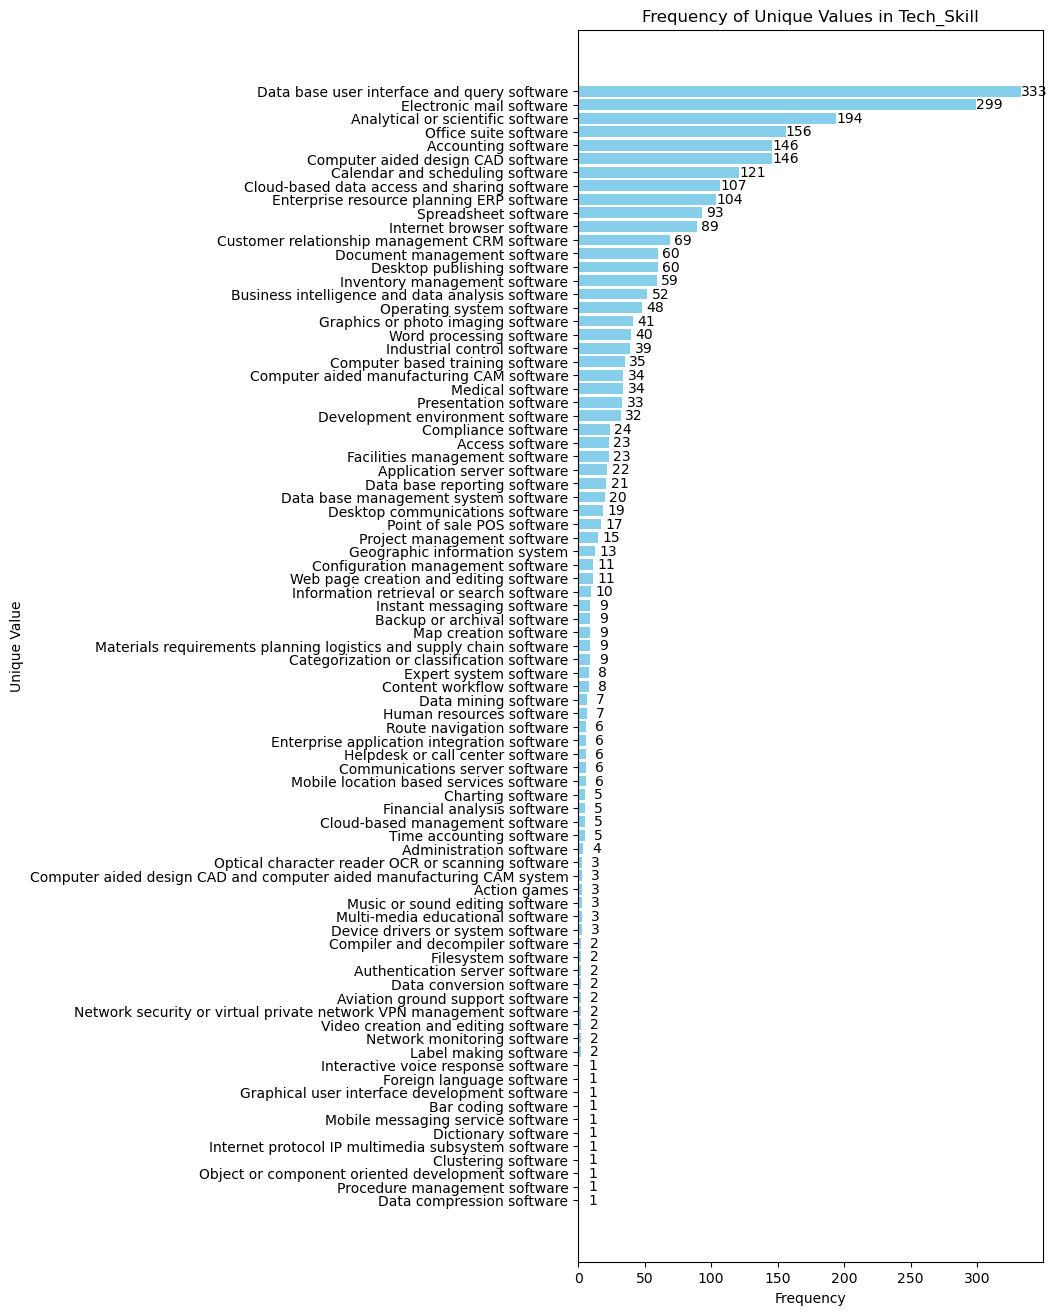

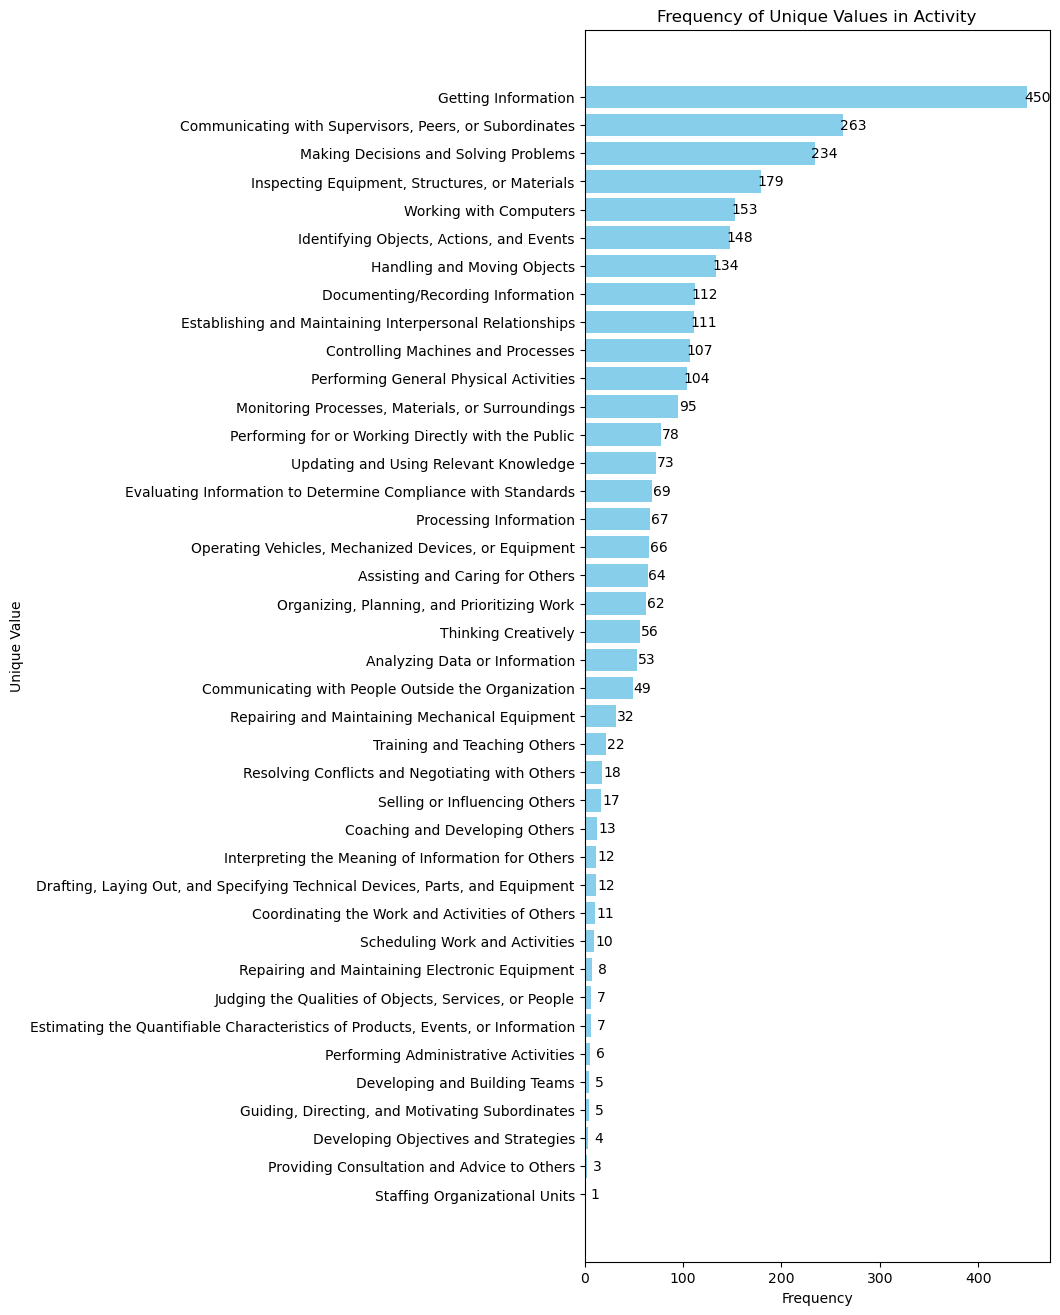

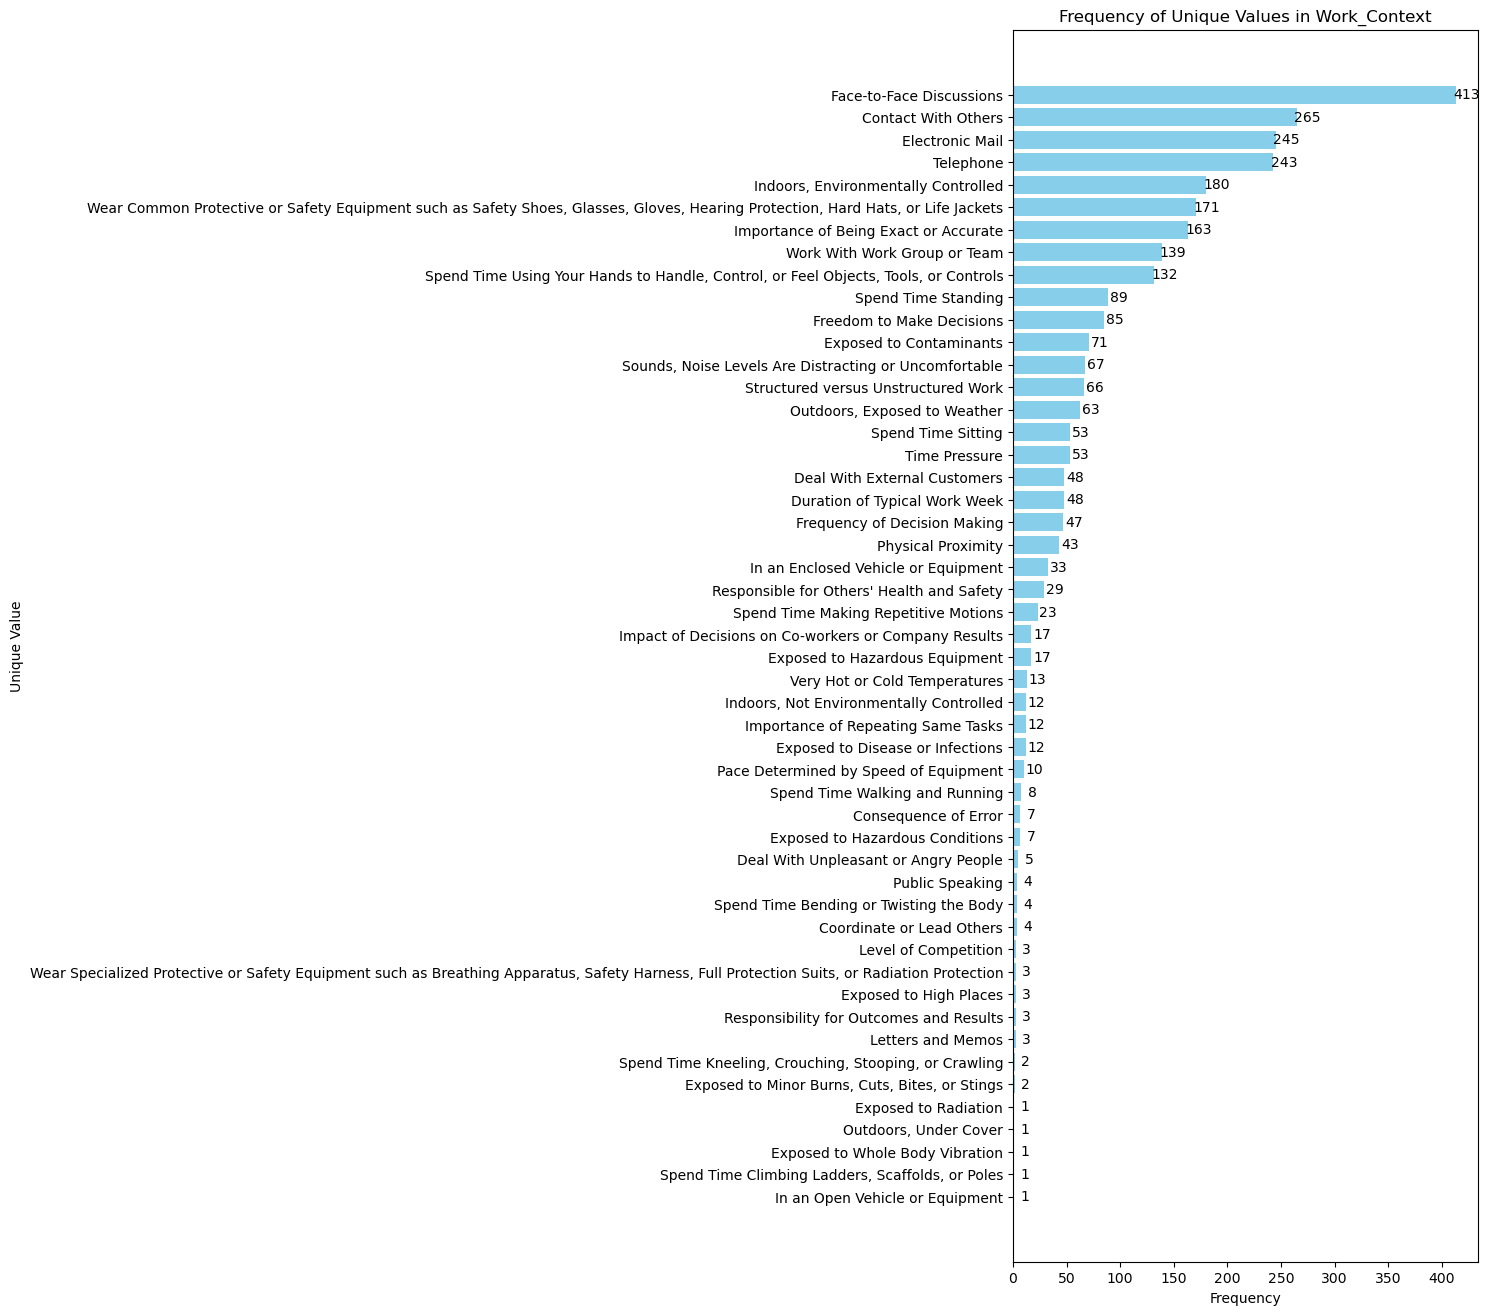

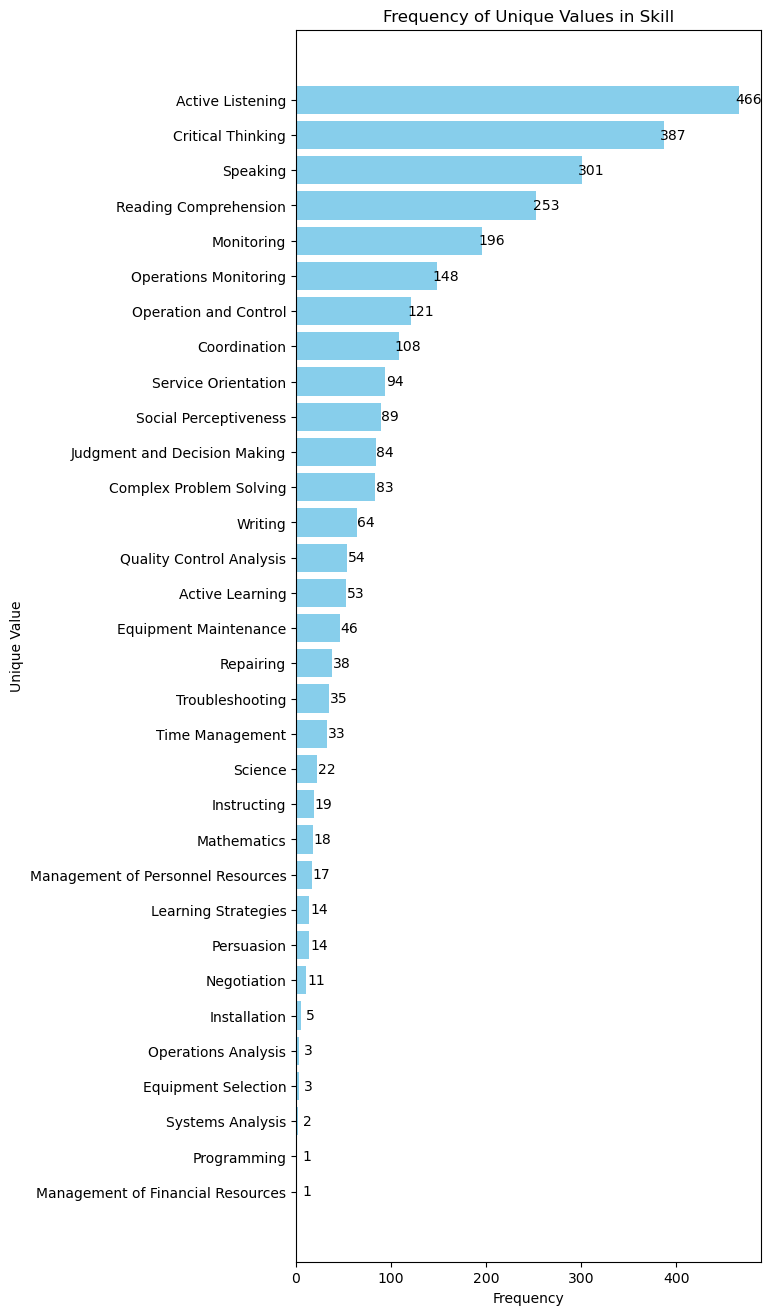

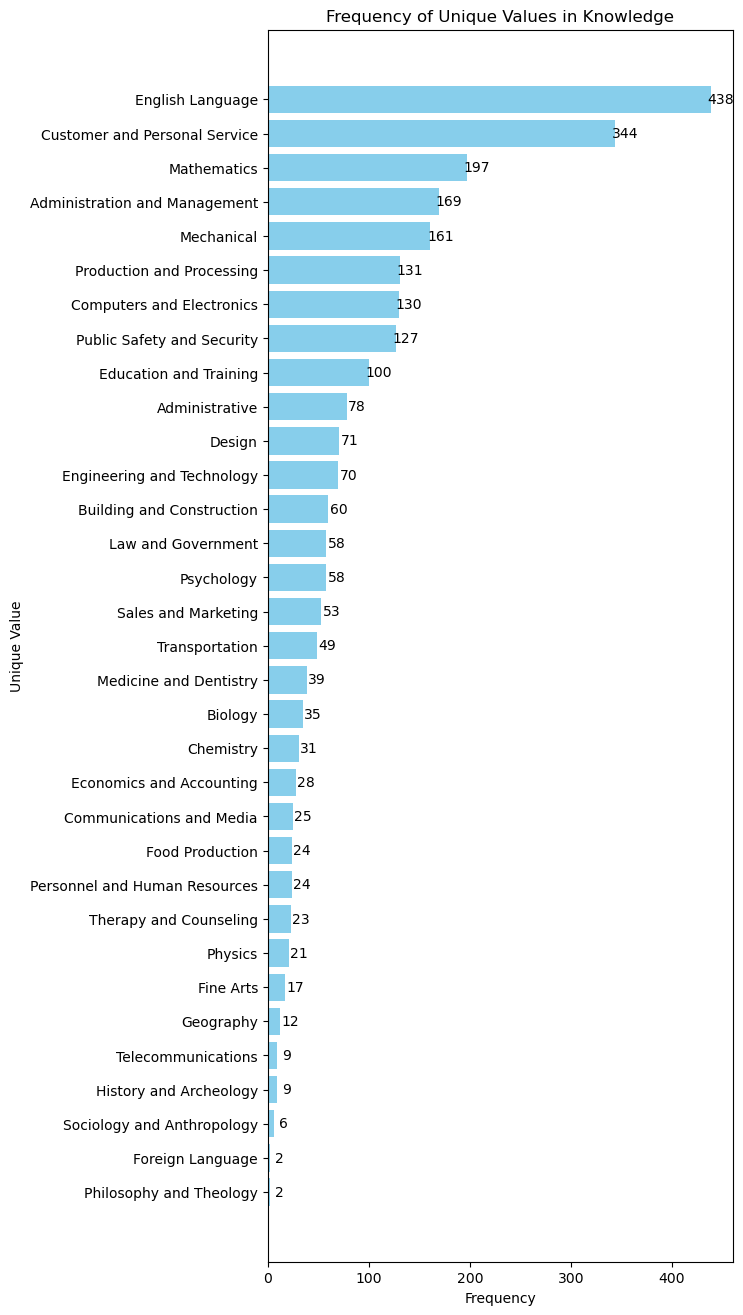

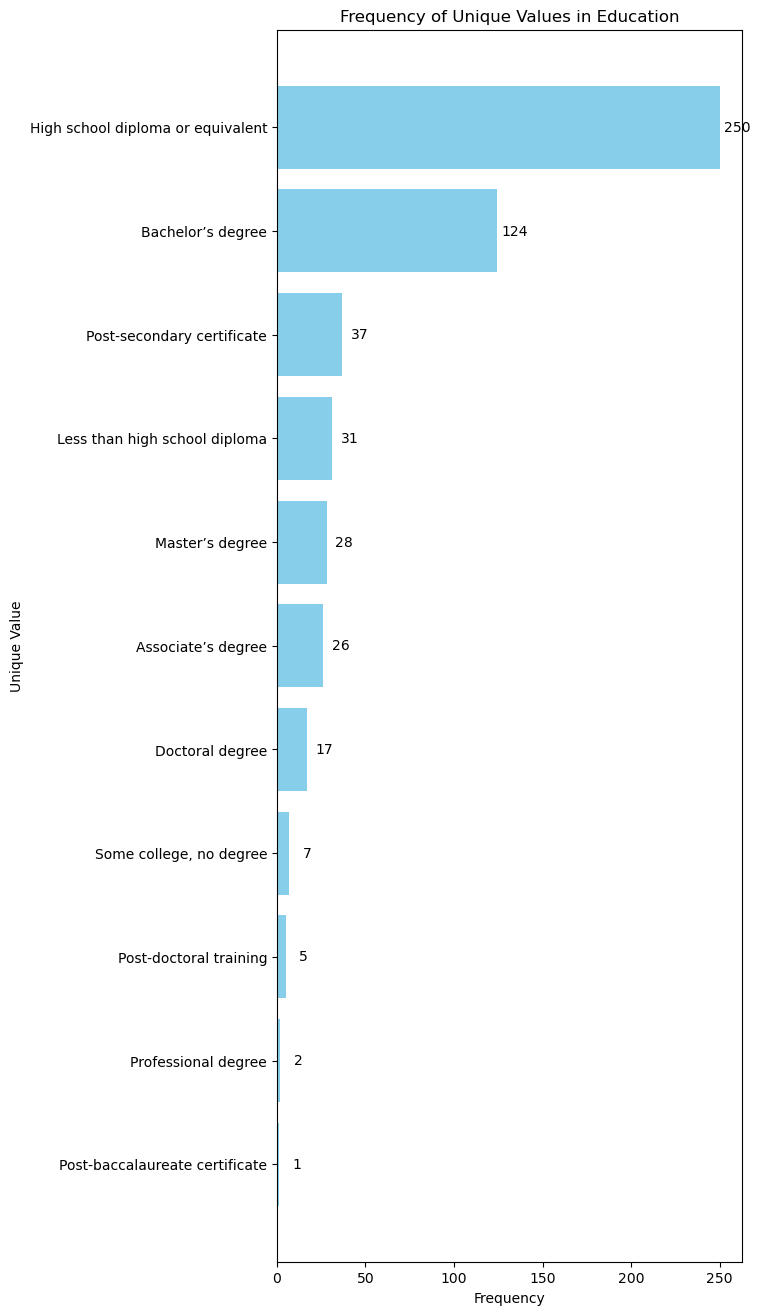

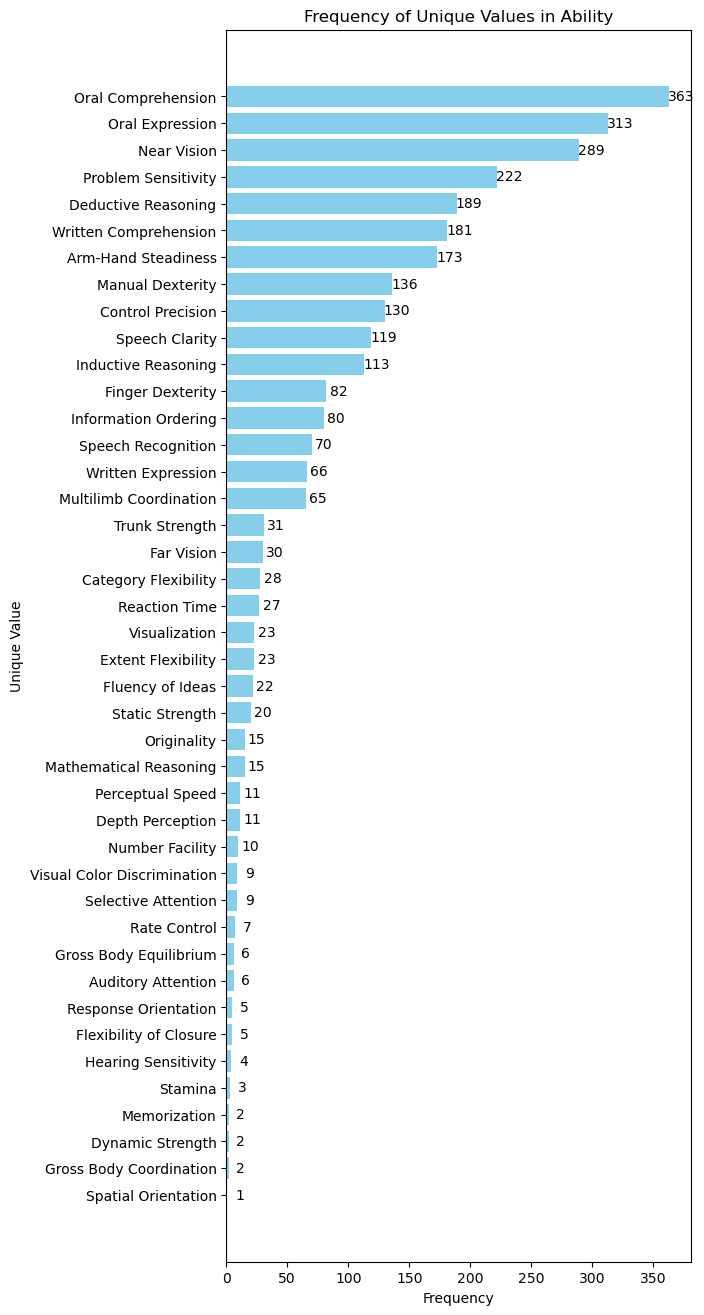

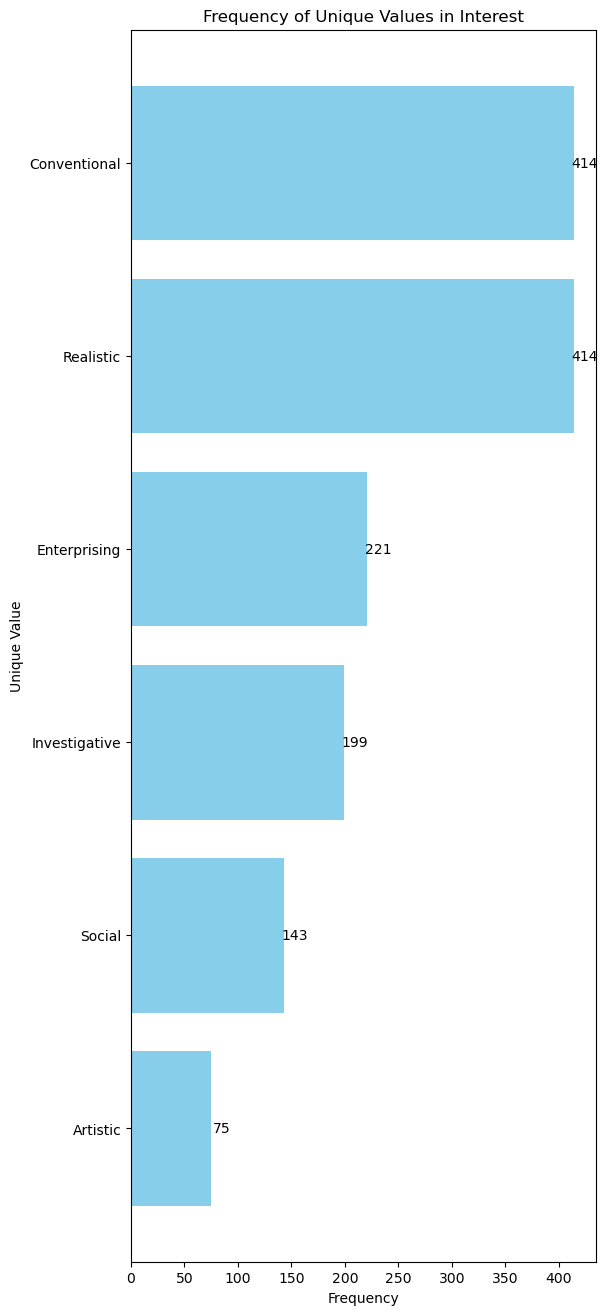

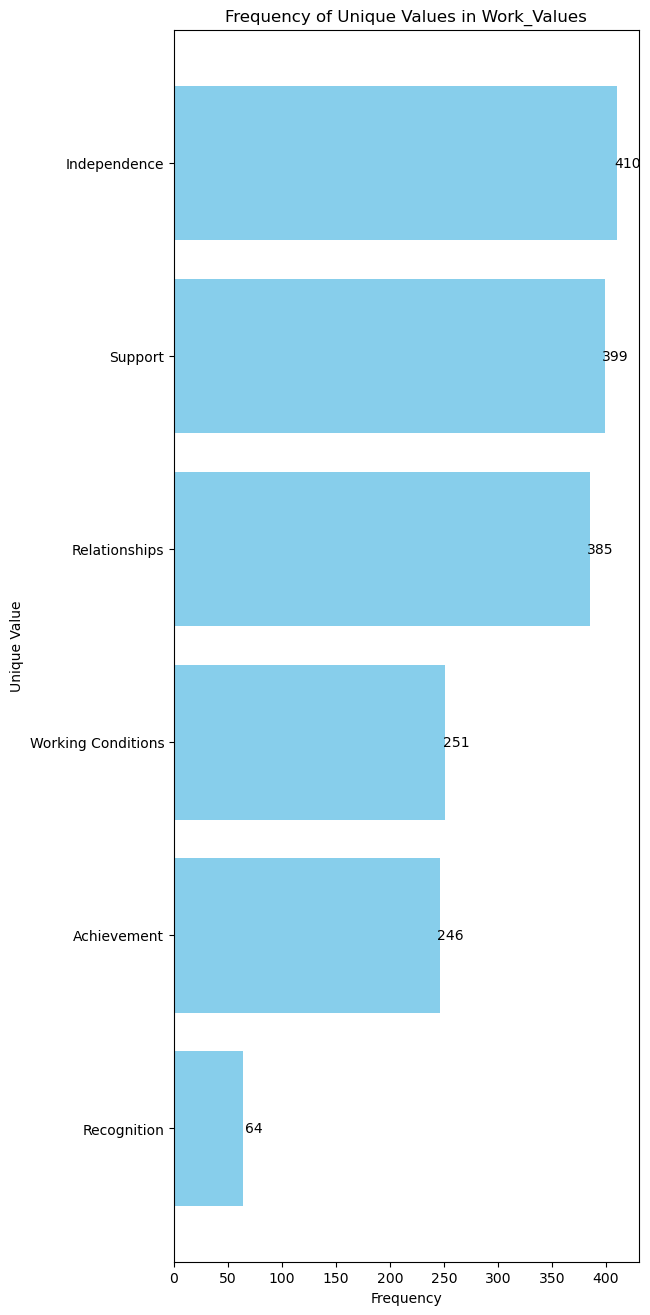

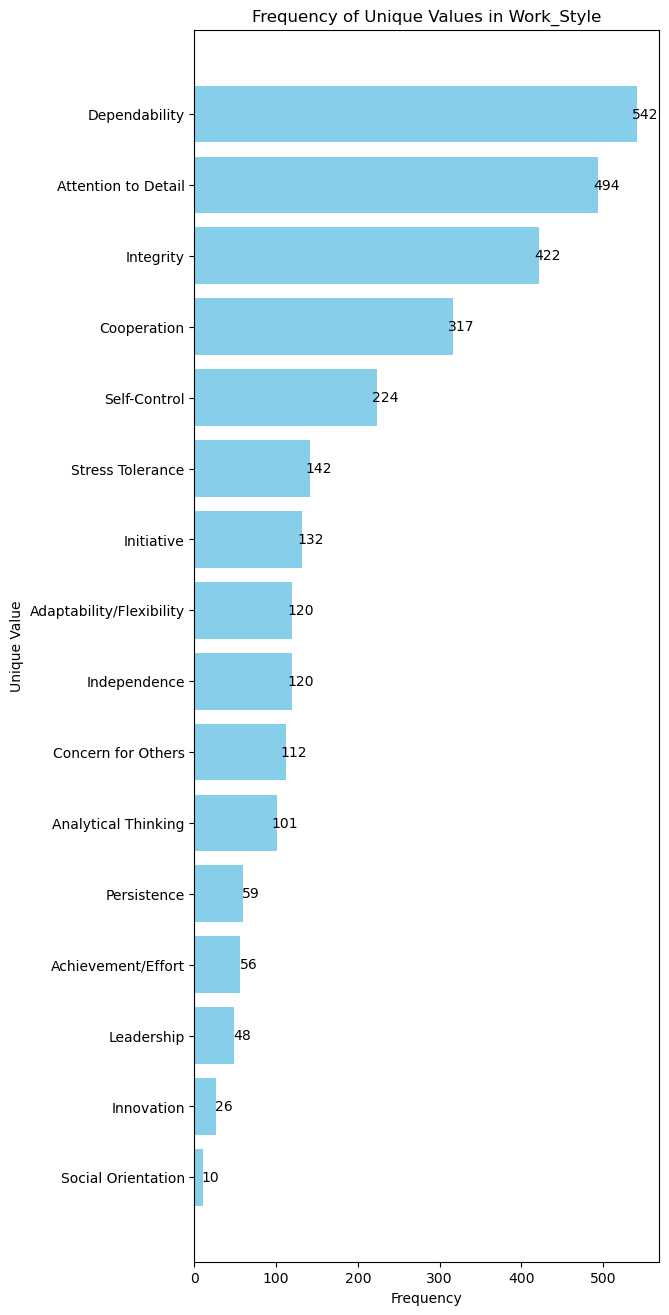

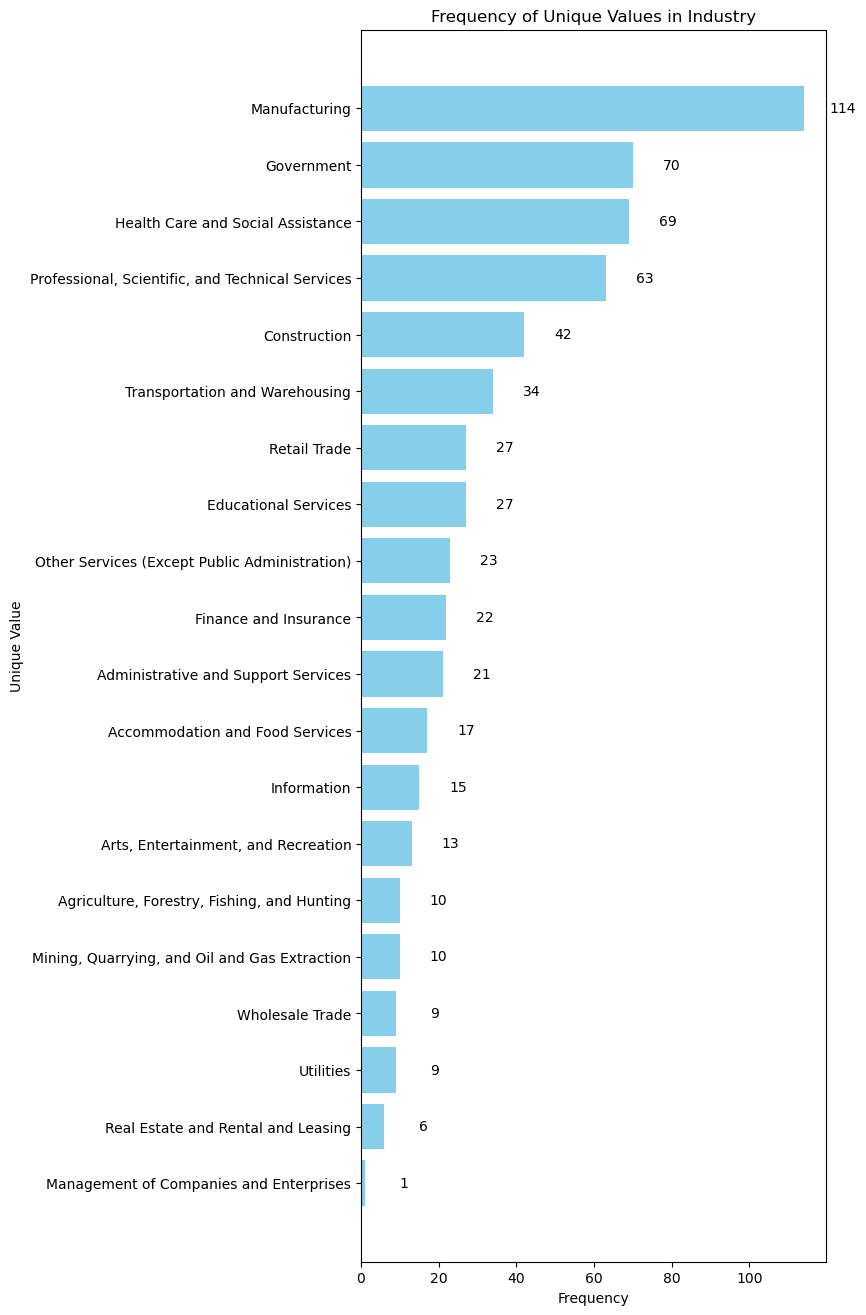

In [594]:
# List of attributes and their potential sub-attributes
attribute_mapping = {
    'Tech_Skill': ['Tech_Skill_1', 'Tech_Skill_2', 'Tech_Skill_3', 'Tech_Skill_4', 'Tech_Skill_5'],
    'Activity': ['Activity_1', 'Activity_2', 'Activity_3', 'Activity_4', 'Activity_5'],
    'Work_Context': ['Work_Context_1', 'Work_Context_2', 'Work_Context_3', 'Work_Context_4', 'Work_Context_5'],
    'Skill': ['Skill_1', 'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5'],
    'Knowledge': ['Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5'],
    'Education': ['Education'],
    'Ability': ['Ability_1', 'Ability_2', 'Ability_3', 'Ability_4', 'Ability_5'],
    'Interest': ['Interest_1', 'Interest_2', 'Interest_3'],
    'Work_Values': ['Work_Values_1', 'Work_Values_2', 'Work_Values_3'],
    'Work_Style': ['Work_Style_1', 'Work_Style_2', 'Work_Style_3', 'Work_Style_4', 'Work_Style_5'],
    'Industry': ['Industry']
}

# Loop through each attribute group for the bar graph
for attribute, sub_attributes in attribute_mapping.items():

    unique_value_frequencies = []

    # Calculate frequencies
    unique_values = occupation_detail_df[sub_attributes].stack().unique()
    frequencies = occupation_detail_df[sub_attributes].stack().value_counts().reset_index()
    frequencies.columns = ['Unique_Value', 'Frequency']

    # Append attribute information
    frequencies['Attribute'] = attribute
    unique_value_frequencies.append(frequencies)

    # Combine the results into a single DataFrame
    all_unique_value_frequencies = pd.concat(unique_value_frequencies)

    # Create a bar plot for the attribute
    plt.figure(figsize=(6, 16))
    bars = plt.barh(all_unique_value_frequencies['Unique_Value'], all_unique_value_frequencies['Frequency'], color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Unique Value')
    plt.title(f'Frequency of Unique Values in {attribute}')
    plt.gca().invert_yaxis()  # Invert y-axis for readability

    # add frequency to the bar for readbility
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width + 10  # Adjust the position for the label
        plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2, int(width), ha='center', va='center')

    plt.show()


## Second Dataset

In [595]:
# Display basic information of 'occupation_detail.xlsx'
automation_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SOC                   702 non-null    object 
 1   Occupation            702 non-null    object 
 2   Probability           702 non-null    float64
 3   Alabama               702 non-null    int64  
 4   Alaska                702 non-null    int64  
 5   Arizona               702 non-null    int64  
 6   Arkansas              702 non-null    int64  
 7   California            702 non-null    int64  
 8   Colorado              702 non-null    int64  
 9   Connecticut           702 non-null    int64  
 10  Delaware              702 non-null    int64  
 11  District of Columbia  702 non-null    int64  
 12  Florida               702 non-null    int64  
 13  Georgia               702 non-null    int64  
 14  Hawaii                702 non-null    int64  
 15  Idaho                 7

In [596]:
# Display summary statistics 
automation_data_df.describe()

Probability       Alabama        Alaska       Arizona      Arkansas  \
count   702.000000    702.000000    702.000000    702.000000    702.000000   
mean      0.535550   2453.019943    405.868946   3354.757835   1524.757835   
std       0.368149   6290.975897    967.683396   8341.431586   3868.163503   
min       0.002800      0.000000      0.000000      0.000000      0.000000   
25%       0.110000    112.500000      0.000000    140.000000     60.000000   
50%       0.640000    550.000000     80.000000    695.000000    320.000000   
75%       0.890000   2167.500000    370.000000   2817.500000   1287.500000   
max       0.990000  72610.000000  10470.000000  90030.000000  37840.000000   

         California      Colorado   Connecticut      Delaware  \
count     702.00000    702.000000    702.000000    702.000000   
mean    20175.34188   3151.253561   2101.709402    528.589744   
std     45474.24833   7619.361786   4952.798565   1383.173852   
min         0.00000      0.000000      0.000000      0.000000   
25%      1455.00000    130.000000     70.000000      0.000000   
50%      4985.00000    700.000000    440.000000     90.000000   
75%     18275.00000   2695.000000   1825.000000    430.000000   
max    440440.00000  83670.000000  51540.000000  17750.000000   

       District of Columbia  ...  South Dakota     Tennessee          Texas  \
count            702.000000  ...    702.000000    702.000000     702.000000   
mean             854.074074  ...    539.216524   3723.176638   15221.111111   
std             2758.991305  ...   1334.072775   9555.037122   37271.272805   
min                0.000000  ...      0.000000      0.000000       0.000000   
25%                0.000000  ...      0.000000    180.000000     922.500000   
50%               60.000000  ...    130.000000    810.000000    3760.000000   
75%              510.000000  ...    487.500000   3035.000000   12290.000000   
max            31470.000000  ...  15500.000000  96260.000000  383080.000000   

               Utah      Vermont       Virginia     Washington  West Virginia  \
count    702.000000   702.000000     702.000000     702.000000     702.000000   
mean    1762.948718   376.894587    4659.159544    3883.532764     875.484330   
std     4420.937442   906.992514   11345.399264    9022.812445    2320.449556   
min        0.000000     0.000000       0.000000       0.000000       0.000000   
25%       90.000000     0.000000     220.000000     260.000000       7.500000   
50%      420.000000    80.000000    1155.000000     975.000000     190.000000   
75%     1527.500000   350.000000    3767.500000    3455.000000     700.000000   
max    44480.000000  9700.000000  122290.000000  101850.000000   24630.000000   

          Wisconsin      Wyoming  
count    702.000000   702.000000  
mean    3608.262108   352.849003  
std     8783.855723   853.766265  
min        0.000000     0.000000  
25%      170.000000     0.000000  
50%      745.000000    80.000000  
75%     3160.000000   290.000000  
max    85100.000000  8580.000000  

[8 rows x 52 columns]

In [597]:
# Check for missing values
automation_data_df.isnull().sum()


SOC                     0
Occupation              0
Probability             0
Alabama                 0
Alaska                  0
Arizona                 0
Arkansas                0
California              0
Colorado                0
Connecticut             0
Delaware                0
District of Columbia    0
Florida                 0
Georgia                 0
Hawaii                  0
Idaho                   0
Illinois                0
Indiana                 0
Iowa                    0
Kansas                  0
Kentucky                0
Louisiana               0
Maine                   0
Maryland                0
Massachusetts           0
Michigan                0
Minnesota               0
Mississippi             0
Missouri                0
Montana                 0
Nebraska                0
Nevada                  0
New Hampshire           0
New Jersey              0
New Mexico              0
New York                0
North Carolina          0
North Dakota            0
Ohio        

In [598]:
std_values = automation_data_df.std()
std_values


Probability                 0.368149
Alabama                  6290.975897
Alaska                    967.683396
Arizona                  8341.431586
Arkansas                 3868.163503
California              45474.248330
Colorado                 7619.361786
Connecticut              4952.798565
Delaware                 1383.173852
District of Columbia     2758.991305
Florida                 28142.318257
Georgia                 13702.033279
Hawaii                   2023.872275
Idaho                    2075.641064
Illinois                18092.930055
Indiana                  9504.398693
Iowa                     4727.885081
Kansas                   4061.308058
Kentucky                 6119.606731
Louisiana                6251.771502
Maine                    1840.492652
Maryland                 7663.886679
Massachusetts            9740.169828
Michigan                13368.707844
Minnesota                8297.298291
Mississippi              3728.363193
Missouri                 8519.164941
M

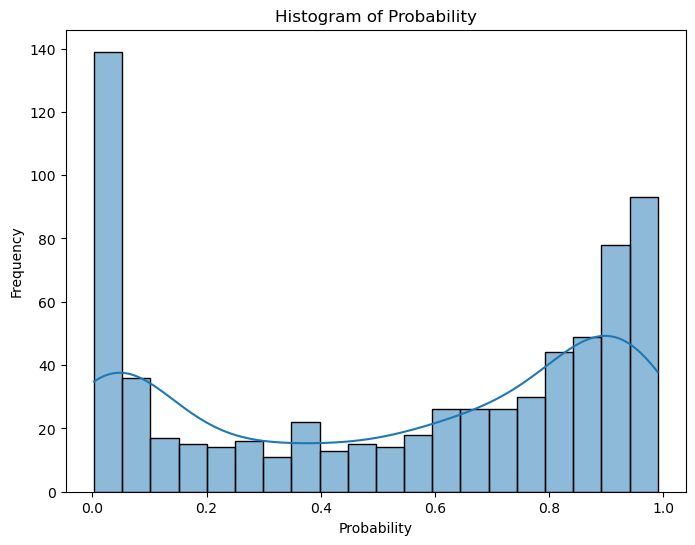

In [599]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(automation_data_df['Probability'], bins=20, kde=True)
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Probability')
plt.show()

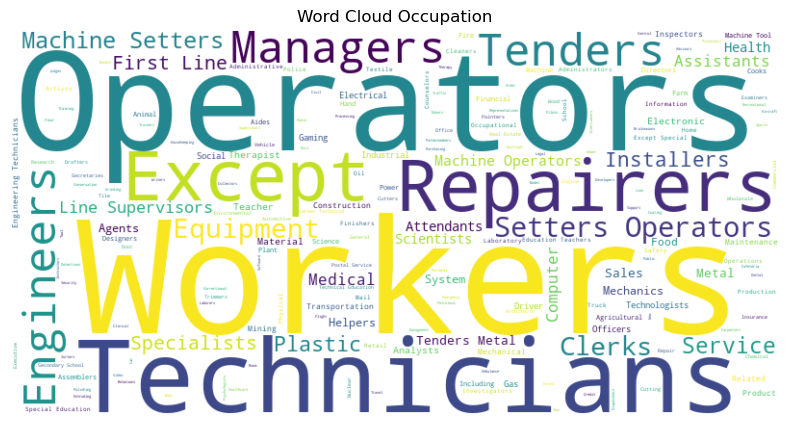

In [600]:
text_data = " ".join(occupation_detail_df['Occupation'])  # Replace 'Text_Column' with the actual column name

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title('Word Cloud Occupation')
plt.show()


# Data Integration

In [601]:
merged_df = occupation_detail_df.merge(automation_data_df[['SOC', 'Occupation', 'Probability']], 
                                       on=['SOC', 'Occupation'], 
                                       how='left')

In [602]:
merged_df.head()

SOC                           Occupation  \
0              11-1011                     Chief Executives   
1              11-1021      General and Operations Managers   
2  2011-11-01 00:00:00  Advertising and Promotions Managers   
3  2021-11-01 00:00:00                   Marketing Managers   
4  2022-11-01 00:00:00                       Sales Managers   

                                              Task_1  \
0  Direct or coordinate an organization's financi...   
1  Review financial statements, sales or activity...   
2  Plan and prepare advertising and promotional m...   
3  Identify, develop, or evaluate marketing strat...   
4  Direct and coordinate activities involving sal...   

                                              Task_2  \
0  Confer with board members, organization offici...   
1  Direct and coordinate activities of businesses...   
2  Inspect layouts and advertising copy, and edit...   
3  Formulate, direct, or coordinate marketing act...   
4  Resolve customer complaints regarding sales an...   

                                              Task_3  \
0  Prepare budgets for approval, including those ...   
1  Direct administrative activities directly rela...   
2  Confer with department heads or staff to discu...   
3  Evaluate the financial aspects of product deve...   
4  Review operational records and reports to proj...   

                                              Task_4  \
0  Direct, plan, or implement policies, objective...   
1  Prepare staff work schedules and assign specif...   
2  Coordinate with the media to disseminate adver...   
3  Develop pricing strategies, balancing firm obj...   
4  Oversee regional and local sales managers and ...   

                                              Task_5  \
0  Prepare or present reports concerning activiti...   
1  Direct or coordinate financial or budget activ...   
2  Coordinate activities of departments, such as ...   
3  Compile lists describing product or service of...   
4      Determine price schedules and discount rates.   

                        Tech_Skill_1  \
0                Accounting software   
1                    Access software   
2  Analytical or scientific software   
3                    Access software   
4                Accounting software   

                                       Tech_Skill_2  \
0                 Analytical or scientific software   
1                               Accounting software   
2  Business intelligence and data analysis software   
3                               Accounting software   
4                 Analytical or scientific software   

                                       Tech_Skill_3  ...       Work_Values_3  \
0      Cloud-based data access and sharing software  ...         Achievement   
1                 Analytical or scientific software  ...  Working Conditions   
2                  Calendar and scheduling software  ...        Independence   
3                 Analytical or scientific software  ...        Independence   
4  Business intelligence and data analysis software  ...         Achievement   

    Work_Style_1   Work_Style_2              Work_Style_3  \
0     Leadership     Initiative               Persistence   
1  Dependability      Integrity       Attention to Detail   
2     Initiative    Cooperation             Dependability   
3     Initiative  Dependability                Leadership   
4     Initiative      Integrity  Adaptability/Flexibility   

          Work_Style_4              Work_Style_5 Salary_Hour Salary_Annual  \
0  Analytical Thinking        Achievement/Effort       91.12      189520.0   
1           Leadership                Initiative       47.16       98100.0   
2  Attention to Detail  Adaptability/Flexibility       61.46      127830.0   
3   Achievement/Effort  Adaptability/Flexibility       67.33      140040.0   
4        Dependability                Leadership       62.79      130600.0   

                                           Industry Probability  


In [603]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SOC                  702 non-null    object 
 1   Occupation           702 non-null    object 
 2   Task_1               585 non-null    object 
 3   Task_2               585 non-null    object 
 4   Task_3               585 non-null    object 
 5   Task_4               585 non-null    object 
 6   Task_5               584 non-null    object 
 7   Tech_Skill_1         585 non-null    object 
 8   Tech_Skill_2         583 non-null    object 
 9   Tech_Skill_3         572 non-null    object 
 10  Tech_Skill_4         556 non-null    object 
 11  Tech_Skill_5         533 non-null    object 
 12  Activity_1           585 non-null    object 
 13  Activity_2           585 non-null    object 
 14  Activity_3           585 non-null    object 
 15  Activity_4           583 non-null    obj

In [604]:
merged_df.describe()

Salary_Hour  Salary_Annual  Probability
count   604.000000     604.000000   702.000000
mean     27.759768   57739.470199     0.535550
std      14.200641   29537.194604     0.368149
min       0.000000       0.000000     0.002800
25%      18.517500   38515.000000     0.110000
50%      23.850000   49605.000000     0.640000
75%      32.785000   68192.500000     0.890000
max      91.120000  189520.000000     0.990000

In [605]:
# Calculate the mode for categorical columns
categorical_columns = ['Task_1', 'Task_2', 'Task_3', 'Task_4', 'Task_5', 'Tech_Skill_1', 'Tech_Skill_2', 'Tech_Skill_3', 'Tech_Skill_4', 'Tech_Skill_5', 'Activity_1', 'Activity_2', 'Activity_3', 'Activity_4', 'Activity_5', 'Activity_Detailed_1', 'Activity_Detailed_2', 'Activity_Detailed_3', 'Activity_Detailed_4', 'Activity_Detailed_5', 'Work_Context_1', 'Work_Context_2', 'Work_Context_3', 'Work_Context_4', 'Work_Context_5', 'Skill_1', 'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Education', 'Ability_1', 'Ability_2', 'Ability_3', 'Ability_4', 'Ability_5', 'Interest_1', 'Interest_2', 'Interest_3', 'Work_Values_1', 'Work_Values_2', 'Work_Values_3', 'Work_Style_1', 'Work_Style_2', 'Work_Style_3', 'Work_Style_4', 'Work_Style_5', 'Industry']

# Calculate mode for categorical columns
mode_values = merged_df[categorical_columns].mode().iloc[0]
print("Mode for Categorical Columns:")
print(mode_values)

# Calculate the mean for numerical columns
numerical_columns = ['Salary_Hour', 'Salary_Annual']

# Calculate mean for numerical columns
mean_values = merged_df[numerical_columns].mean()
print("\nMean for Numerical Columns:")
print(mean_values)

Mode for Categorical Columns:
Task_1                 Establish and enforce rules for behavior and p...
Task_2                 Adapt teaching methods and instructional mater...
Task_3                 Adapt teaching methods and instructional mater...
Task_4                 Establish and enforce rules for behavior and p...
Task_5                 Monitor trains as they go around curves to det...
Tech_Skill_1                           Analytical or scientific software
Tech_Skill_2                 Data base user interface and query software
Tech_Skill_3                 Data base user interface and query software
Tech_Skill_4                 Data base user interface and query software
Tech_Skill_5                                    Electronic mail software
Activity_1                                           Getting Information
Activity_2                                           Getting Information
Activity_3                                           Getting Information
Activity_4           

# Data Pre-processing

## Dropping Unused Columns

In [606]:
cleaned_df = merged_df.drop(['SOC','Task_1', 'Task_2', 'Task_3', 'Task_4', 'Task_5',
                              'Activity_Detailed_1', 'Activity_Detailed_2', 'Activity_Detailed_3', 
                              'Activity_Detailed_4', 'Activity_Detailed_5'], axis=1)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 701
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Occupation      702 non-null    object 
 1   Tech_Skill_1    585 non-null    object 
 2   Tech_Skill_2    583 non-null    object 
 3   Tech_Skill_3    572 non-null    object 
 4   Tech_Skill_4    556 non-null    object 
 5   Tech_Skill_5    533 non-null    object 
 6   Activity_1      585 non-null    object 
 7   Activity_2      585 non-null    object 
 8   Activity_3      585 non-null    object 
 9   Activity_4      583 non-null    object 
 10  Activity_5      582 non-null    object 
 11  Work_Context_1  585 non-null    object 
 12  Work_Context_2  585 non-null    object 
 13  Work_Context_3  585 non-null    object 
 14  Work_Context_4  585 non-null    object 
 15  Work_Context_5  585 non-null    object 
 16  Skill_1         576 non-null    object 
 17  Skill_2         570 non-null    obj

## Cleaning Missing Values

### Checking empty values

In [607]:
# Check for missing values
merged_df.isnull().sum()


SOC                      0
Occupation               0
Task_1                 117
Task_2                 117
Task_3                 117
Task_4                 117
Task_5                 118
Tech_Skill_1           117
Tech_Skill_2           119
Tech_Skill_3           130
Tech_Skill_4           146
Tech_Skill_5           169
Activity_1             117
Activity_2             117
Activity_3             117
Activity_4             119
Activity_5             120
Activity_Detailed_1    117
Activity_Detailed_2    117
Activity_Detailed_3    117
Activity_Detailed_4    117
Activity_Detailed_5    118
Work_Context_1         117
Work_Context_2         117
Work_Context_3         117
Work_Context_4         117
Work_Context_5         117
Skill_1                126
Skill_2                132
Skill_3                147
Skill_4                155
Skill_5                167
Knowledge_1            123
Knowledge_2            140
Knowledge_3            167
Knowledge_4            207
Knowledge_5            272
E

### Dropping Common Empty Rows

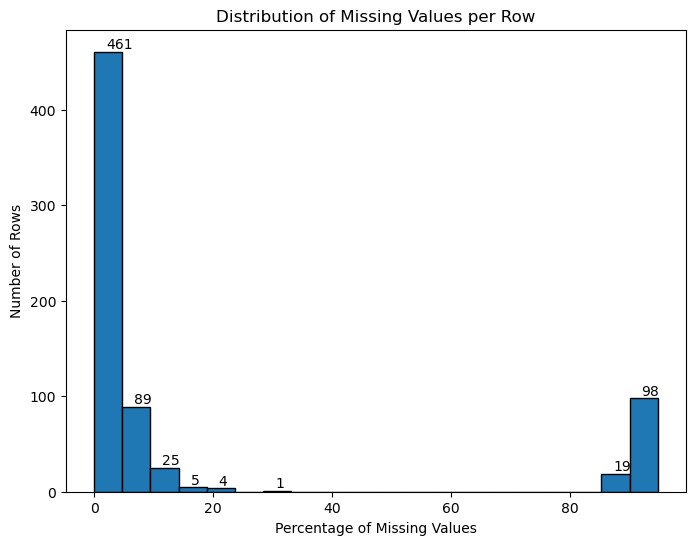

In [608]:
# find the percentage of missing column for each row
missing_percentage = (merged_df.isnull().sum(axis=1) / len(merged_df.columns)) * 100


# Create a histogram of missing percentage and group the rows 

plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(missing_percentage, bins=20, edgecolor='k')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Distribution of Missing Values per Row')

# Add labels to the bars for readability
for count, bin_edge in zip(n, bins):
    if count > 0:
        plt.text(bin_edge + 2, count, str(int(count)), va='bottom')

plt.show()


In [609]:
# Use activity_1 as it also has 117 missing row
column_to_check = 'Activity_1'

# Drop rows where 'Activity_1' column has empty values
cleaned_df = cleaned_df.dropna(subset=[column_to_check])

cleaned_df.isnull().sum()


Occupation          0
Tech_Skill_1        0
Tech_Skill_2        2
Tech_Skill_3       13
Tech_Skill_4       29
Tech_Skill_5       52
Activity_1          0
Activity_2          0
Activity_3          0
Activity_4          2
Activity_5          3
Work_Context_1      0
Work_Context_2      0
Work_Context_3      0
Work_Context_4      0
Work_Context_5      0
Skill_1             9
Skill_2            15
Skill_3            30
Skill_4            38
Skill_5            50
Knowledge_1         6
Knowledge_2        23
Knowledge_3        50
Knowledge_4        90
Knowledge_5       155
Education          57
Ability_1           1
Ability_2           1
Ability_3           1
Ability_4           1
Ability_5           3
Interest_1          0
Interest_2         29
Interest_3        260
Work_Values_1       0
Work_Values_2       0
Work_Values_3       0
Work_Style_1        0
Work_Style_2        0
Work_Style_3        0
Work_Style_4        0
Work_Style_5        0
Salary_Hour         0
Salary_Annual       0
Industry  

In [610]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 701
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Occupation      585 non-null    object 
 1   Tech_Skill_1    585 non-null    object 
 2   Tech_Skill_2    583 non-null    object 
 3   Tech_Skill_3    572 non-null    object 
 4   Tech_Skill_4    556 non-null    object 
 5   Tech_Skill_5    533 non-null    object 
 6   Activity_1      585 non-null    object 
 7   Activity_2      585 non-null    object 
 8   Activity_3      585 non-null    object 
 9   Activity_4      583 non-null    object 
 10  Activity_5      582 non-null    object 
 11  Work_Context_1  585 non-null    object 
 12  Work_Context_2  585 non-null    object 
 13  Work_Context_3  585 non-null    object 
 14  Work_Context_4  585 non-null    object 
 15  Work_Context_5  585 non-null    object 
 16  Skill_1         576 non-null    object 
 17  Skill_2         570 non-null    obj

### Filling empty values

In [611]:

# Define the threshold for columns with more than 50 missing values
threshold = 50

# Identify columns with more than 50 missing values
columns_with_many_missing = cleaned_df.columns[cleaned_df.isnull().sum() > threshold]

# Separate numerical and categorical columns
numerical_columns = ["Salary_Hour", "Salary_Annual"]
categorical_columns = [col for col in cleaned_df.columns if col not in numerical_columns]

# Impute columns with more than 50 missing values with "None"
cleaned_df[columns_with_many_missing] = cleaned_df[columns_with_many_missing].fillna("None")

# Impute numerical columns with mean and categorical columns with mode
for col in numerical_columns:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mean())

for col in categorical_columns:
    cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])  # Fill with the mode of the column

# The DataFrame cleaned_df now contains the imputed values

cleaned_df.isnull().sum()

Occupation        0
Tech_Skill_1      0
Tech_Skill_2      0
Tech_Skill_3      0
Tech_Skill_4      0
Tech_Skill_5      0
Activity_1        0
Activity_2        0
Activity_3        0
Activity_4        0
Activity_5        0
Work_Context_1    0
Work_Context_2    0
Work_Context_3    0
Work_Context_4    0
Work_Context_5    0
Skill_1           0
Skill_2           0
Skill_3           0
Skill_4           0
Skill_5           0
Knowledge_1       0
Knowledge_2       0
Knowledge_3       0
Knowledge_4       0
Knowledge_5       0
Education         0
Ability_1         0
Ability_2         0
Ability_3         0
Ability_4         0
Ability_5         0
Interest_1        0
Interest_2        0
Interest_3        0
Work_Values_1     0
Work_Values_2     0
Work_Values_3     0
Work_Style_1      0
Work_Style_2      0
Work_Style_3      0
Work_Style_4      0
Work_Style_5      0
Salary_Hour       0
Salary_Annual     0
Industry          0
Probability       0
dtype: int64

In [612]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 701
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Occupation      585 non-null    object 
 1   Tech_Skill_1    585 non-null    object 
 2   Tech_Skill_2    585 non-null    object 
 3   Tech_Skill_3    585 non-null    object 
 4   Tech_Skill_4    585 non-null    object 
 5   Tech_Skill_5    585 non-null    object 
 6   Activity_1      585 non-null    object 
 7   Activity_2      585 non-null    object 
 8   Activity_3      585 non-null    object 
 9   Activity_4      585 non-null    object 
 10  Activity_5      585 non-null    object 
 11  Work_Context_1  585 non-null    object 
 12  Work_Context_2  585 non-null    object 
 13  Work_Context_3  585 non-null    object 
 14  Work_Context_4  585 non-null    object 
 15  Work_Context_5  585 non-null    object 
 16  Skill_1         585 non-null    object 
 17  Skill_2         585 non-null    obj

## Data Outlier

In [613]:
# Checking Outliers
# Calculate the IQR for 'Probability'
Q1 = cleaned_df['Probability'].quantile(0.25)
Q3 = cleaned_df['Probability'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_df[(cleaned_df['Probability'] < lower_bound) | (cleaned_df['Probability'] > upper_bound)]

# Display the outliers
print("Outliers in Probability:")
print(outliers)

Outliers in Probability:
Empty DataFrame
Columns: [Occupation, Tech_Skill_1, Tech_Skill_2, Tech_Skill_3, Tech_Skill_4, Tech_Skill_5, Activity_1, Activity_2, Activity_3, Activity_4, Activity_5, Work_Context_1, Work_Context_2, Work_Context_3, Work_Context_4, Work_Context_5, Skill_1, Skill_2, Skill_3, Skill_4, Skill_5, Knowledge_1, Knowledge_2, Knowledge_3, Knowledge_4, Knowledge_5, Education, Ability_1, Ability_2, Ability_3, Ability_4, Ability_5, Interest_1, Interest_2, Interest_3, Work_Values_1, Work_Values_2, Work_Values_3, Work_Style_1, Work_Style_2, Work_Style_3, Work_Style_4, Work_Style_5, Salary_Hour, Salary_Annual, Industry, Probability]
Index: []

[0 rows x 47 columns]


## Data Transformation

### Feature Engineering

### Create Salary_Monthly

In [614]:
# Drop the 'Salary_Hour' column
cleaned_df = cleaned_df.drop('Salary_Hour', axis=1)

# Check values with 0 as its value as they are basically null
mean_salary_annual = cleaned_df['Salary_Annual'].mean()
cleaned_df['Salary_Annual'] = cleaned_df['Salary_Annual'].replace(0, mean_salary_annual)

# Create a new 'Salary_Monthly' column by dividing 'Salary_Annual' by 12
cleaned_df['Salary_Monthly'] = cleaned_df['Salary_Annual'] / 12

cleaned_df = cleaned_df.drop('Salary_Annual', axis=1)


In [615]:
correlation_matrix = cleaned_df.corrwith(cleaned_df['Probability'])
correlation_matrix

Probability       1.000000
Salary_Monthly   -0.533155
dtype: float64

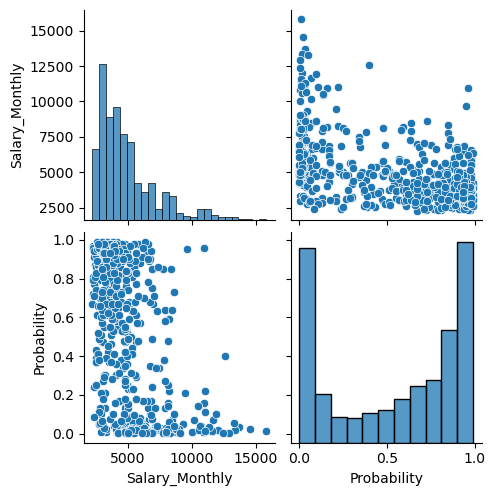

In [616]:
sns.pairplot(data=cleaned_df[['Salary_Monthly', 'Probability']])
plt.show()


### Create Risk Classification

In [617]:
# Create a new column "Risk" based on the "Probability" column
cleaned_df['Risk'] = pd.cut(
    cleaned_df['Probability'],
    bins=[-np.inf, 0.35, 0.7, np.inf],
    labels=['Low', 'Medium', 'High'],
    right=False
)


In [618]:
# Display the first few rows of the DataFrame to verify
print(cleaned_df[['Probability', 'Risk']].head())


   Probability Risk
0        0.015  Low
1        0.160  Low
2        0.039  Low
3        0.014  Low
4        0.013  Low


In [619]:
# Display the first few rows of the DataFrame to verify
print(cleaned_df[['Probability', 'Risk']].head(25))


    Probability    Risk
0        0.0150     Low
1        0.1600     Low
2        0.0390     Low
3        0.0140     Low
4        0.0130     Low
6        0.7300    High
7        0.0350     Low
8        0.0690     Low
9        0.0300     Low
10       0.0300     Low
11       0.5900  Medium
12       0.9600    High
13       0.0055     Low
14       0.0063     Low
15       0.0470     Low
16       0.0710     Low
19       0.0100     Low
20       0.0170     Low
21       0.0830     Low
23       0.0039     Low
24       0.0073     Low
25       0.0180     Low
26       0.7500    High
27       0.8100    High
28       0.0067     Low


In [620]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 701
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Occupation      585 non-null    object  
 1   Tech_Skill_1    585 non-null    object  
 2   Tech_Skill_2    585 non-null    object  
 3   Tech_Skill_3    585 non-null    object  
 4   Tech_Skill_4    585 non-null    object  
 5   Tech_Skill_5    585 non-null    object  
 6   Activity_1      585 non-null    object  
 7   Activity_2      585 non-null    object  
 8   Activity_3      585 non-null    object  
 9   Activity_4      585 non-null    object  
 10  Activity_5      585 non-null    object  
 11  Work_Context_1  585 non-null    object  
 12  Work_Context_2  585 non-null    object  
 13  Work_Context_3  585 non-null    object  
 14  Work_Context_4  585 non-null    object  
 15  Work_Context_5  585 non-null    object  
 16  Skill_1         585 non-null    object  
 17  Skill_2         

In [621]:
cleaned_df.head(20)

placeholder_df = cleaned_df.copy()

### EDA

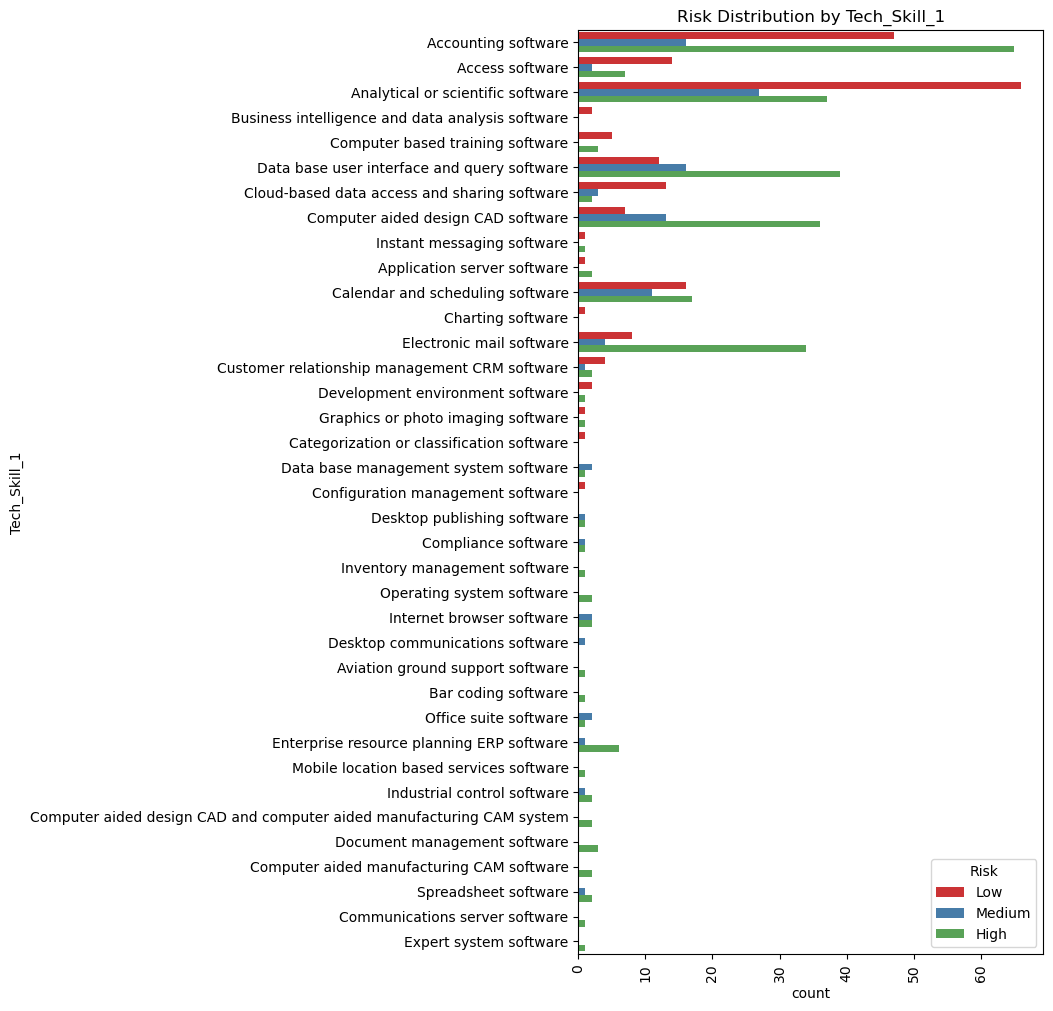

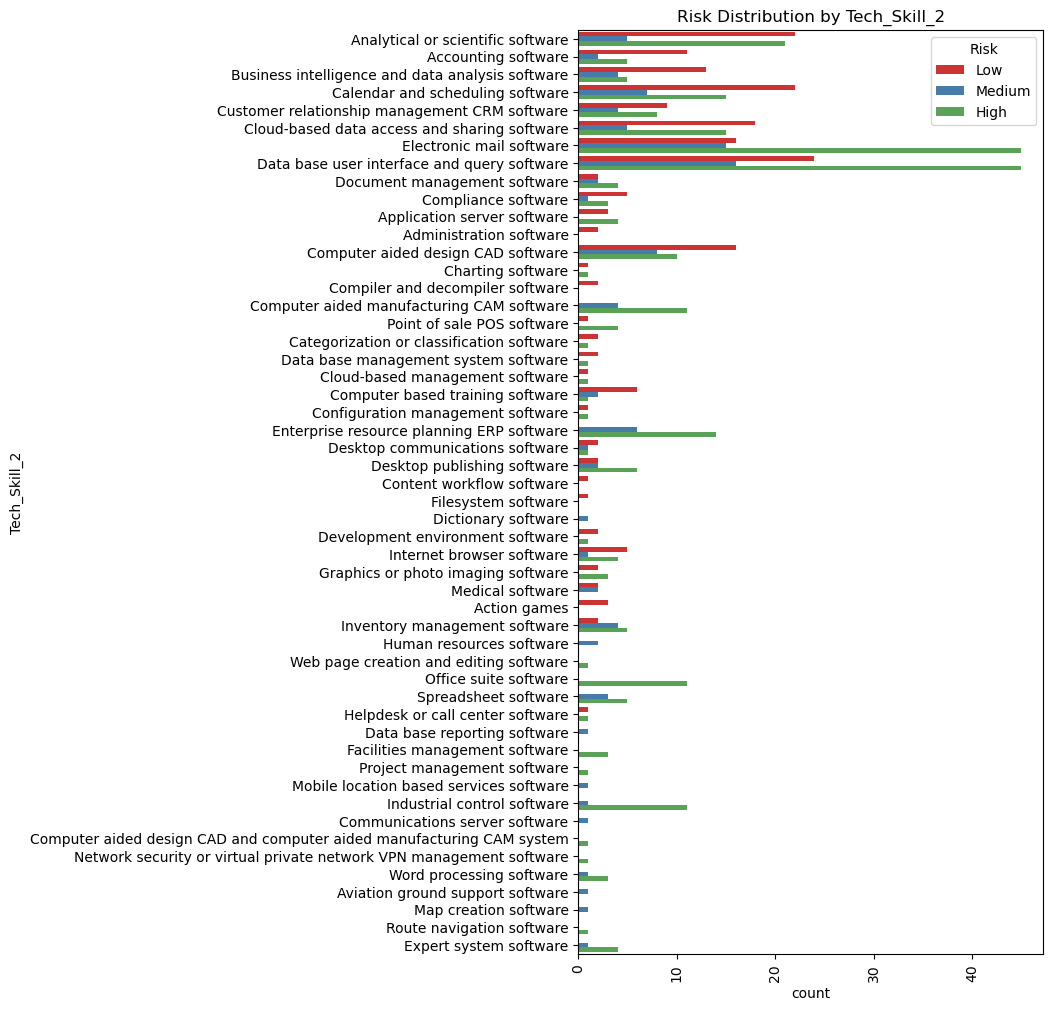

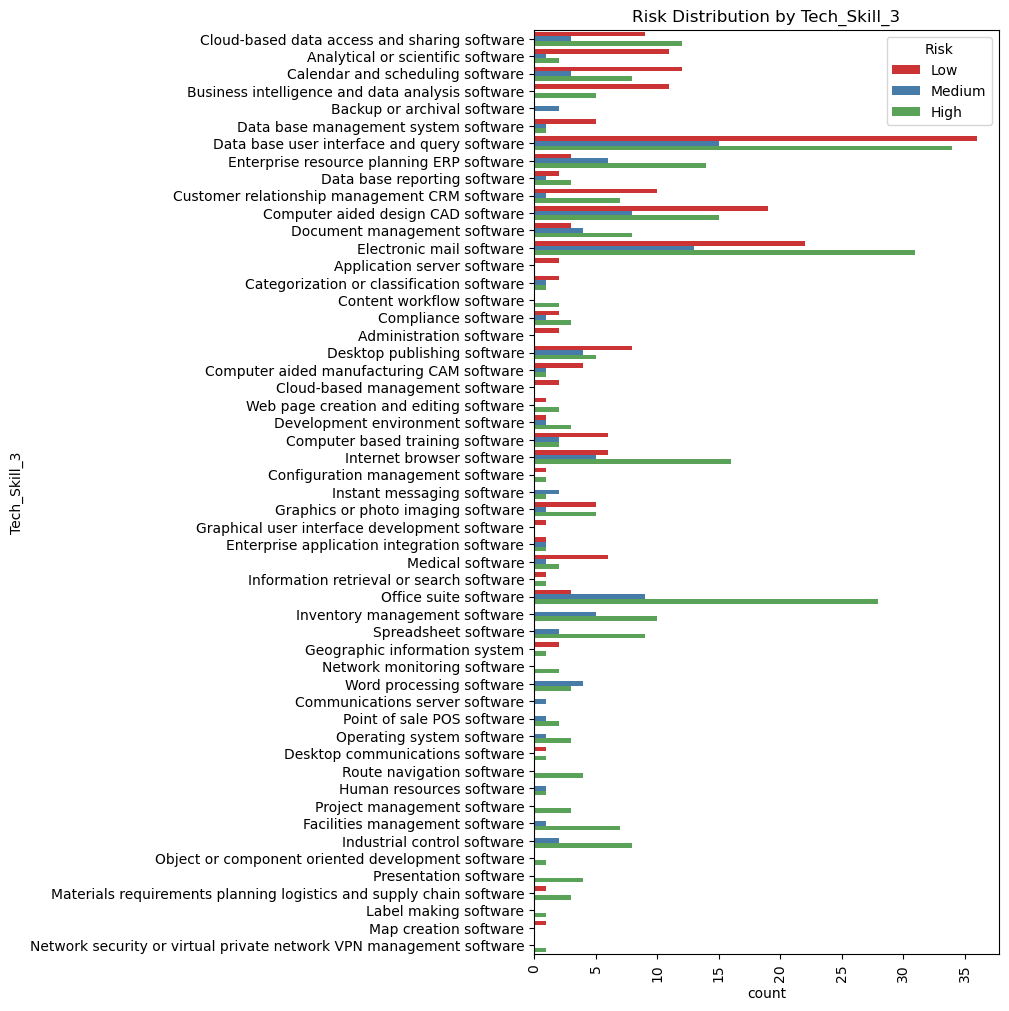

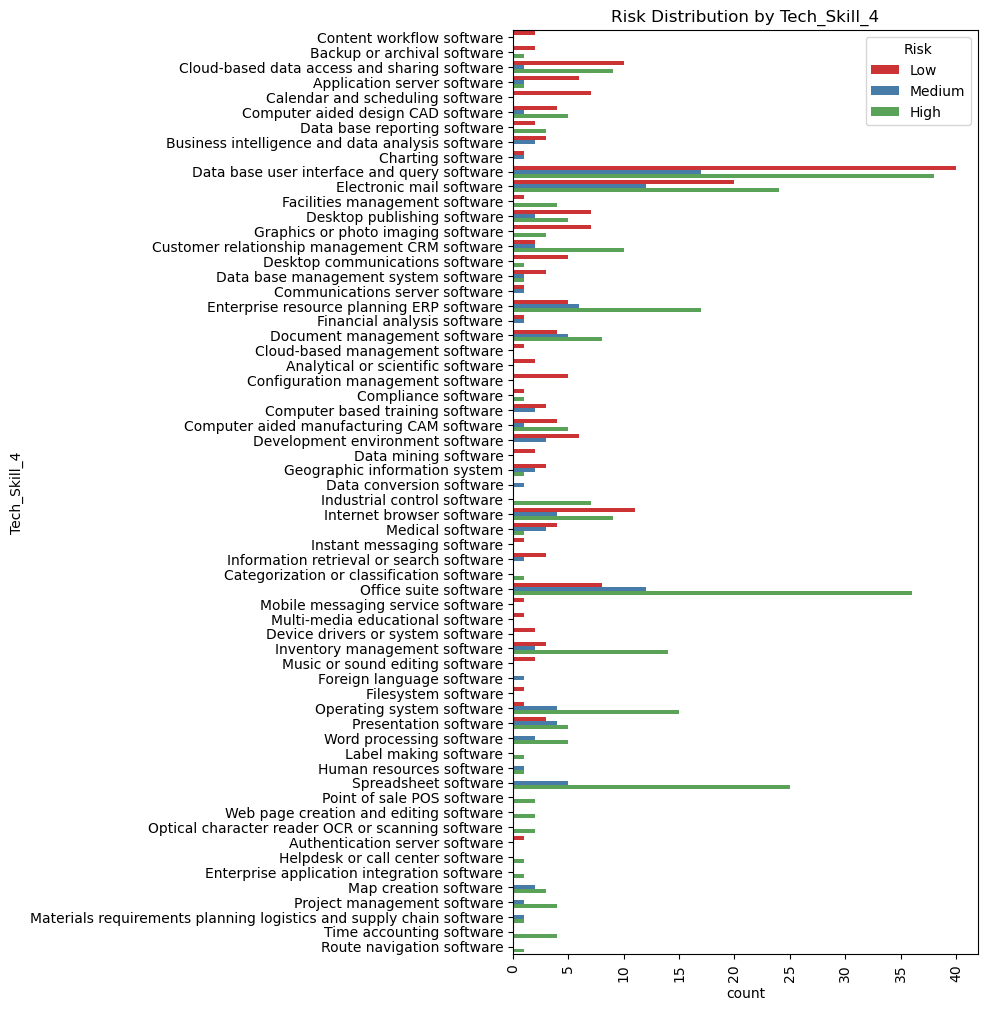

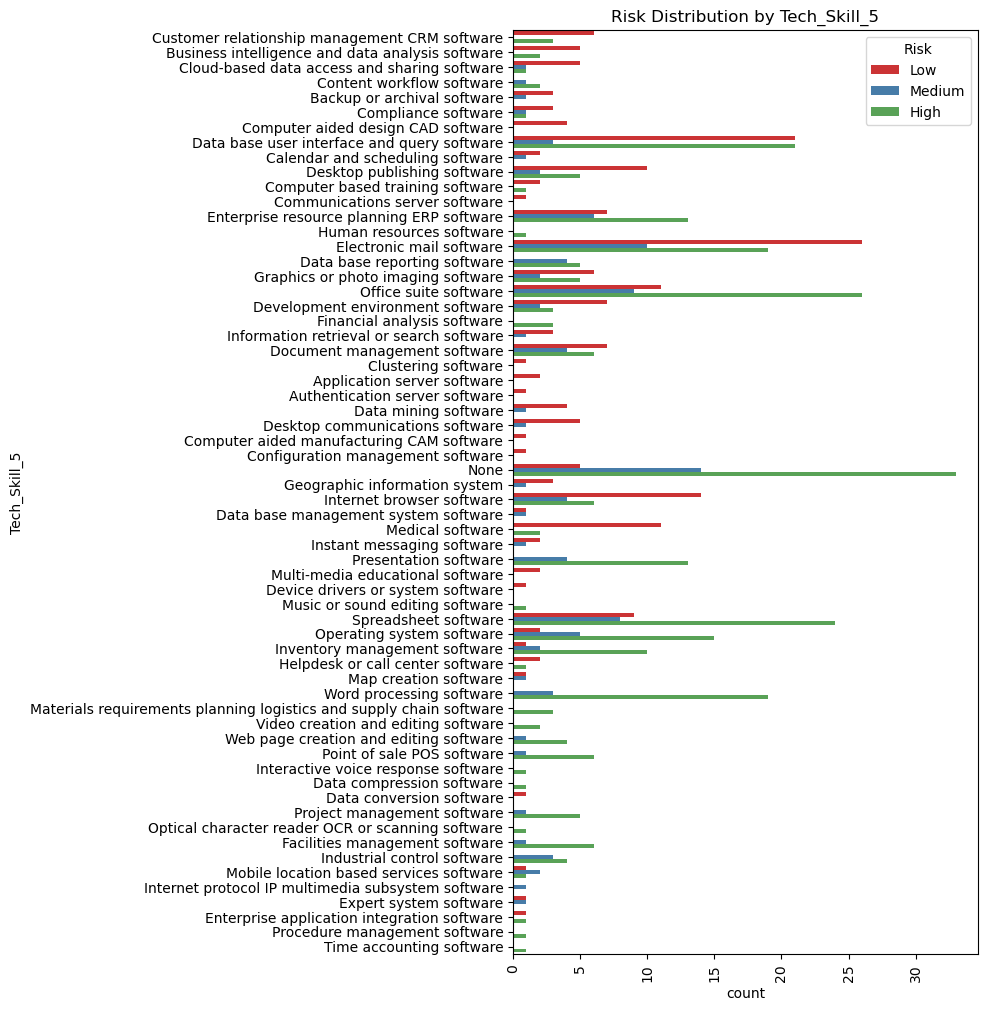

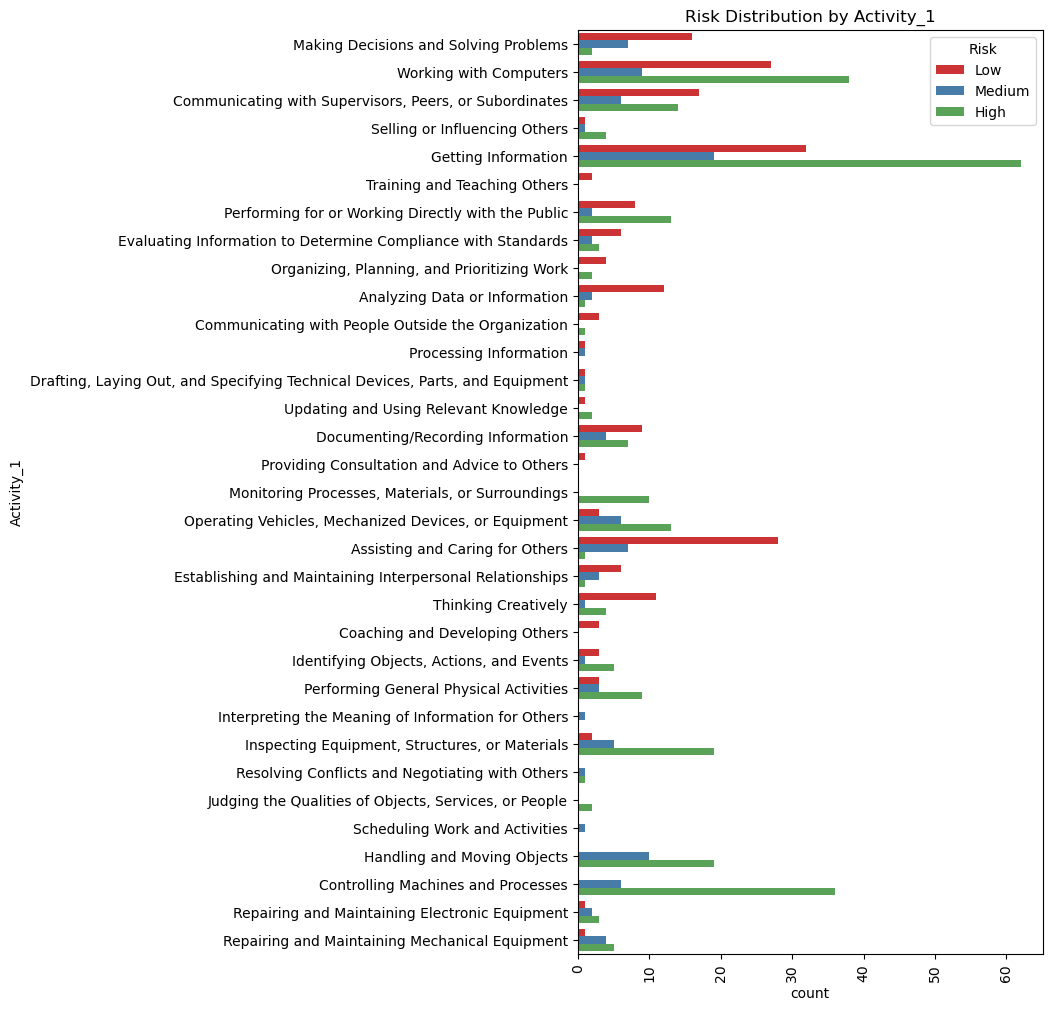

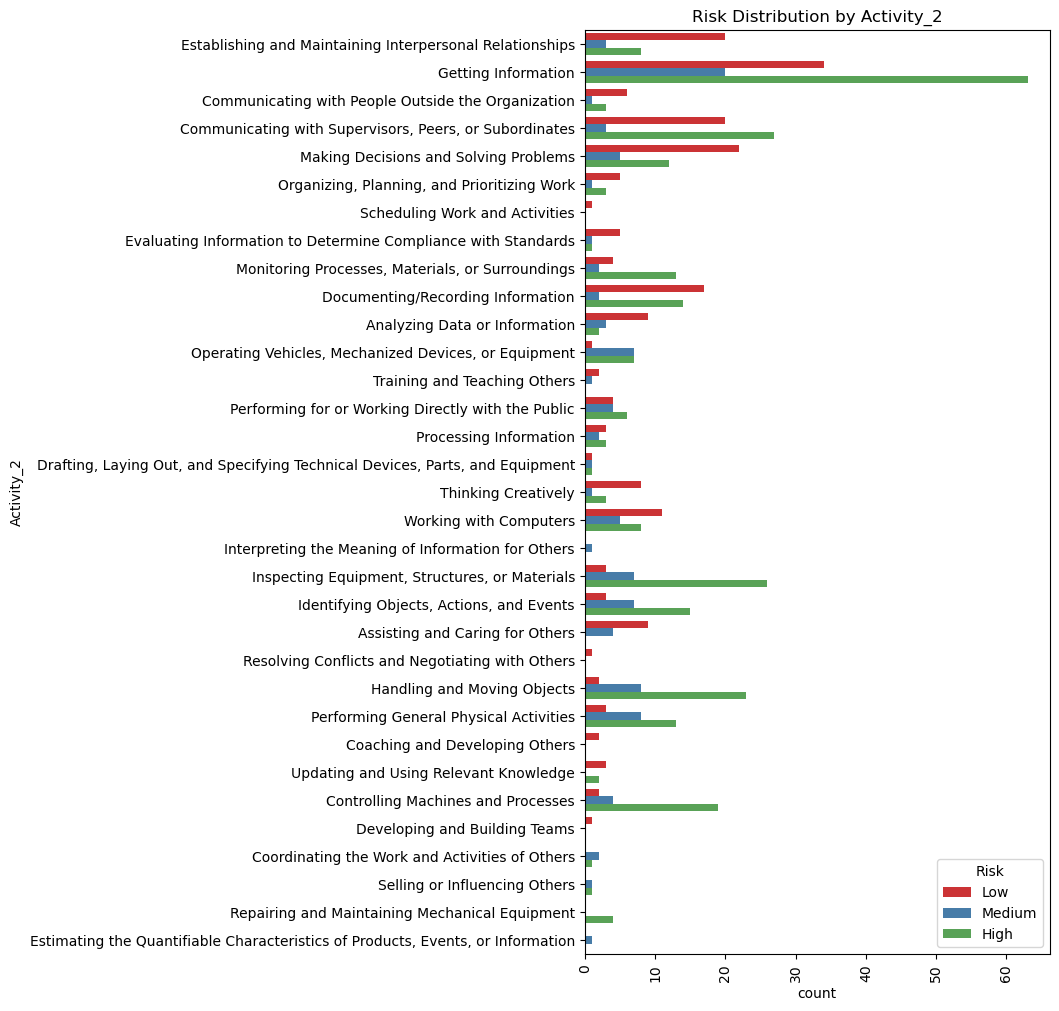

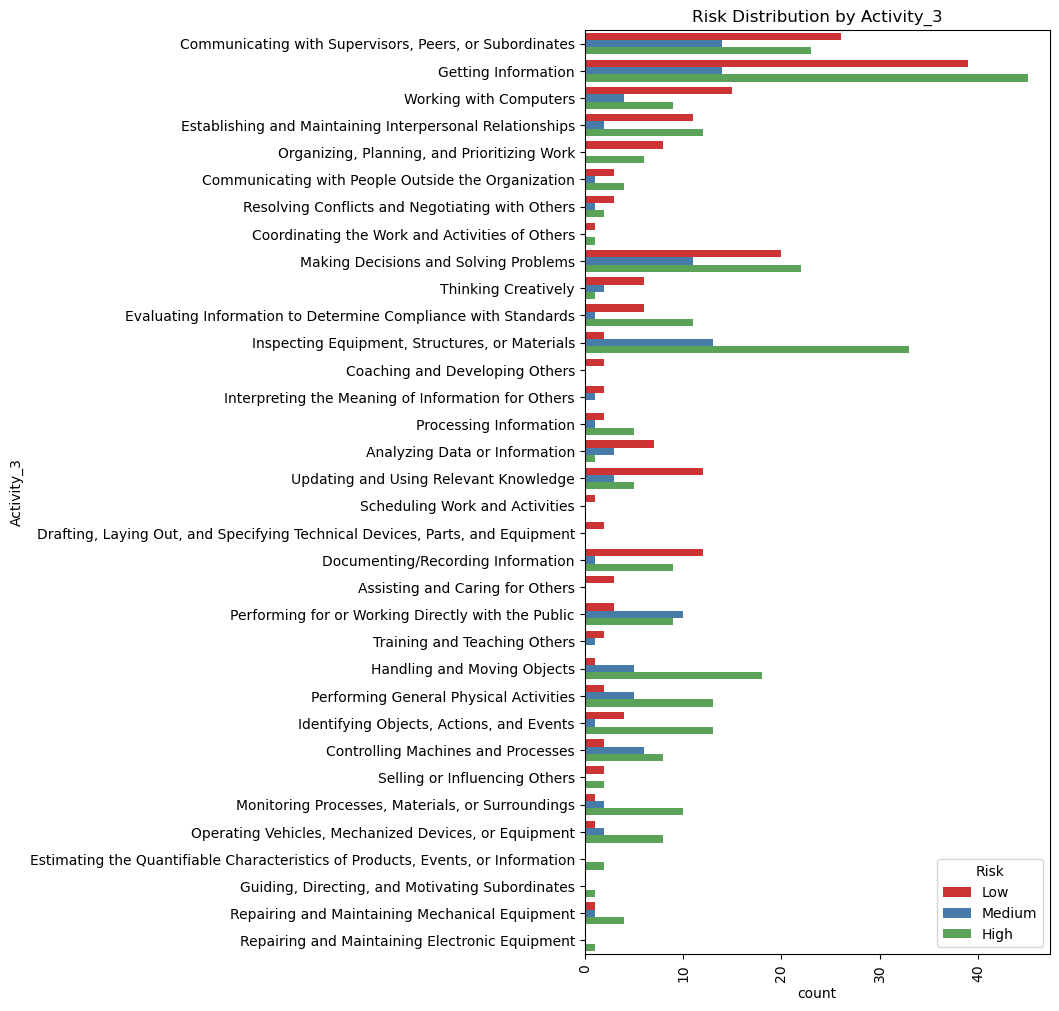

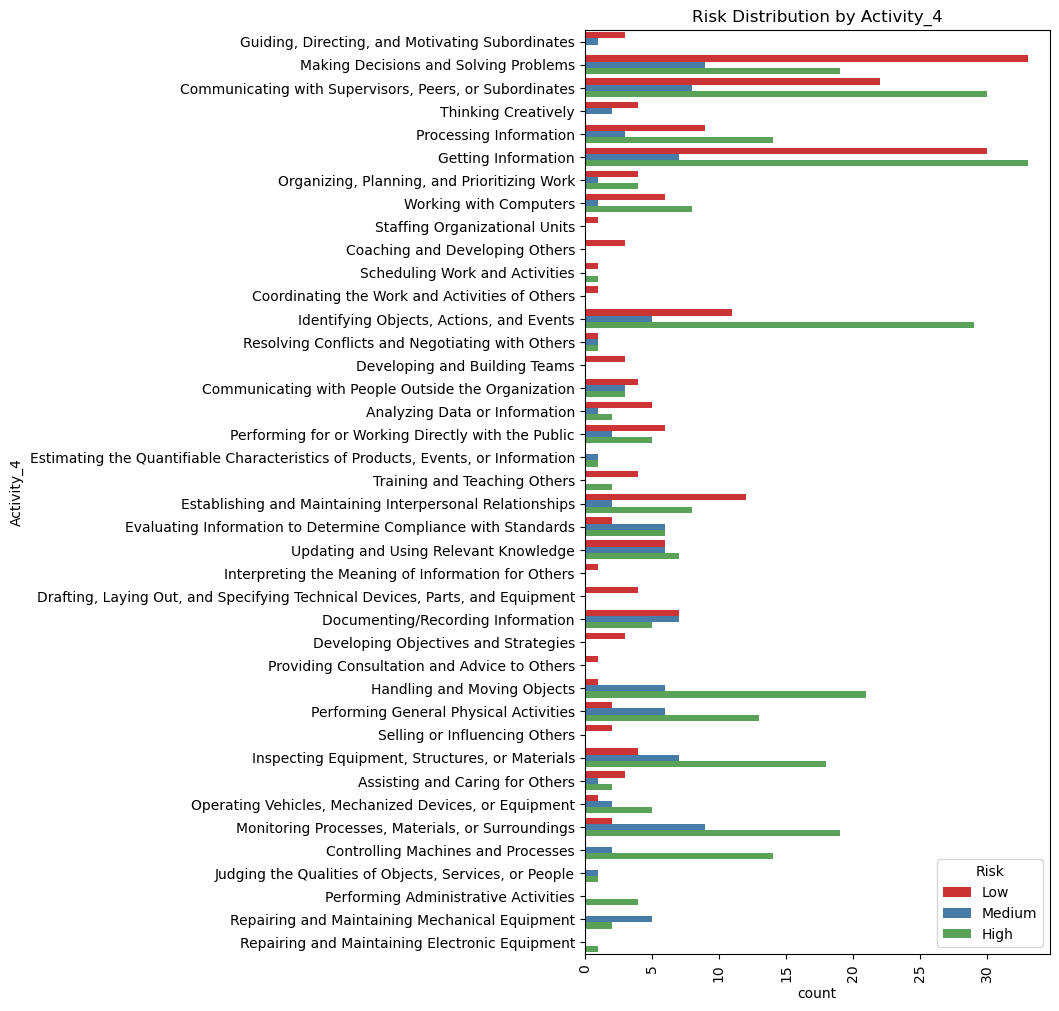

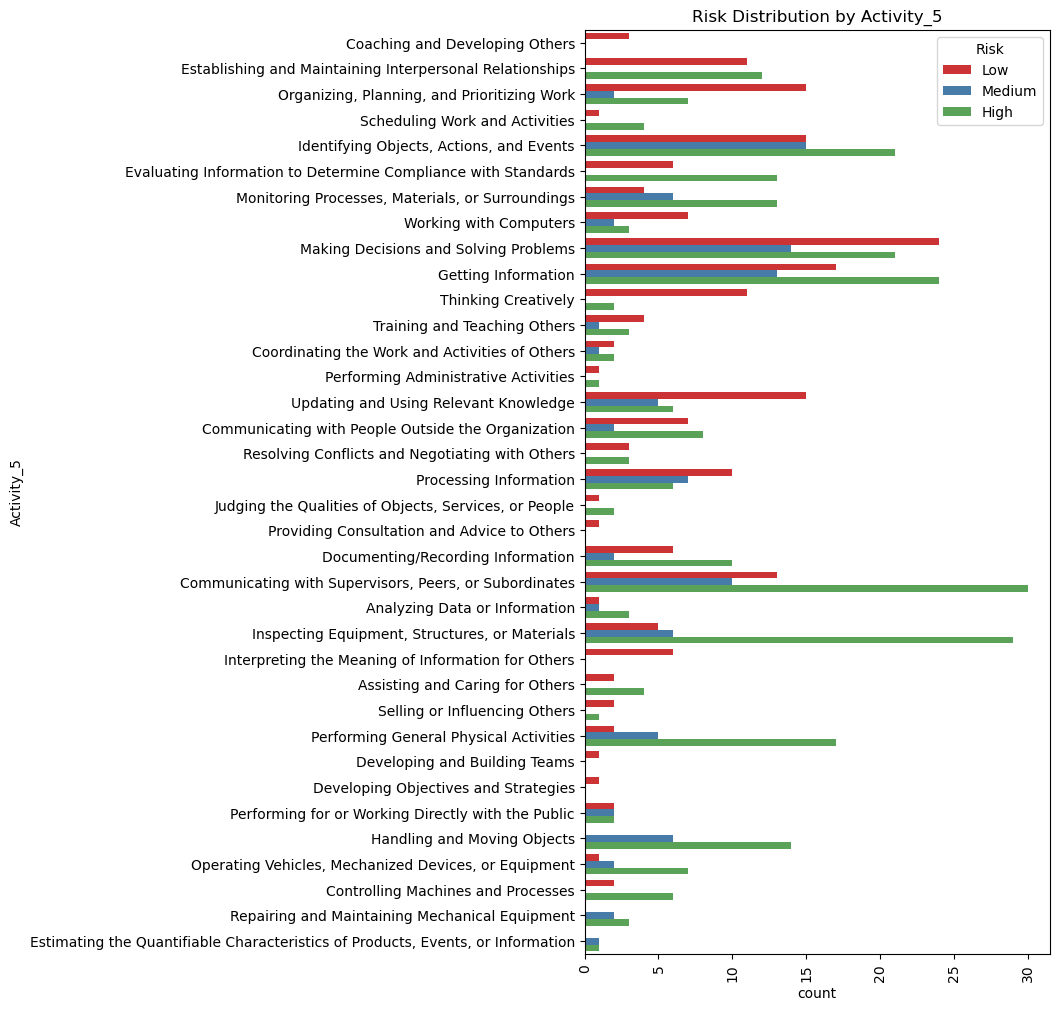

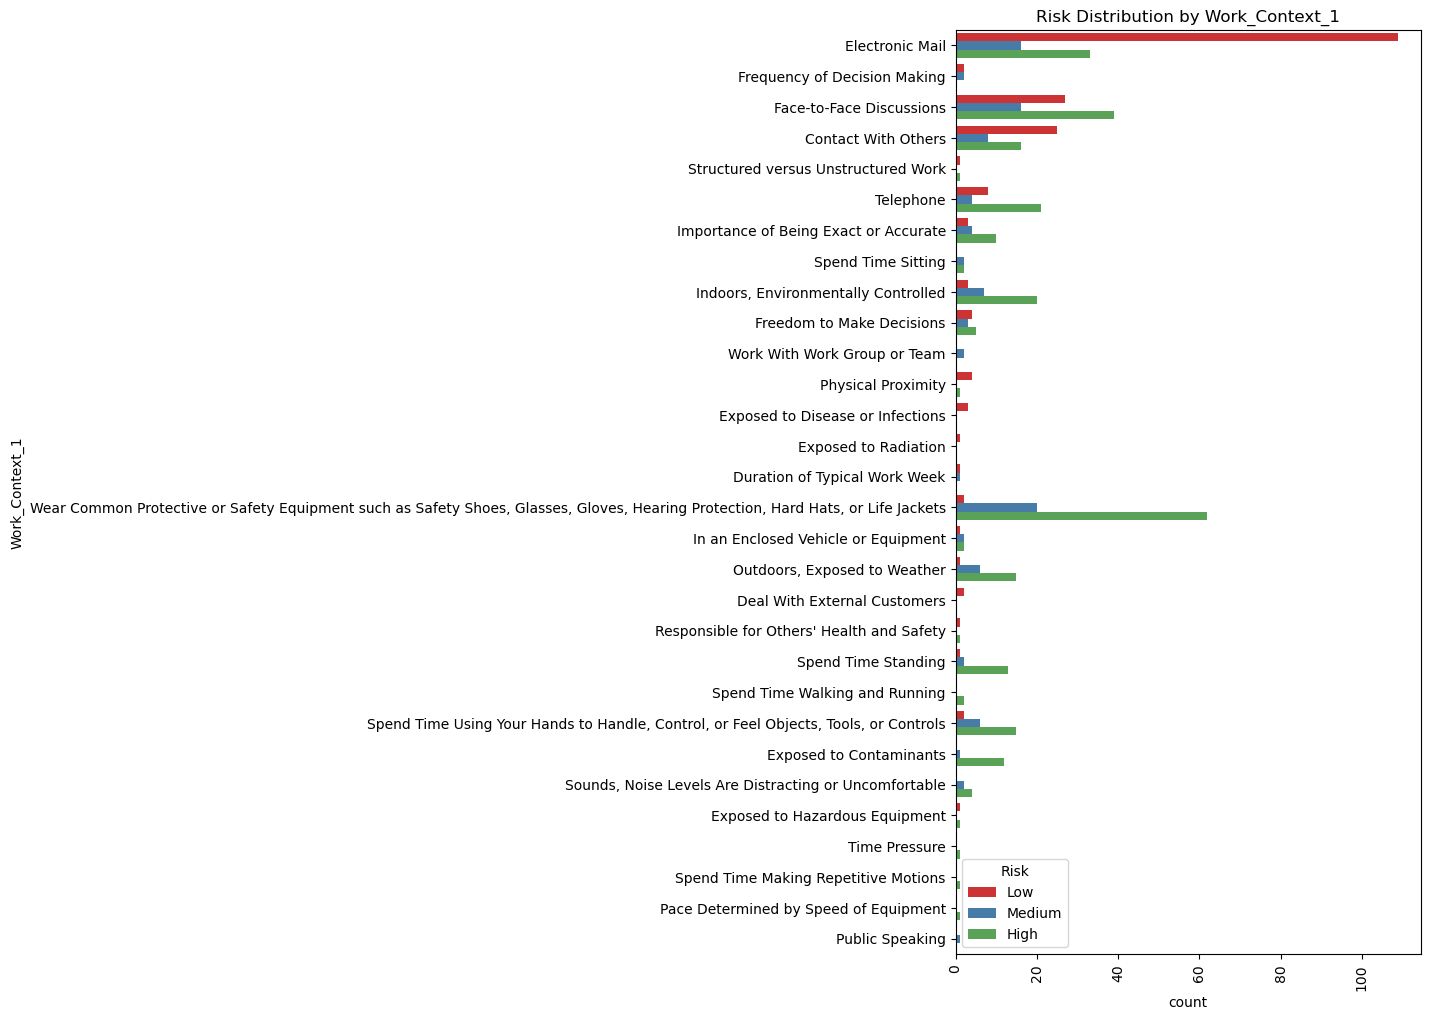

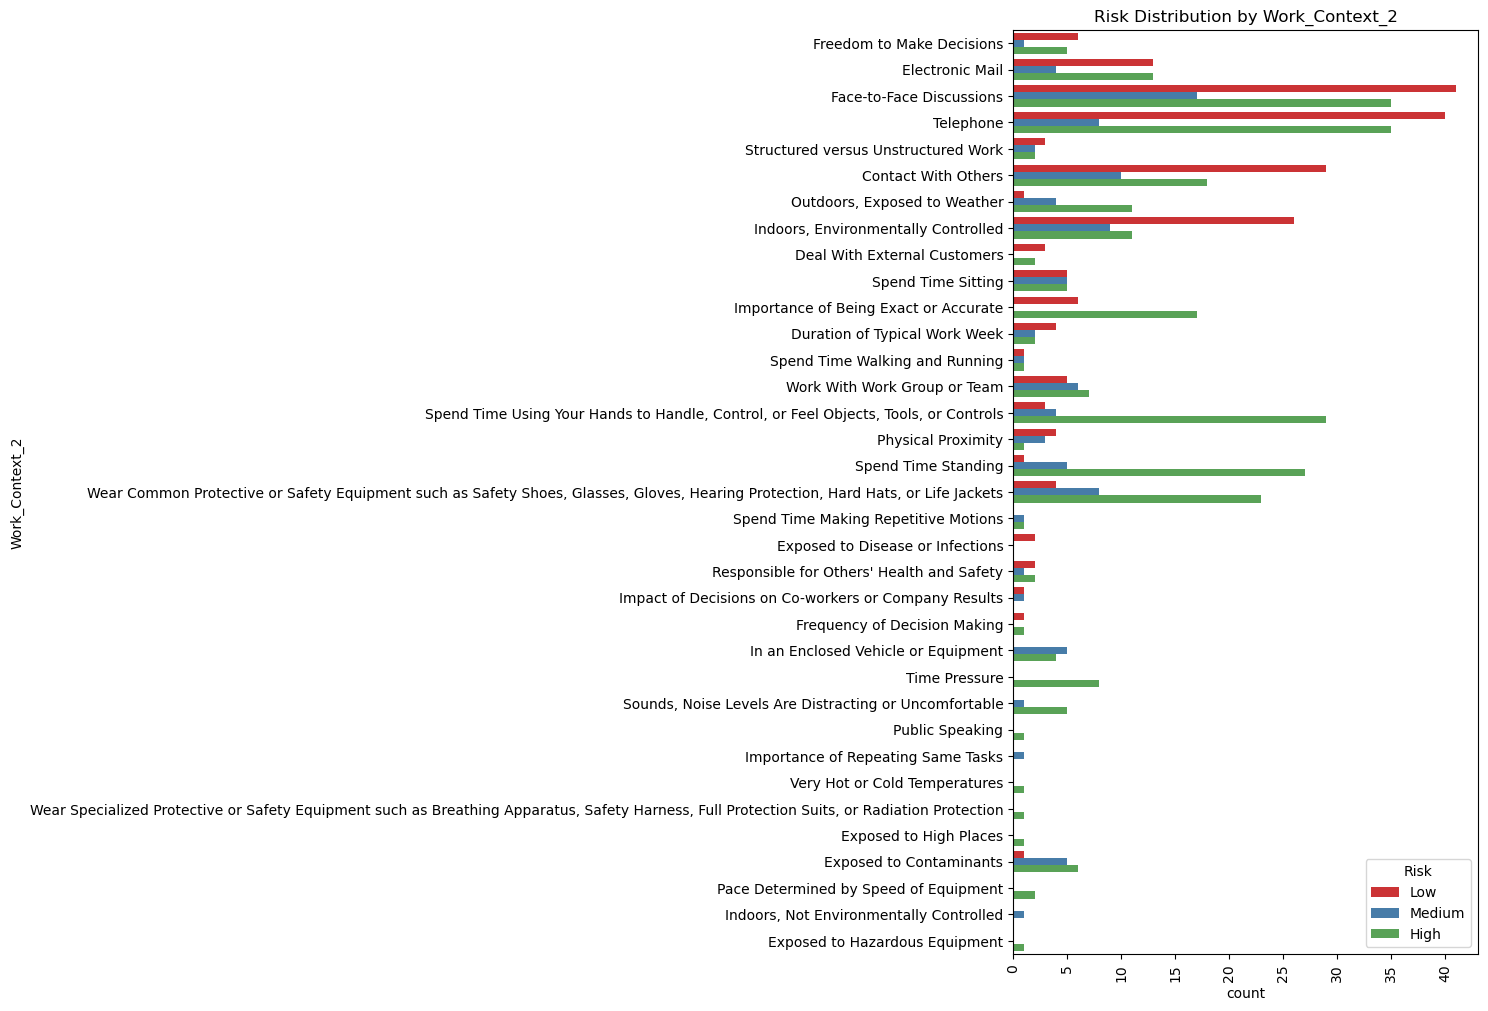

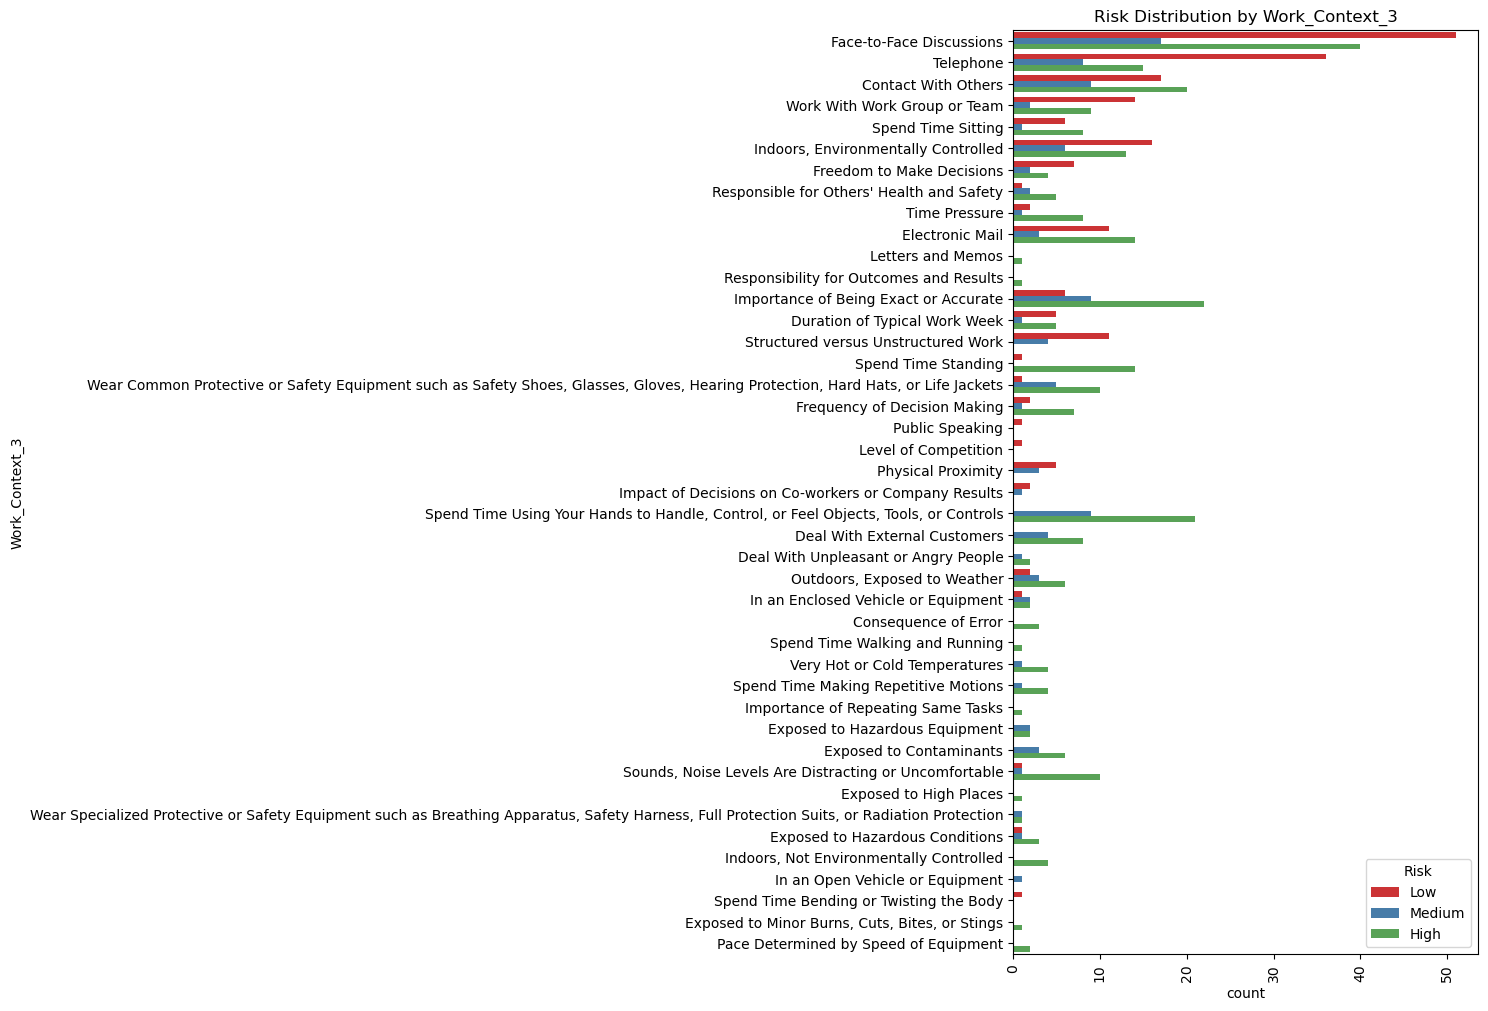

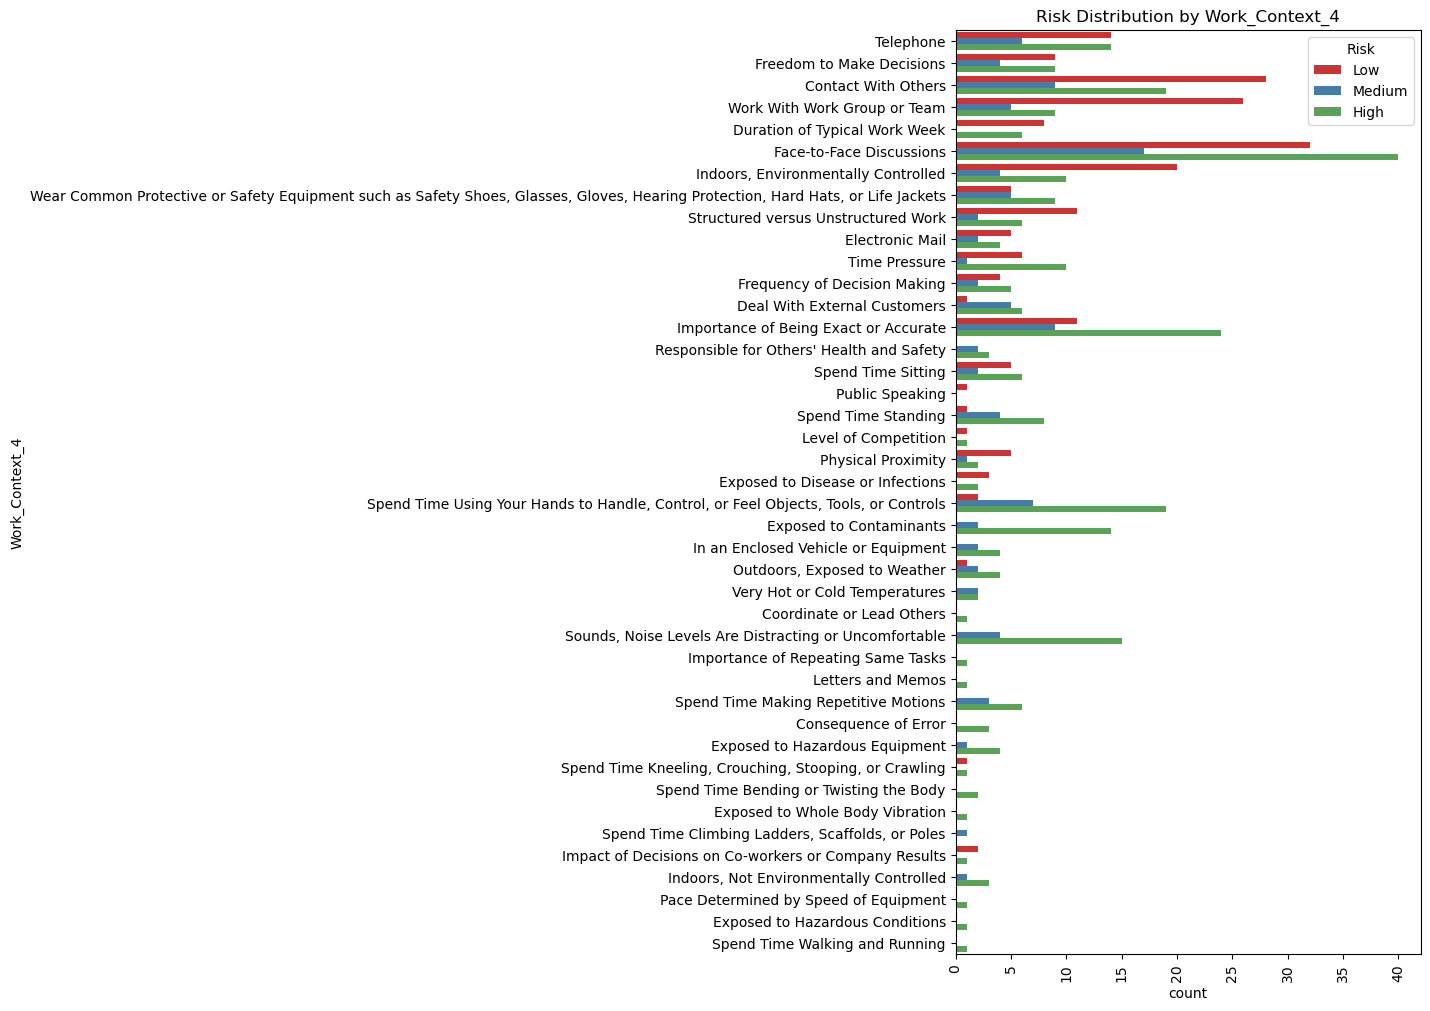

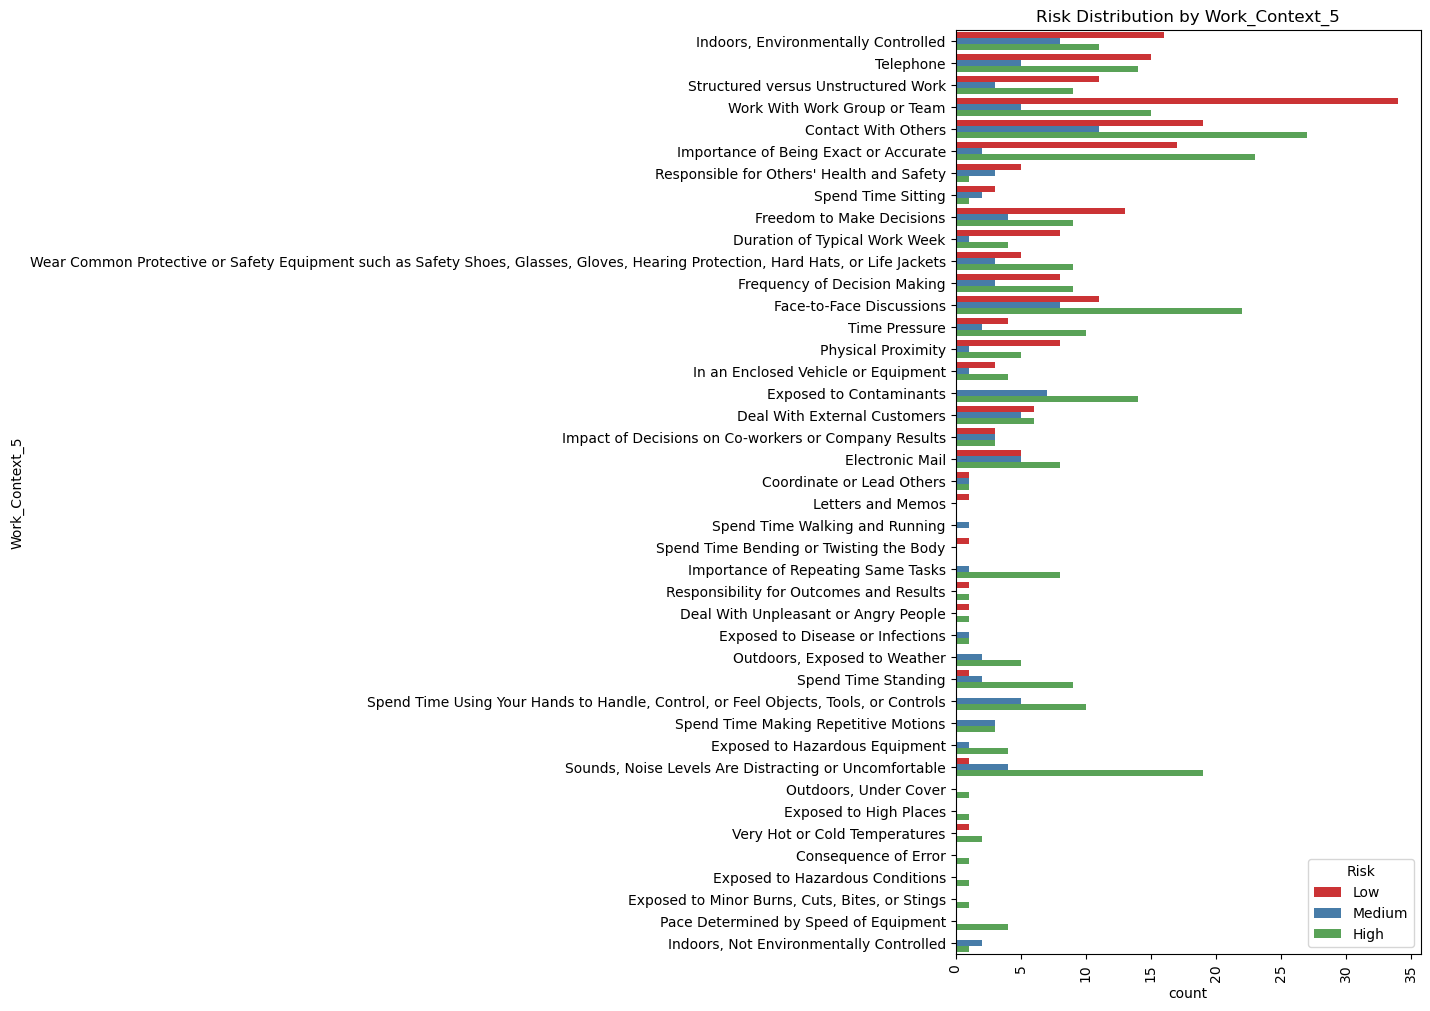

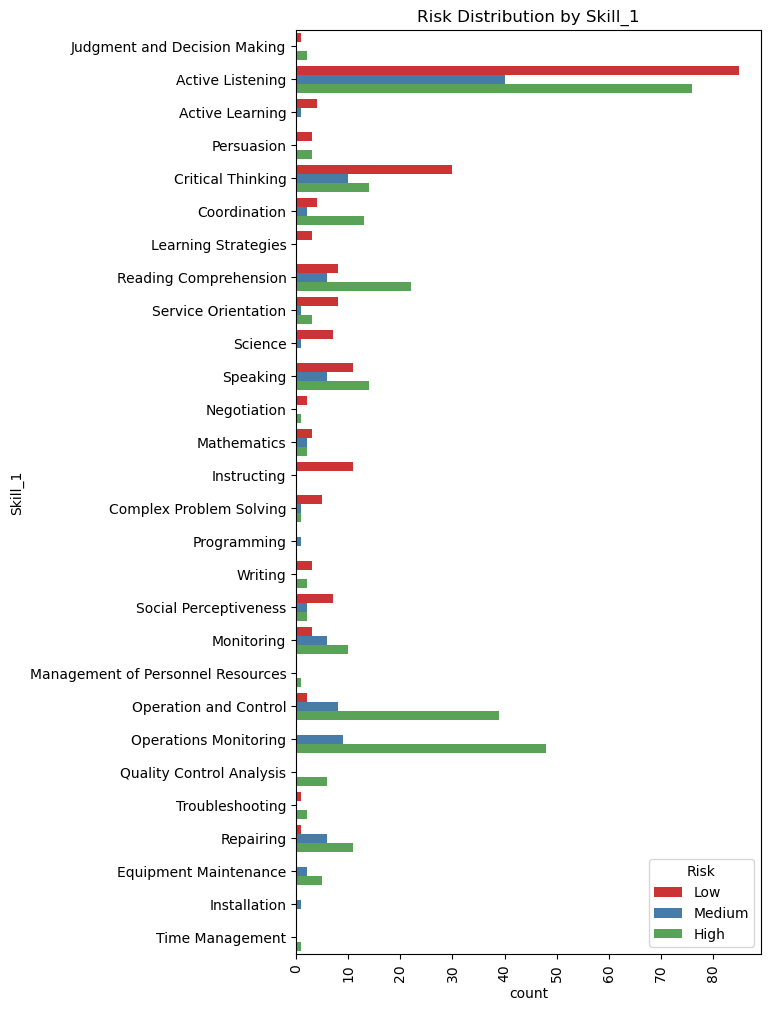

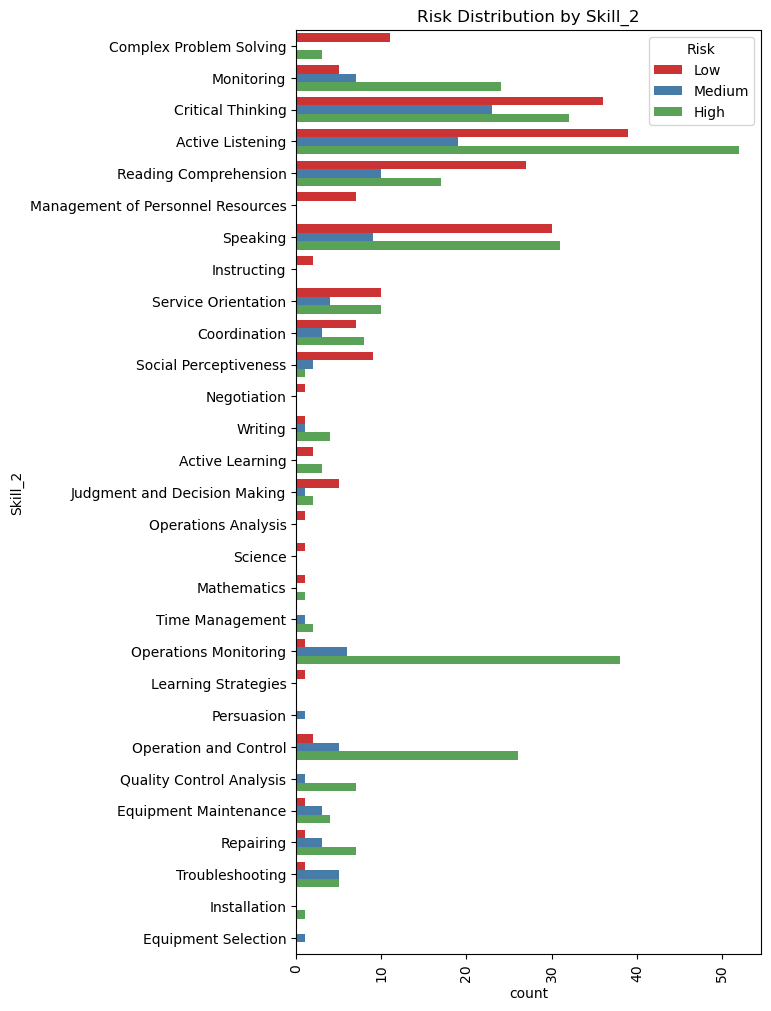

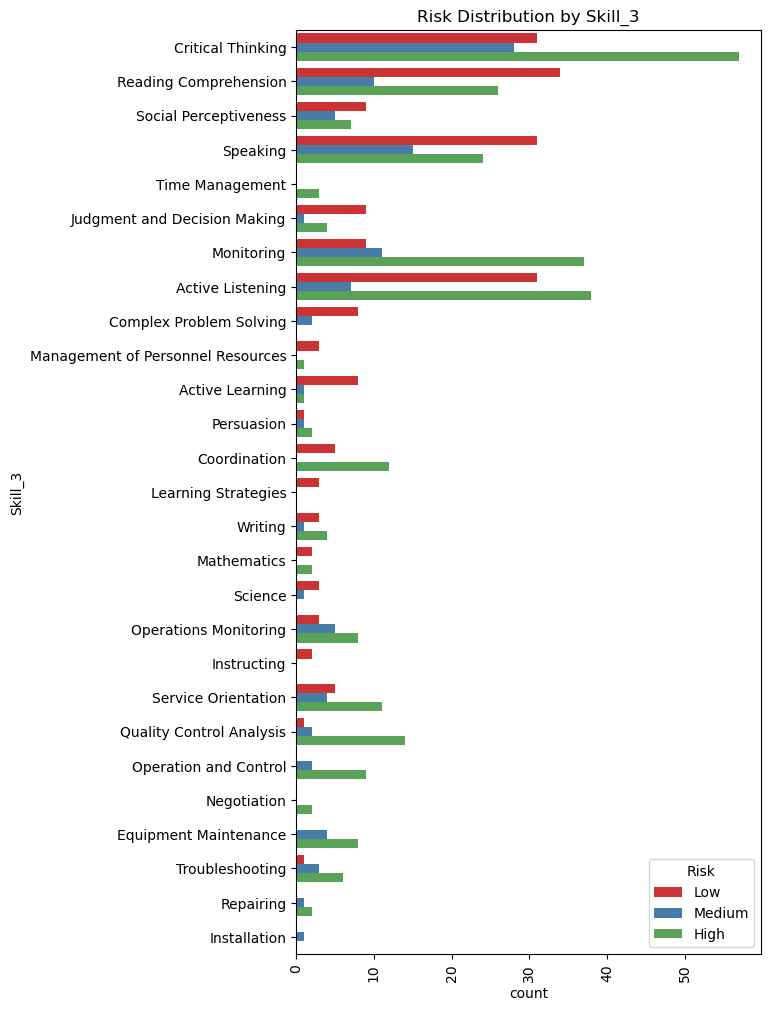

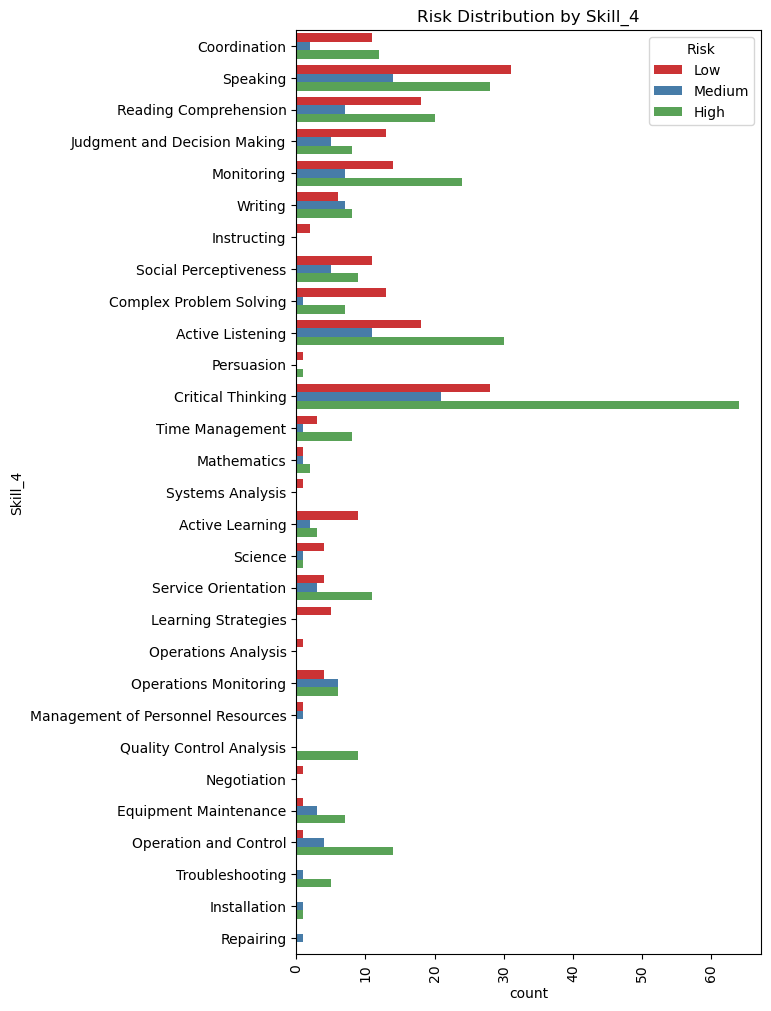

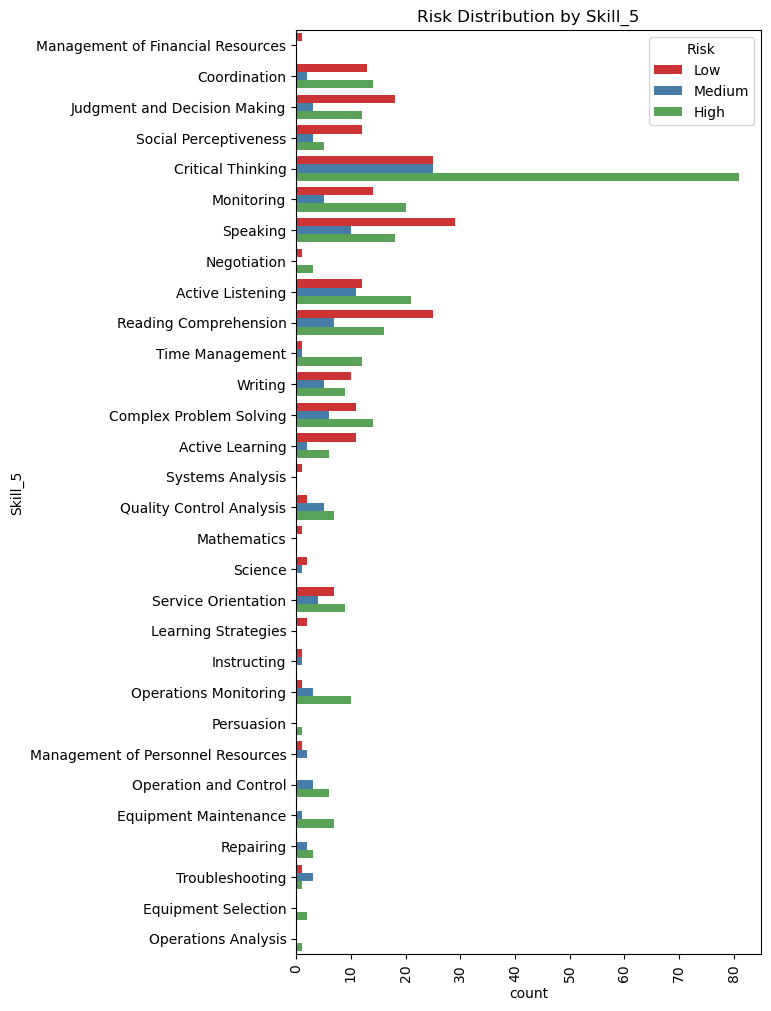

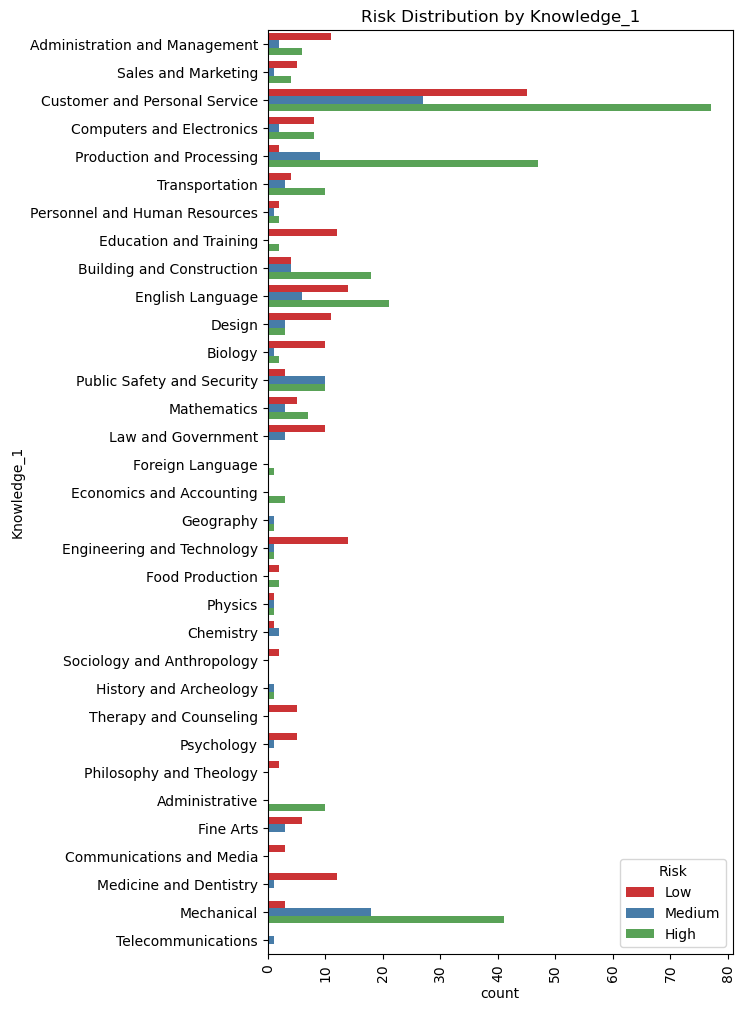

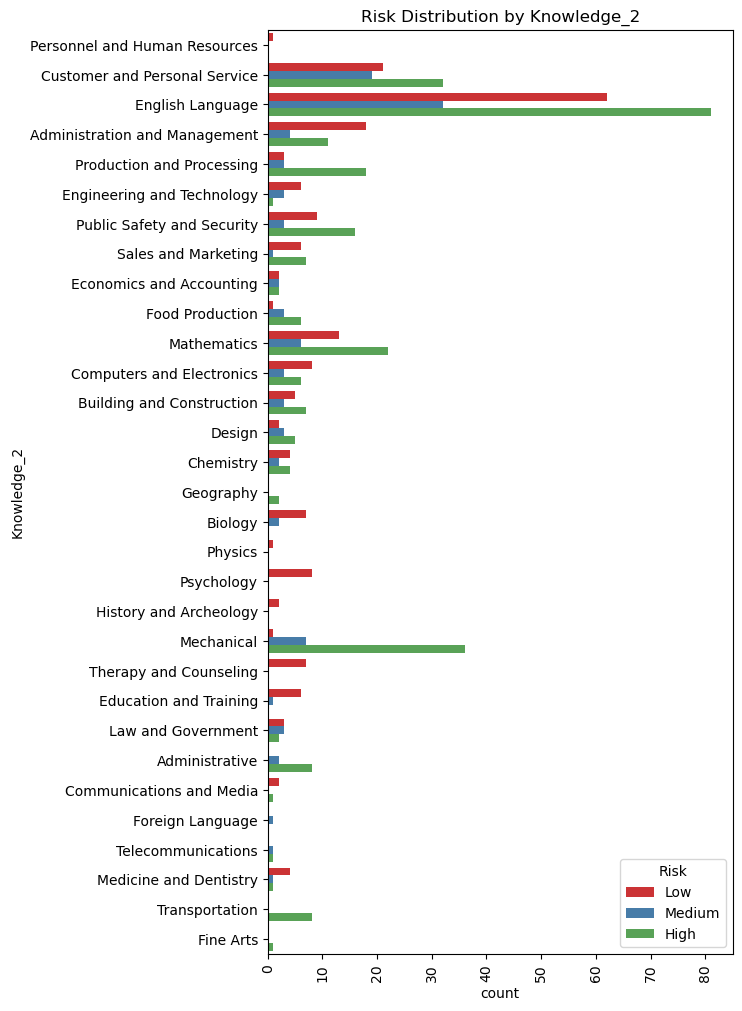

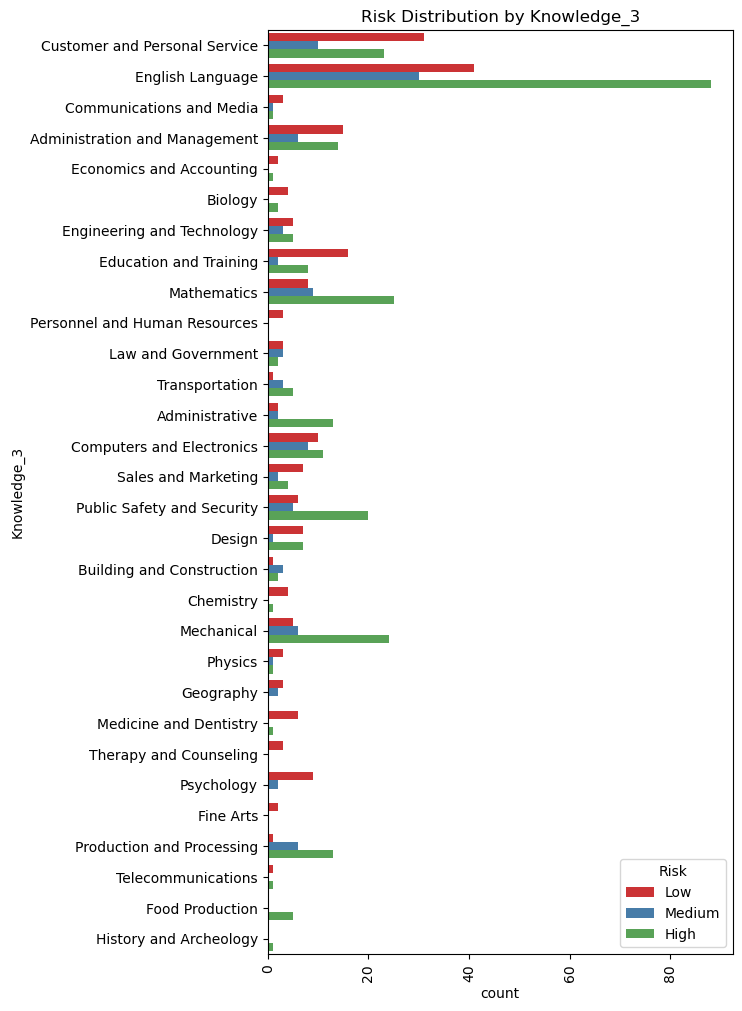

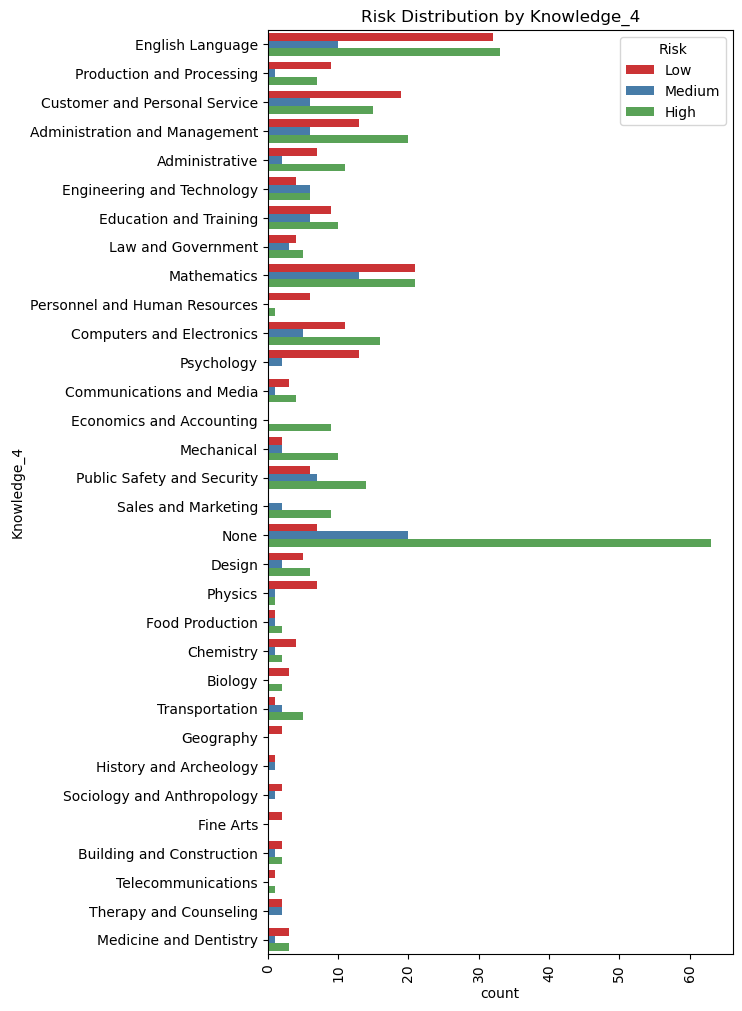

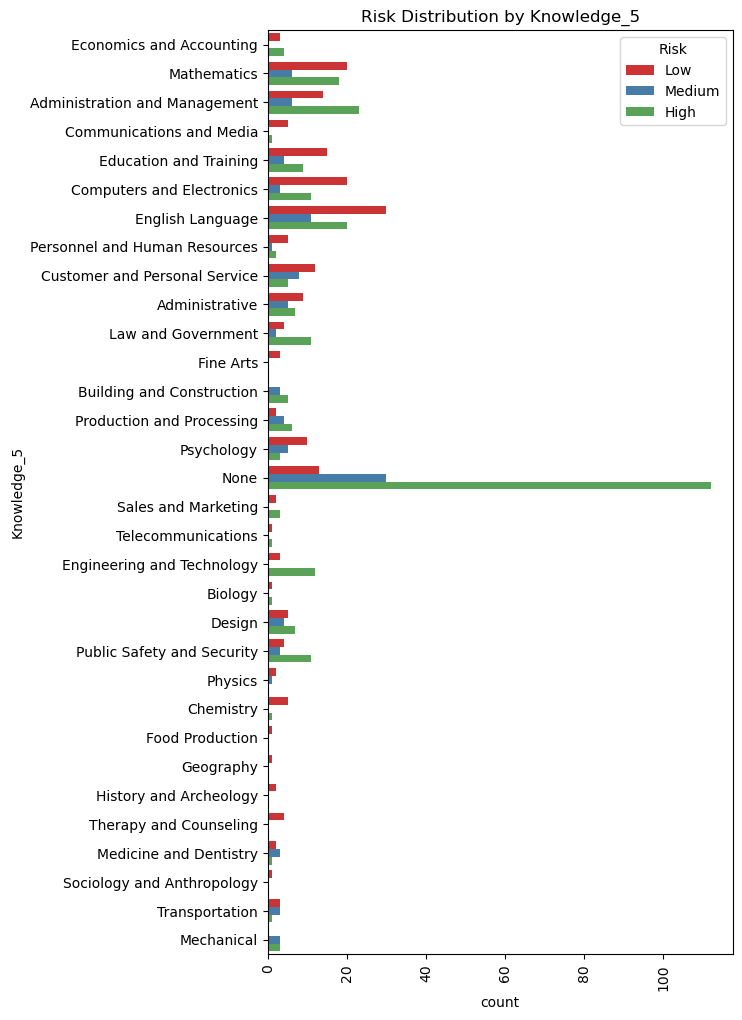

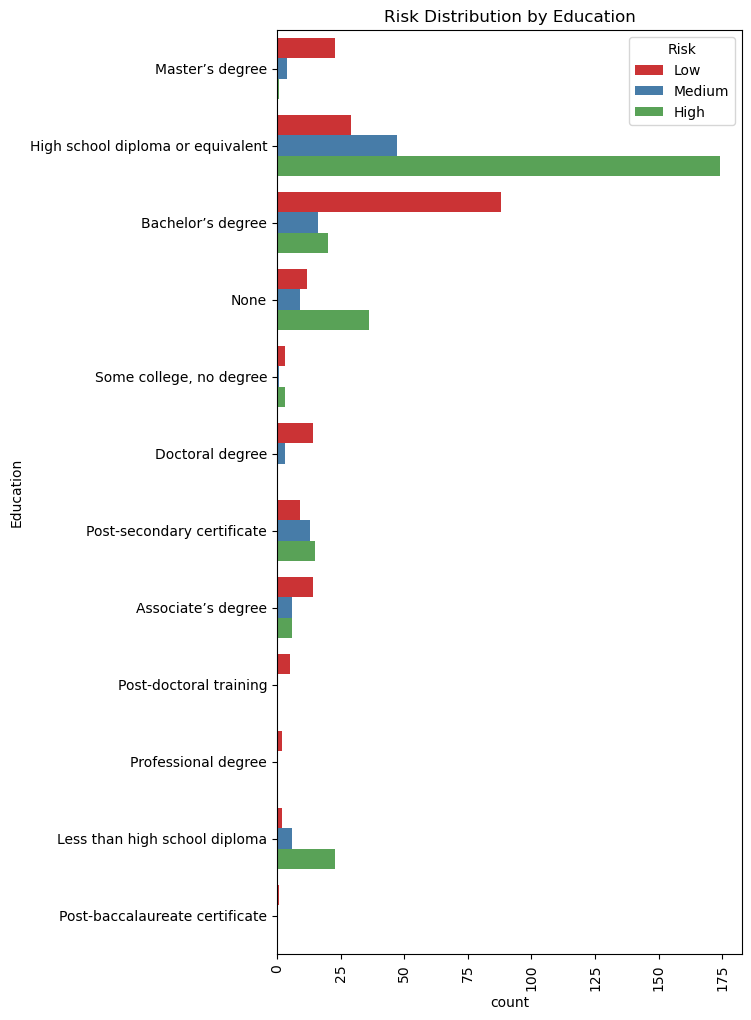

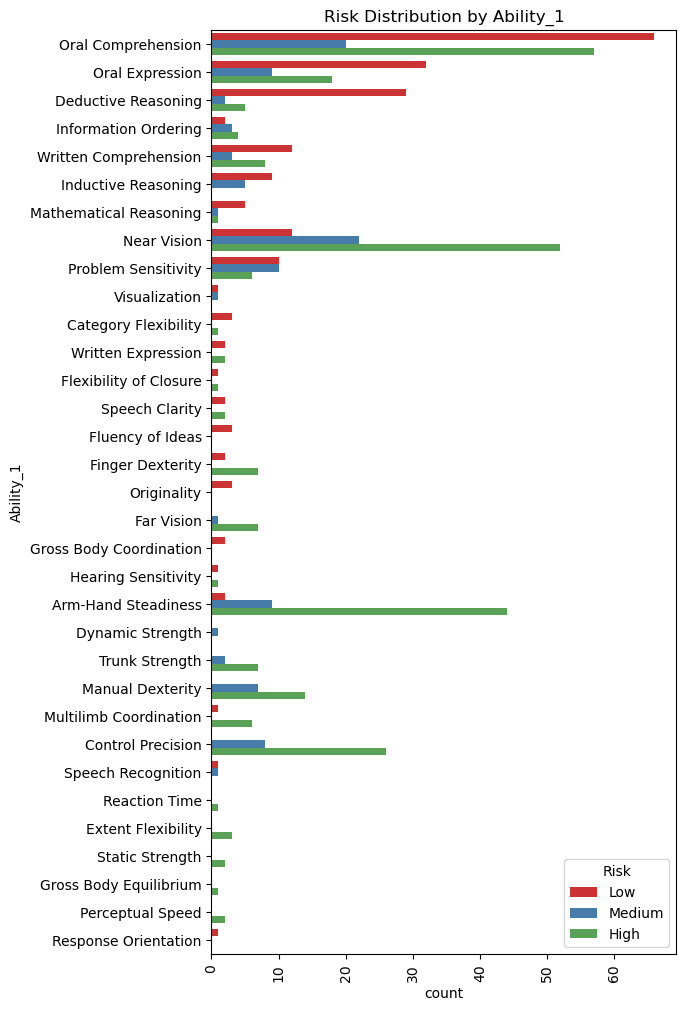

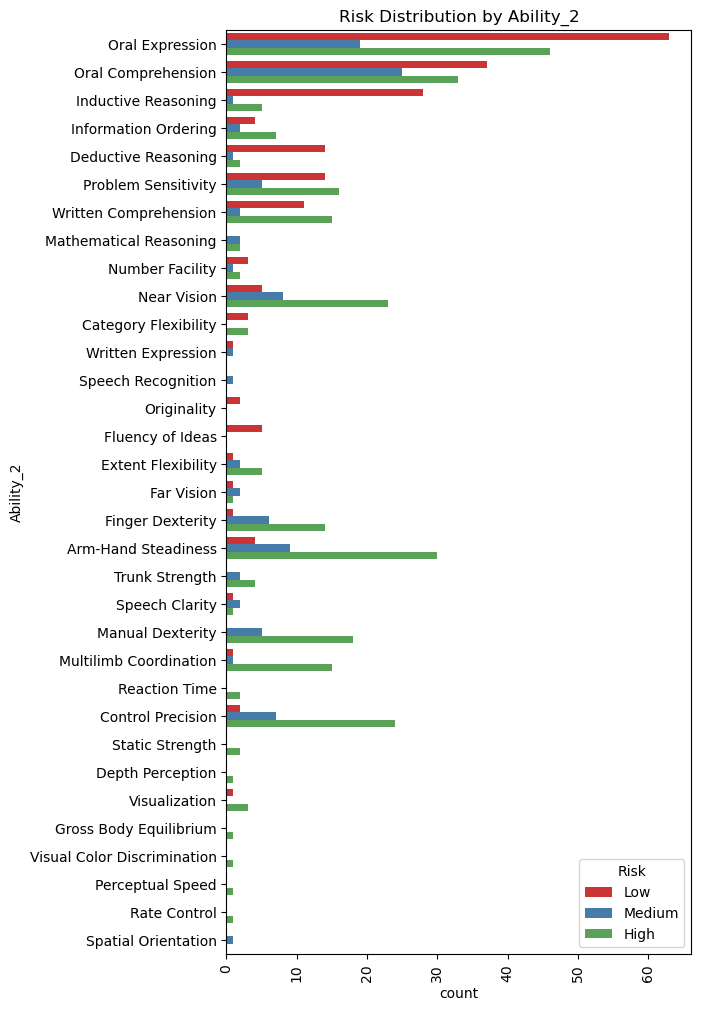

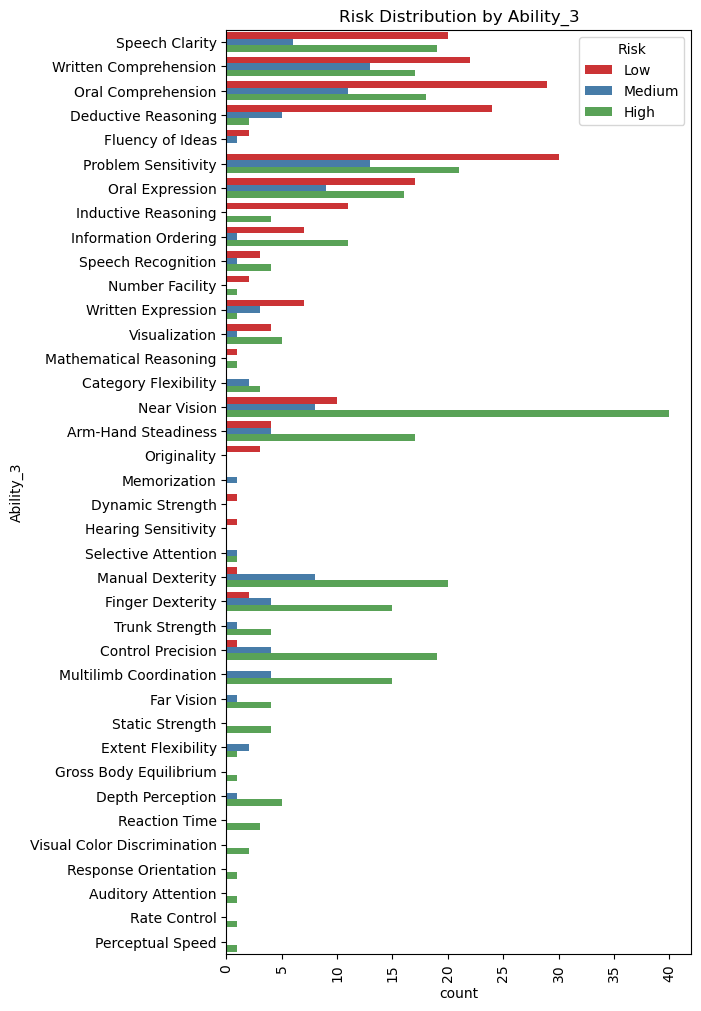

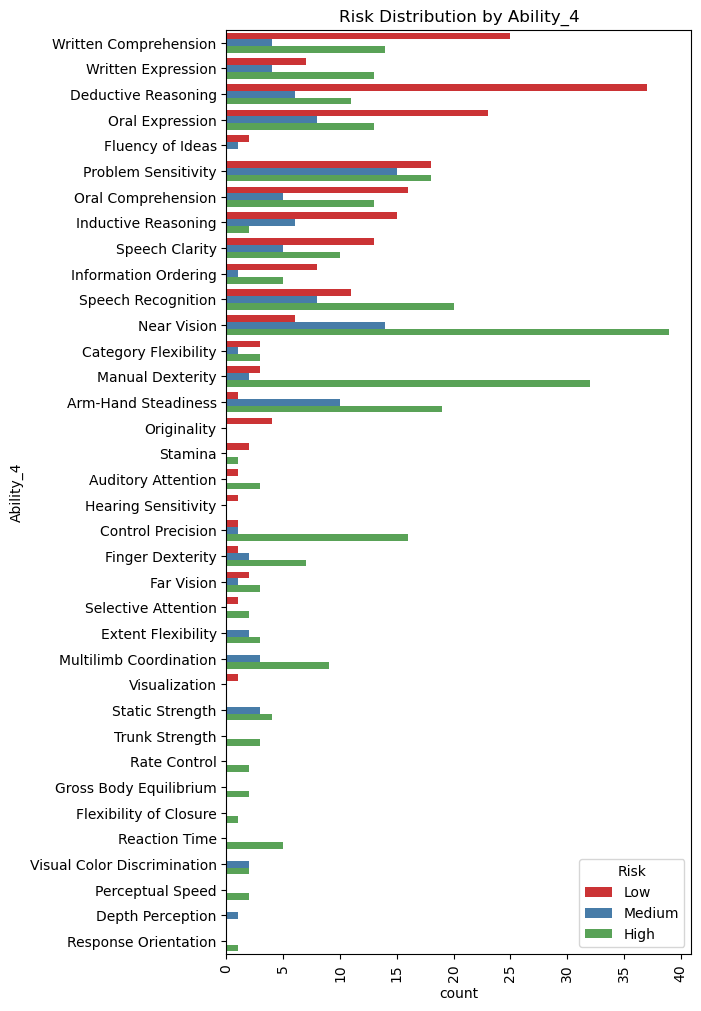

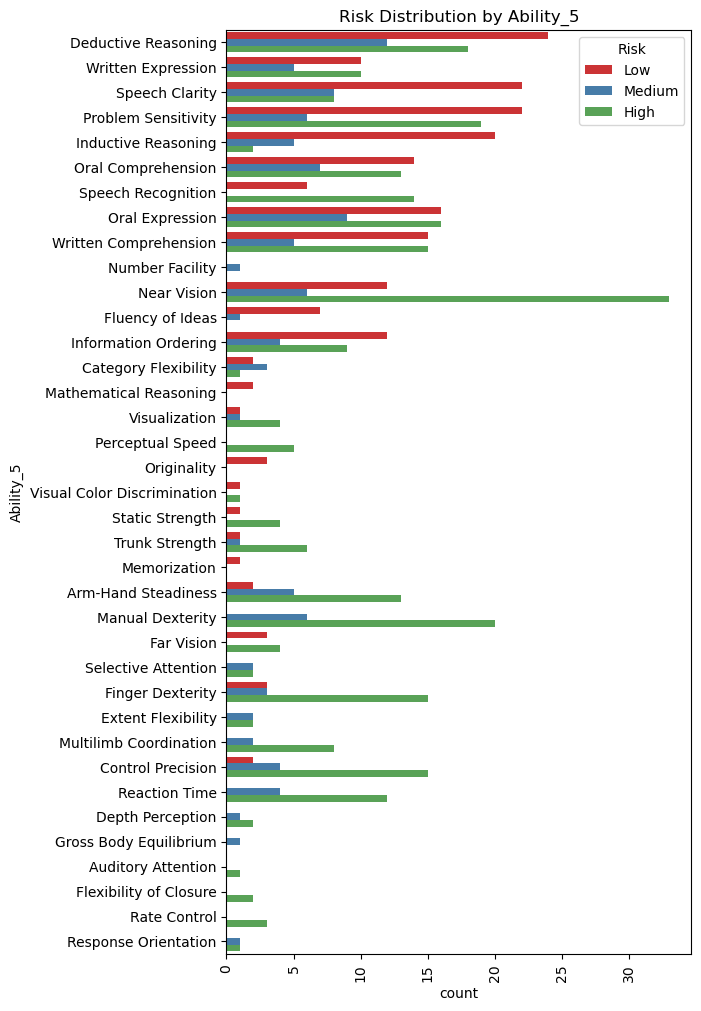

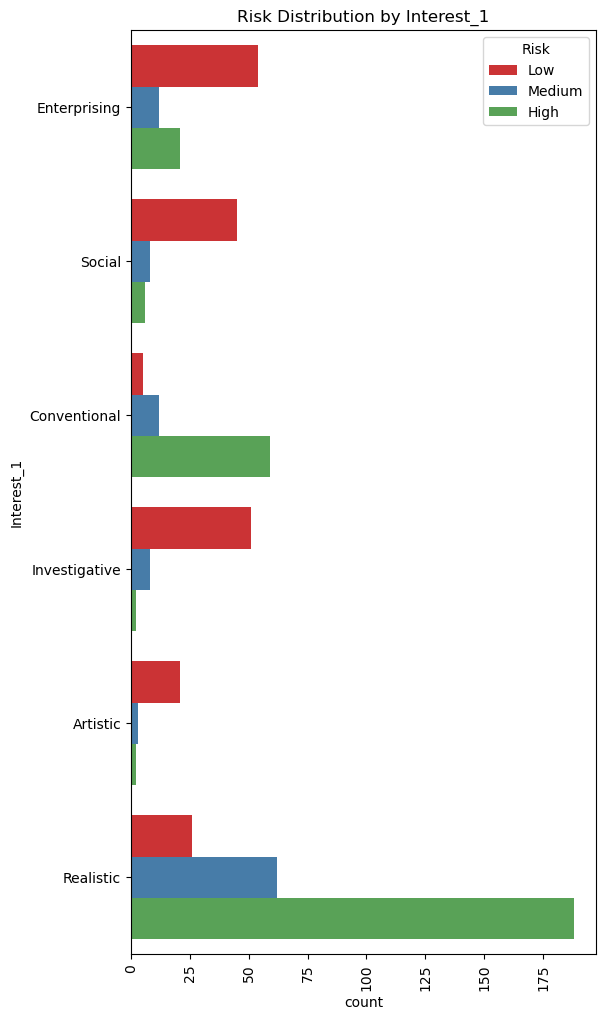

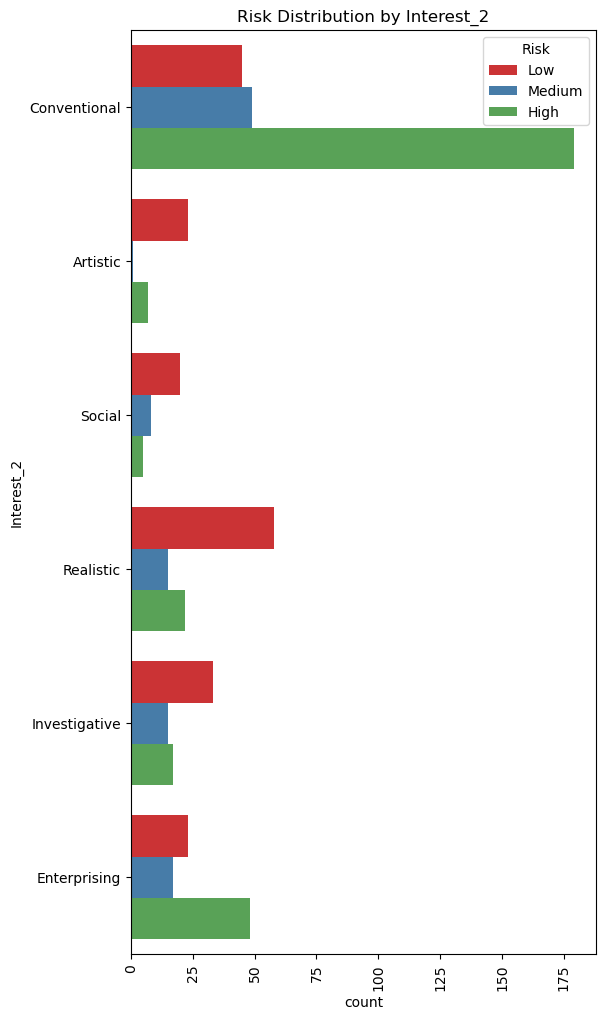

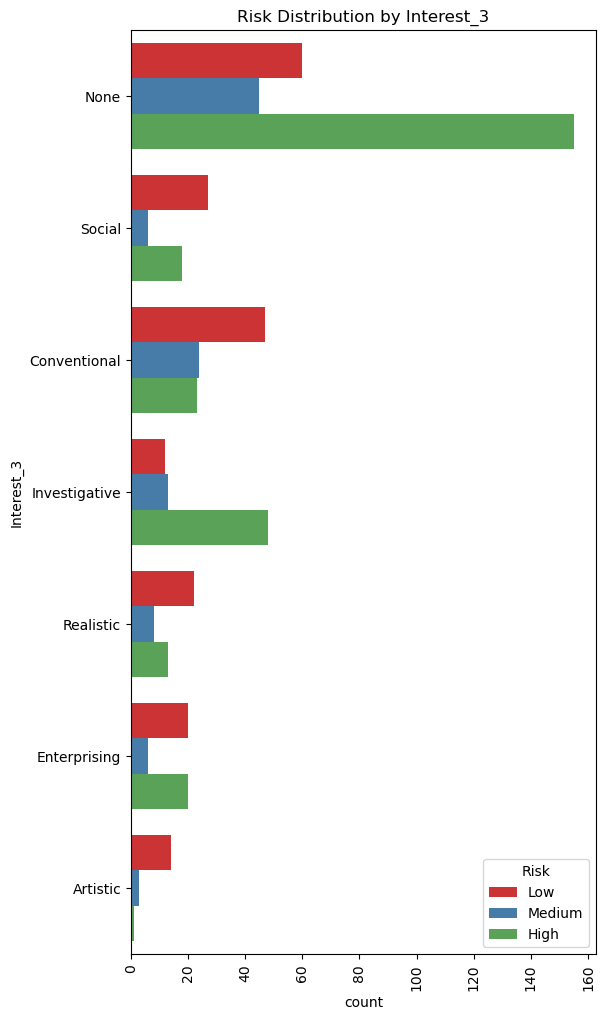

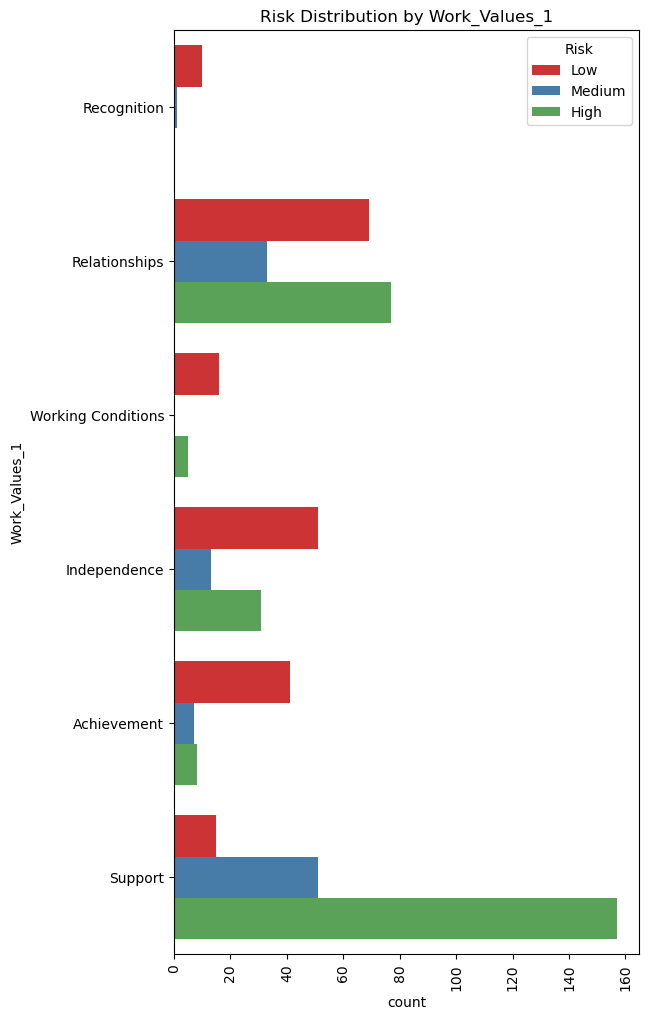

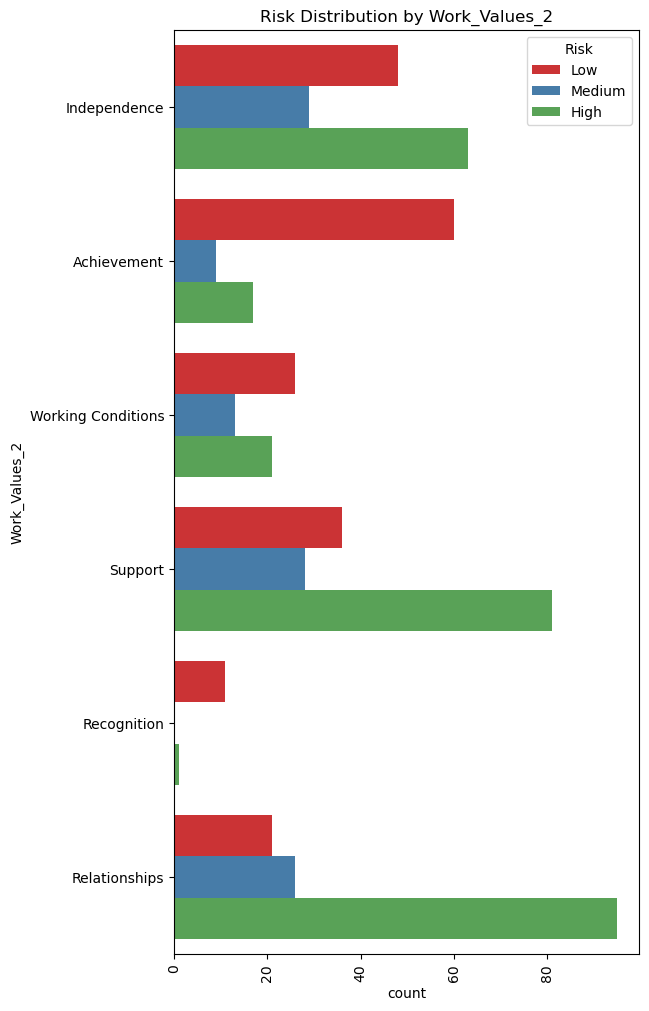

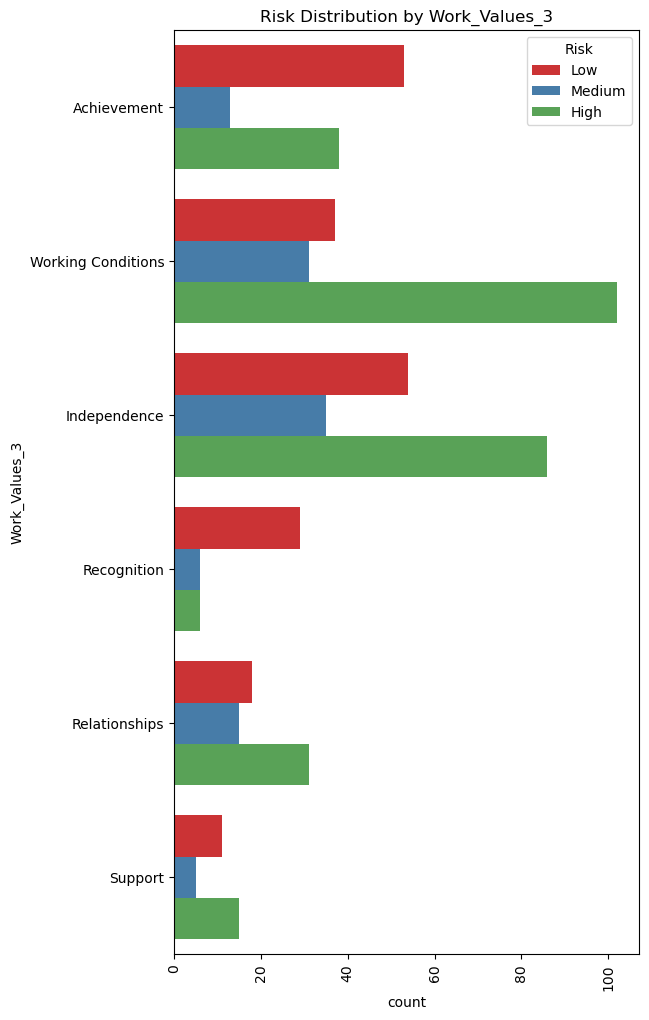

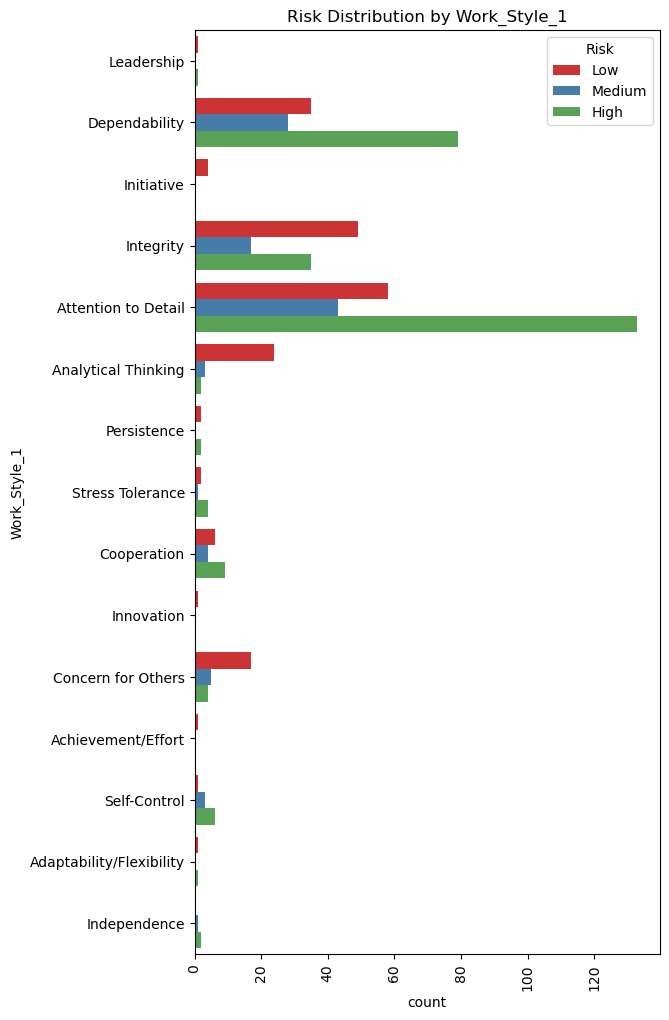

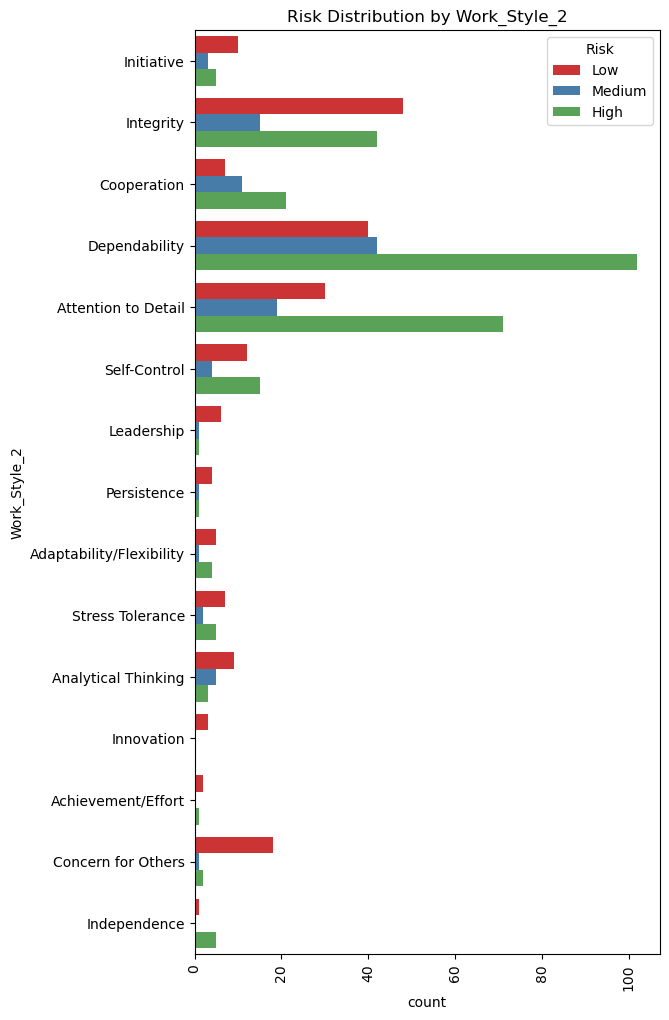

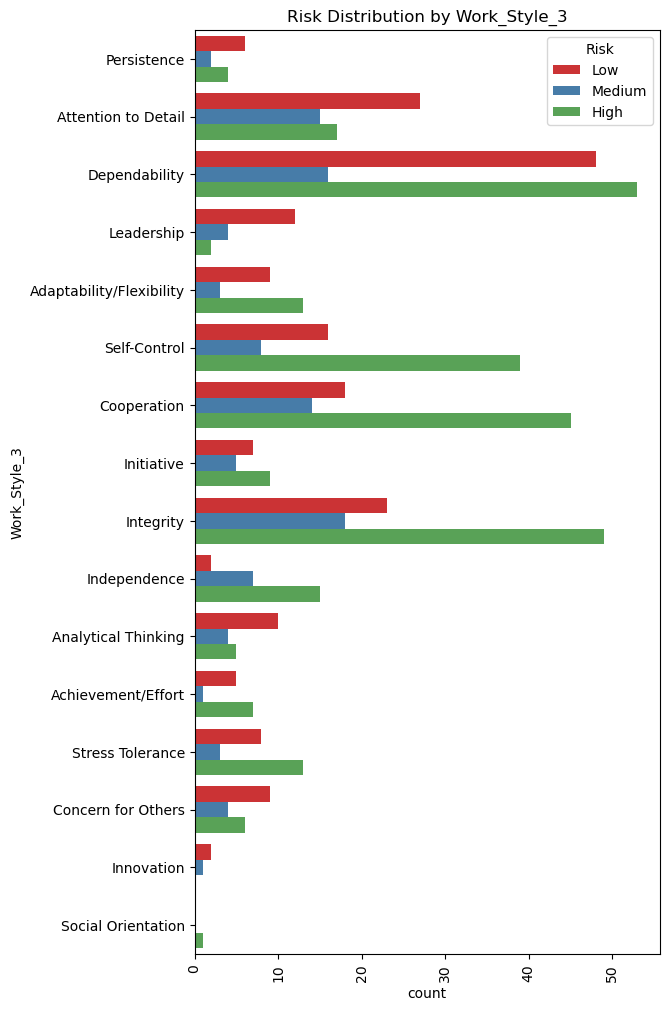

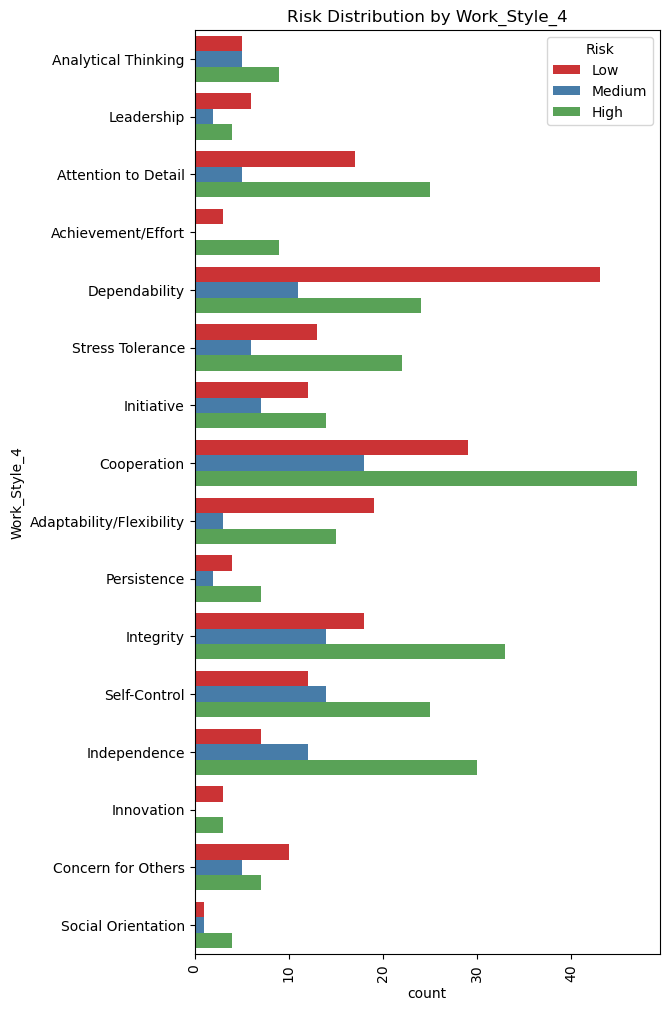

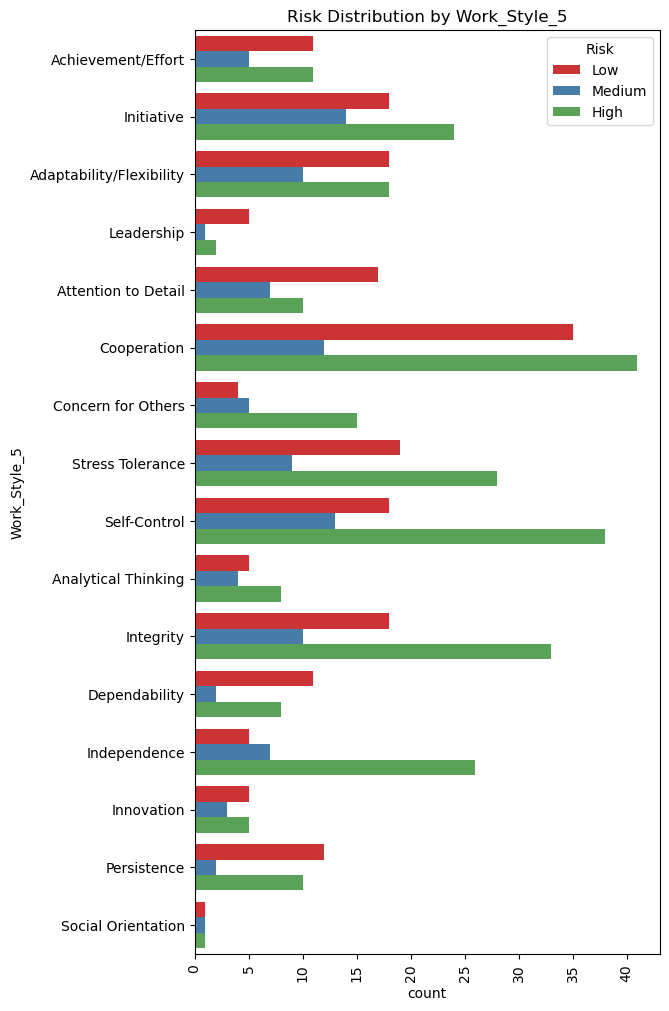

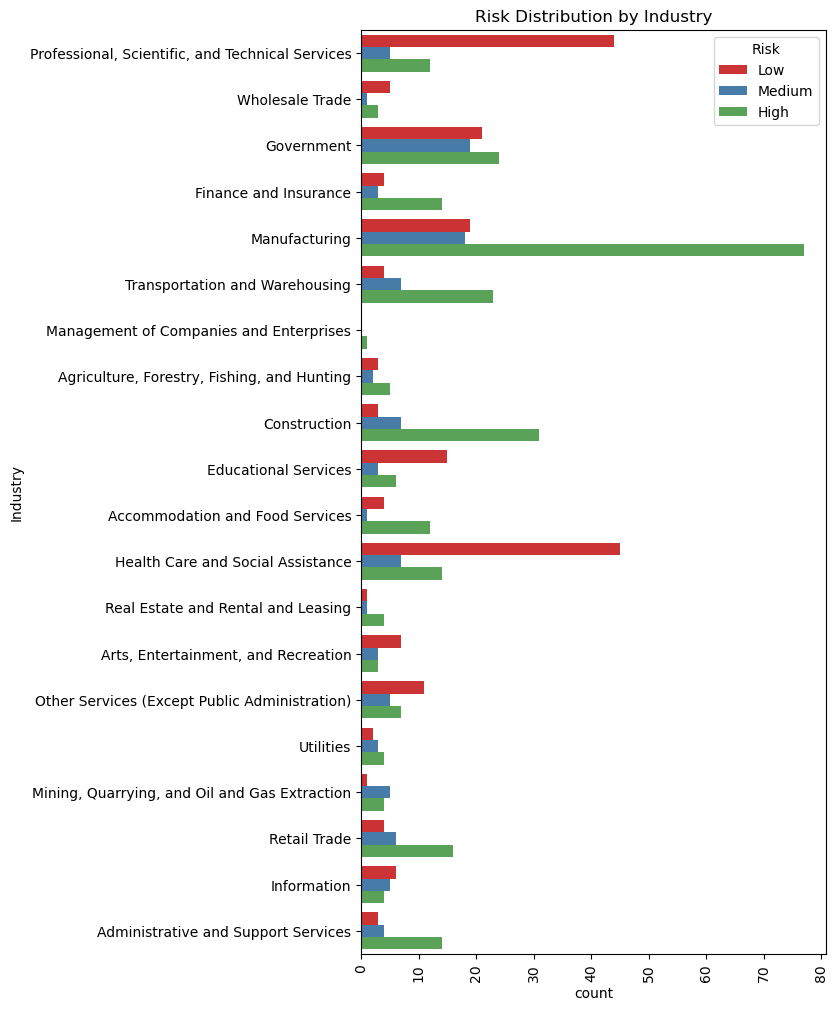

In [622]:
# List of categorical columns to create stacked bar plots for
categorical_columns = [
    'Tech_Skill_1', 'Tech_Skill_2', 'Tech_Skill_3', 'Tech_Skill_4', 'Tech_Skill_5',
    'Activity_1', 'Activity_2', 'Activity_3', 'Activity_4', 'Activity_5',
    'Work_Context_1', 'Work_Context_2', 'Work_Context_3', 'Work_Context_4', 'Work_Context_5',
    'Skill_1', 'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5',
    'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5',
    'Education', 'Ability_1', 'Ability_2', 'Ability_3', 'Ability_4', 'Ability_5',
    'Interest_1', 'Interest_2', 'Interest_3',
    'Work_Values_1', 'Work_Values_2', 'Work_Values_3',
    'Work_Style_1', 'Work_Style_2', 'Work_Style_3', 'Work_Style_4', 'Work_Style_5',
    'Industry'
]

# Create stacked bar plots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(6, 12))
    sns.countplot(data=cleaned_df, y=column, hue='Risk', palette='Set1')
    plt.xticks(rotation=90)
    plt.title(f'Risk Distribution by {column}')
    plt.show()


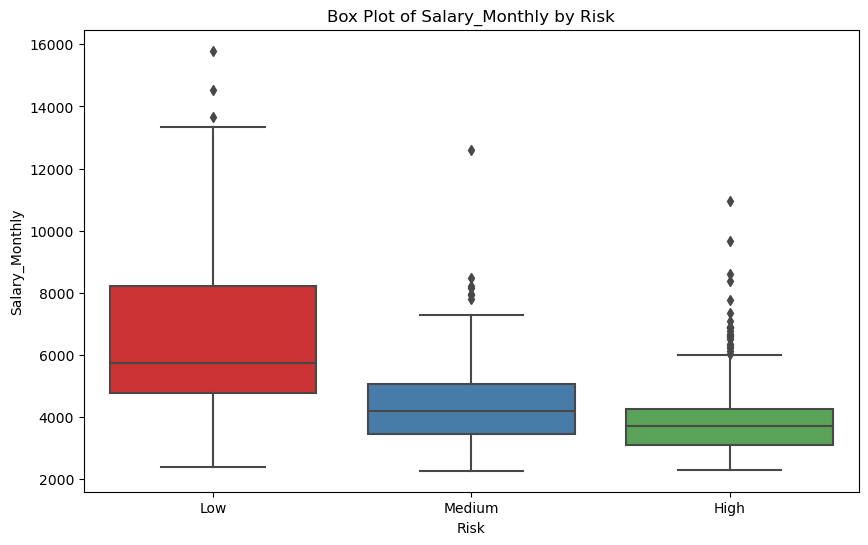

In [623]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x='Risk', y='Salary_Monthly', palette='Set1')
plt.title('Box Plot of Salary_Monthly by Risk')
plt.xlabel('Risk')
plt.ylabel('Salary_Monthly')
plt.show()


In [625]:
# Export the cleaned_df DataFrame to a CSV file
# cleaned_df.to_csv('cleaned_data.csv', index=False)

In [626]:
cleaned_df["Risk"].value_counts()

High      278
Low       202
Medium    105
Name: Risk, dtype: int64

### Data Encoding

In [627]:
##cleaned_df = cleaned_df.drop('Occupation', axis=1)
# List of categorical columns to encode
categorical_columns = [
    'Tech_Skill_1',
    'Tech_Skill_2',
    'Tech_Skill_3',
    'Tech_Skill_4',
    'Tech_Skill_5',
    'Activity_1',
    'Activity_2',
    'Activity_3',
    'Activity_4',
    'Activity_5',
    'Work_Context_1',
    'Work_Context_2',
    'Work_Context_3',
    'Work_Context_4',
    'Work_Context_5',
    'Skill_1',
    'Skill_2',
    'Skill_3',
    'Skill_4',
    'Skill_5',
    'Knowledge_1',
    'Knowledge_2',
    'Knowledge_3',
    'Knowledge_4',
    'Knowledge_5',
    'Education',
    'Ability_1',
    'Ability_2',
    'Ability_3',
    'Ability_4',
    'Ability_5',
    'Interest_1',
    'Interest_2',
    'Interest_3',
    'Work_Values_1',
    'Work_Values_2',
    'Work_Values_3',
    'Work_Style_1',
    'Work_Style_2',
    'Work_Style_3',
    'Work_Style_4',
    'Work_Style_5',
    'Industry',
    'Risk',
]

# Initialize a dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply LabelEncoder to each categorical column and store the encoder in the dictionary
for column in categorical_columns:
    label_encoder = LabelEncoder()
    cleaned_df[column + '_encoded'] = label_encoder.fit_transform(cleaned_df[column])
    label_encoders[column] = label_encoder

# Get the mapping of labels to integers for all of the columns
column_mappings = {}
for column, encoder in label_encoders.items():
    column_mappings[column] = encoder.classes_

# Create a dictionary to store the reverse mappings for all of the columns
reverse_mappings = {}

## Iterate over the categorical columns and create a reverse mapping for each column
for column in categorical_columns:
    column_reverse_mapping = {}
    for i in range(len(label_encoders[column].classes_)):
        column_reverse_mapping[label_encoders[column].classes_[i]] = i

    # Add the reverse mapping to the dictionary
    reverse_mappings[column] = column_reverse_mapping

# Update the `column_mappings` dictionary to include the reverse mappings
column_mappings.update(reverse_mappings)

# Iterate over the categorical columns and create a global variable for each column's reverse mapping
for column in categorical_columns:
    column_name = column + '_mapping'
    globals()[column_name] = reverse_mappings[column]

cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 701
Data columns (total 91 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Occupation              585 non-null    object  
 1   Tech_Skill_1            585 non-null    object  
 2   Tech_Skill_2            585 non-null    object  
 3   Tech_Skill_3            585 non-null    object  
 4   Tech_Skill_4            585 non-null    object  
 5   Tech_Skill_5            585 non-null    object  
 6   Activity_1              585 non-null    object  
 7   Activity_2              585 non-null    object  
 8   Activity_3              585 non-null    object  
 9   Activity_4              585 non-null    object  
 10  Activity_5              585 non-null    object  
 11  Work_Context_1          585 non-null    object  
 12  Work_Context_2          585 non-null    object  
 13  Work_Context_3          585 non-null    object  
 14  Work_Context_4          58

In [628]:
Risk_mapping

{'High': 0, 'Low': 1, 'Medium': 2}

In [629]:
categorical_columns = [
    'Probability',
    'Occupation',
    'Tech_Skill_1',
    'Tech_Skill_2',
    'Tech_Skill_3',
    'Tech_Skill_4',
    'Tech_Skill_5',
    'Activity_1',
    'Activity_2',
    'Activity_3',
    'Activity_4',
    'Activity_5',
    'Work_Context_1',
    'Work_Context_2',
    'Work_Context_3',
    'Work_Context_4',
    'Work_Context_5',
    'Skill_1',
    'Skill_2',
    'Skill_3',
    'Skill_4',
    'Skill_5',
    'Knowledge_1',
    'Knowledge_2',
    'Knowledge_3',
    'Knowledge_4',
    'Knowledge_5',
    'Education',
    'Ability_1',
    'Ability_2',
    'Ability_3',
    'Ability_4',
    'Ability_5',
    'Interest_1',
    'Interest_2',
    'Interest_3',
    'Work_Values_1',
    'Work_Values_2',
    'Work_Values_3',
    'Work_Style_1',
    'Work_Style_2',
    'Work_Style_3',
    'Work_Style_4',
    'Work_Style_5',
    'Industry',
    'Risk',
]

cleaned_df.drop(categorical_columns, axis=1, inplace=True)

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 701
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Salary_Monthly          585 non-null    float64
 1   Tech_Skill_1_encoded    585 non-null    int32  
 2   Tech_Skill_2_encoded    585 non-null    int32  
 3   Tech_Skill_3_encoded    585 non-null    int32  
 4   Tech_Skill_4_encoded    585 non-null    int32  
 5   Tech_Skill_5_encoded    585 non-null    int32  
 6   Activity_1_encoded      585 non-null    int32  
 7   Activity_2_encoded      585 non-null    int32  
 8   Activity_3_encoded      585 non-null    int32  
 9   Activity_4_encoded      585 non-null    int32  
 10  Activity_5_encoded      585 non-null    int32  
 11  Work_Context_1_encoded  585 non-null    int32  
 12  Work_Context_2_encoded  585 non-null    int32  
 13  Work_Context_3_encoded  585 non-null    int32  
 14  Work_Context_4_encoded  585 non-null    in

In [630]:
cleaned_df["Risk_encoded"].value_counts()

0    278
1    202
2    105
Name: Risk_encoded, dtype: int64

## Data Splitting 

In [631]:

# Specify the features (X) and the target variable (y)
X = cleaned_df.drop(columns=['Risk_encoded'])  # Exclude the target variable
y = cleaned_df['Risk_encoded']  # The target variable

# Split the data into a training set (80%) and a testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (468, 44)
X_test shape: (117, 44)
y_train shape: (468,)
y_test shape: (117,)


In [632]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 93 to 131
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Salary_Monthly          468 non-null    float64
 1   Tech_Skill_1_encoded    468 non-null    int32  
 2   Tech_Skill_2_encoded    468 non-null    int32  
 3   Tech_Skill_3_encoded    468 non-null    int32  
 4   Tech_Skill_4_encoded    468 non-null    int32  
 5   Tech_Skill_5_encoded    468 non-null    int32  
 6   Activity_1_encoded      468 non-null    int32  
 7   Activity_2_encoded      468 non-null    int32  
 8   Activity_3_encoded      468 non-null    int32  
 9   Activity_4_encoded      468 non-null    int32  
 10  Activity_5_encoded      468 non-null    int32  
 11  Work_Context_1_encoded  468 non-null    int32  
 12  Work_Context_2_encoded  468 non-null    int32  
 13  Work_Context_3_encoded  468 non-null    int32  
 14  Work_Context_4_encoded  468 non-null    i

In [633]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 475 to 447
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Salary_Monthly          117 non-null    float64
 1   Tech_Skill_1_encoded    117 non-null    int32  
 2   Tech_Skill_2_encoded    117 non-null    int32  
 3   Tech_Skill_3_encoded    117 non-null    int32  
 4   Tech_Skill_4_encoded    117 non-null    int32  
 5   Tech_Skill_5_encoded    117 non-null    int32  
 6   Activity_1_encoded      117 non-null    int32  
 7   Activity_2_encoded      117 non-null    int32  
 8   Activity_3_encoded      117 non-null    int32  
 9   Activity_4_encoded      117 non-null    int32  
 10  Activity_5_encoded      117 non-null    int32  
 11  Work_Context_1_encoded  117 non-null    int32  
 12  Work_Context_2_encoded  117 non-null    int32  
 13  Work_Context_3_encoded  117 non-null    int32  
 14  Work_Context_4_encoded  117 non-null    

In [634]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 468 entries, 93 to 131
Series name: Risk_encoded
Non-Null Count  Dtype
--------------  -----
468 non-null    int32
dtypes: int32(1)
memory usage: 5.5 KB


In [635]:
y_train.value_counts()

0    226
1    157
2     85
Name: Risk_encoded, dtype: int64

In [636]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 117 entries, 475 to 447
Series name: Risk_encoded
Non-Null Count  Dtype
--------------  -----
117 non-null    int32
dtypes: int32(1)
memory usage: 1.4 KB


In [637]:
Risk_mapping

{'High': 0, 'Low': 1, 'Medium': 2}

## Data Sampling

In [638]:
# Instantiate the SMOTE technique
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Class distribution after SMOTE:
1    226
0    226
2    226
Name: Risk_encoded, dtype: int64


In [639]:
X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Salary_Monthly          678 non-null    float64
 1   Tech_Skill_1_encoded    678 non-null    int32  
 2   Tech_Skill_2_encoded    678 non-null    int32  
 3   Tech_Skill_3_encoded    678 non-null    int32  
 4   Tech_Skill_4_encoded    678 non-null    int32  
 5   Tech_Skill_5_encoded    678 non-null    int32  
 6   Activity_1_encoded      678 non-null    int32  
 7   Activity_2_encoded      678 non-null    int32  
 8   Activity_3_encoded      678 non-null    int32  
 9   Activity_4_encoded      678 non-null    int32  
 10  Activity_5_encoded      678 non-null    int32  
 11  Work_Context_1_encoded  678 non-null    int32  
 12  Work_Context_2_encoded  678 non-null    int32  
 13  Work_Context_3_encoded  678 non-null    int32  
 14  Work_Context_4_encoded  678 non-null    in

In [640]:
y_train_resampled.value_counts()

1    226
0    226
2    226
Name: Risk_encoded, dtype: int64

# Model Training

## Support Vector Machine

Model Evaluation:
Accuracy: 0.6153846153846154

Confusion Matrix:
[[33  4 15]
 [ 5 33  7]
 [ 8  6  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        52
           1       0.77      0.73      0.75        45
           2       0.21      0.30      0.25        20

    accuracy                           0.62       117
   macro avg       0.57      0.56      0.56       117
weighted avg       0.65      0.62      0.63       117



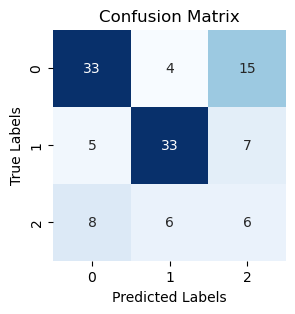

In [227]:

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




In [57]:
# Create a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3):  # range(3) because of the target variable (low,medium,high)
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

AUC-ROC Scores for Each Class:
Class 0: 0.7173076923076923
Class 1: 0.7972222222222223
Class 2: 0.5365979381443299


### Checking Best SVC Parameters

In [69]:
# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search with the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new classifier with the best hyperparameters
best_svc_model = SVC(random_state=42, **best_params)

# Train the best classifier on the resampled training data
best_svc_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = best_svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Best Hyperparameters: {'C': 0.01, 'kernel': 'linear'}
Accuracy: 0.5726495726495726
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.58      0.61        52
           1       0.78      0.69      0.73        45
           2       0.19      0.30      0.24        20

    accuracy                           0.57       117
   macro avg       0.54      0.52      0.53       117
weighted avg       0.62      0.57      0.59       117



### Applying best SVC parameters

Model Evaluation:
Accuracy: 0.5726495726495726

Confusion Matrix:
[[30  6 16]
 [ 5 31  9]
 [11  3  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.58      0.61        52
           1       0.78      0.69      0.73        45
           2       0.19      0.30      0.24        20

    accuracy                           0.57       117
   macro avg       0.54      0.52      0.53       117
weighted avg       0.62      0.57      0.59       117



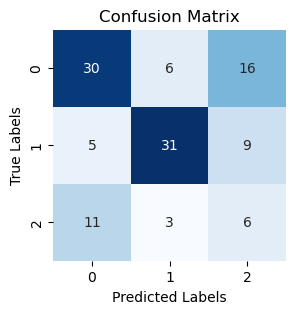

In [228]:

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42, C = 0.01)
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()




In [280]:
# Initialize a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3):  
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

AUC-ROC Scores for Each Class:
Class 0: 0.6653846153846154
Class 1: 0.7819444444444444
Class 2: 0.5211340206185567


## Logistic Regression

In [66]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)




Model Evaluation:
Accuracy: 0.6068376068376068

Confusion Matrix:
[[33  6 13]
 [ 4 33  8]
 [ 9  6  5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67        52
           1       0.73      0.73      0.73        45
           2       0.19      0.25      0.22        20

    accuracy                           0.61       117
   macro avg       0.55      0.54      0.54       117
weighted avg       0.63      0.61      0.62       117



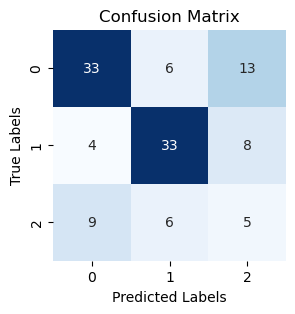

AUC-ROC Scores for Each Class:
Class 0: 0.7173076923076923
Class 1: 0.7833333333333334
Class 2: 0.5167525773195876
Macro Average AUC-ROC Score: 0.6724645343202044


In [67]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Initialize a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3):  
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

# Calculate the "macro" average AUC-ROC score
macro_avg_auc_roc = np.mean(class_auc_roc_scores)

print("Macro Average AUC-ROC Score:", macro_avg_auc_roc)

### Checking best logistic regression parameter

In [68]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga'], 
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new classifier with the best hyperparameters
best_logistic_model = LogisticRegression(random_state=42, **best_params)

# Train the classifier on the resampled training data
best_logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = best_logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.6324786324786325
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.69        52
           1       0.75      0.73      0.74        45
           2       0.26      0.30      0.28        20

    accuracy                           0.63       117
   macro avg       0.57      0.57      0.57       117
weighted avg       0.64      0.63      0.64       117



### Applying the best parameter

In [282]:

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, C = 10, penalty = 'l1', solver = 'liblinear')
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)




Model Evaluation:
Accuracy: 0.6324786324786325

Confusion Matrix:
[[35  7 10]
 [ 5 33  7]
 [10  4  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69        52
           1       0.75      0.73      0.74        45
           2       0.26      0.30      0.28        20

    accuracy                           0.63       117
   macro avg       0.57      0.57      0.57       117
weighted avg       0.64      0.63      0.64       117



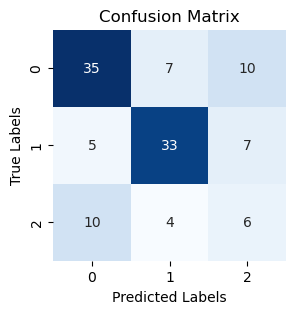

AUC-ROC Scores for Each Class:
Class 0: 0.7211538461538461
Class 1: 0.7902777777777777
Class 2: 0.5623711340206186
Macro Average AUC-ROC Score: 0.6912675859840808


In [283]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Initialize a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3):  
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

# Calculate the "macro" average AUC-ROC score
macro_avg_auc_roc = np.mean(class_auc_roc_scores)

print("Macro Average AUC-ROC Score:", macro_avg_auc_roc)

## Naive Bayes

In [63]:
# Create a Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Train the classifier 
mnb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data 
y_pred = mnb_classifier.predict(X_test)



Model Evaluation:
Accuracy: 0.5897435897435898

Confusion Matrix:
[[31  7 14]
 [ 5 30 10]
 [10  2  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        52
           1       0.77      0.67      0.71        45
           2       0.25      0.40      0.31        20

    accuracy                           0.59       117
   macro avg       0.56      0.55      0.55       117
weighted avg       0.64      0.59      0.61       117



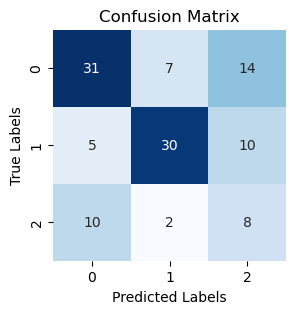

AUC-ROC Scores for Each Class:
Class 0: 0.6826923076923077
Class 1: 0.7708333333333333
Class 2: 0.5762886597938144
Macro Average AUC-ROC Score: 0.6766047669398185


In [64]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Initialize a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3):  
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

# Calculate the "macro" average AUC-ROC score
macro_avg_auc_roc = np.mean(class_auc_roc_scores)

print("Macro Average AUC-ROC Score:", macro_avg_auc_roc)

### Checking best Naive Bayes parameter

In [65]:
# Define hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0], 
    'fit_prior': [True, False]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search with the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new MNB classifier with the best hyperparameters
best_mnb_classifier = MultinomialNB(**best_params)

# Train the classifier on the resampled training data
best_mnb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = best_mnb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Accuracy: 0.5811965811965812
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.60      0.63        52
           1       0.77      0.67      0.71        45
           2       0.23      0.35      0.27        20

    accuracy                           0.58       117
   macro avg       0.55      0.54      0.54       117
weighted avg       0.63      0.58      0.60       117



### Applying the parameters

In [284]:
# Create Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB(alpha = 0.1, fit_prior = True)

# Train the classifier on the training data
mnb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data 
y_pred = mnb_classifier.predict(X_test)



Model Evaluation:
Accuracy: 0.5811965811965812

Confusion Matrix:
[[31  7 14]
 [ 5 30 10]
 [11  2  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63        52
           1       0.77      0.67      0.71        45
           2       0.23      0.35      0.27        20

    accuracy                           0.58       117
   macro avg       0.55      0.54      0.54       117
weighted avg       0.63      0.58      0.60       117



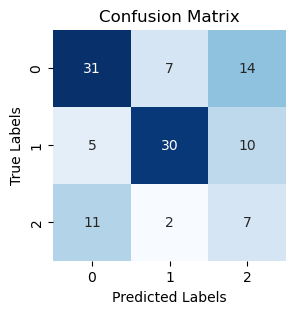

AUC-ROC Scores for Each Class:
Class 0: 0.675
Class 1: 0.7708333333333333
Class 2: 0.5512886597938145
Macro Average AUC-ROC Score: 0.6657073310423826


In [285]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Initialize a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3):  
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

# Calculate the "macro" average AUC-ROC score
macro_avg_auc_roc = np.mean(class_auc_roc_scores)

print("Macro Average AUC-ROC Score:", macro_avg_auc_roc)

## Random Forest Classifier

Model Evaluation:
Accuracy: 0.6923076923076923

Confusion Matrix:
[[42  7  3]
 [ 8 36  1]
 [10  7  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75        52
           1       0.72      0.80      0.76        45
           2       0.43      0.15      0.22        20

    accuracy                           0.69       117
   macro avg       0.62      0.59      0.58       117
weighted avg       0.66      0.69      0.66       117



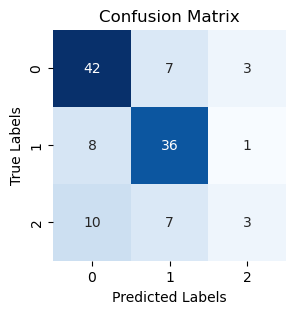

AUC-ROC Scores for Each Class:
Class 0: 0.7653846153846154
Class 1: 0.8027777777777778
Class 2: 0.554381443298969
Macro Average AUC-ROC Score: 0.7075146121537874


In [62]:
# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Initialize a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3):  
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

# Calculate the average AUC-ROC score
macro_avg_auc_roc = np.mean(class_auc_roc_scores)

print("Macro Average AUC-ROC Score:", macro_avg_auc_roc)

### Checking Best Parameters

In [364]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, None],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV with the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Model Evaluation:")
print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'max_depth': None, 'n_estimators': 300}
Model Evaluation:
Accuracy: 0.7008547008547008

Confusion Matrix:
[[43  7  2]
 [ 7 37  1]
 [11  7  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        52
           1       0.73      0.82      0.77        45
           2       0.40      0.10      0.16        20

    accuracy                           0.70       117
   macro avg       0.61      0.58      0.56       117
weighted avg       0.66      0.70      0.66       117



### Applying the parameters

Model Evaluation:
Accuracy: 70.09

Confusion Matrix:
[[43  7  2]
 [ 7 37  1]
 [11  7  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        52
           1       0.73      0.82      0.77        45
           2       0.40      0.10      0.16        20

    accuracy                           0.70       117
   macro avg       0.61      0.58      0.56       117
weighted avg       0.66      0.70      0.66       117



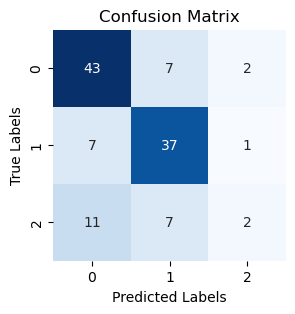

In [72]:
# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=None)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy * 100, 2)  # Making percentage
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy_percentage}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [73]:
# Initialize a list to store AUC-ROC scores for each class
class_auc_roc_scores = []

# Calculate AUC-ROC score for each class
for class_label in range(3): 
    y_true_class = (y_test == class_label).astype(int)
    y_pred_class = (y_pred == class_label).astype(int)
    auc_roc = roc_auc_score(y_true_class, y_pred_class)
    class_auc_roc_scores.append(auc_roc)

print("AUC-ROC Scores for Each Class:")
for i, auc_roc in enumerate(class_auc_roc_scores):
    print(f"Class {i}: {auc_roc}")

# Calculate the "macro" average AUC-ROC score
macro_avg_auc_roc = np.mean(class_auc_roc_scores)

print("Macro Average AUC-ROC Score:", macro_avg_auc_roc)

AUC-ROC Scores for Each Class:
Class 0: 0.7749999999999999
Class 1: 0.8138888888888889
Class 2: 0.5345360824742268
Macro Average AUC-ROC Score: 0.7078083237877052


### Feature Importance

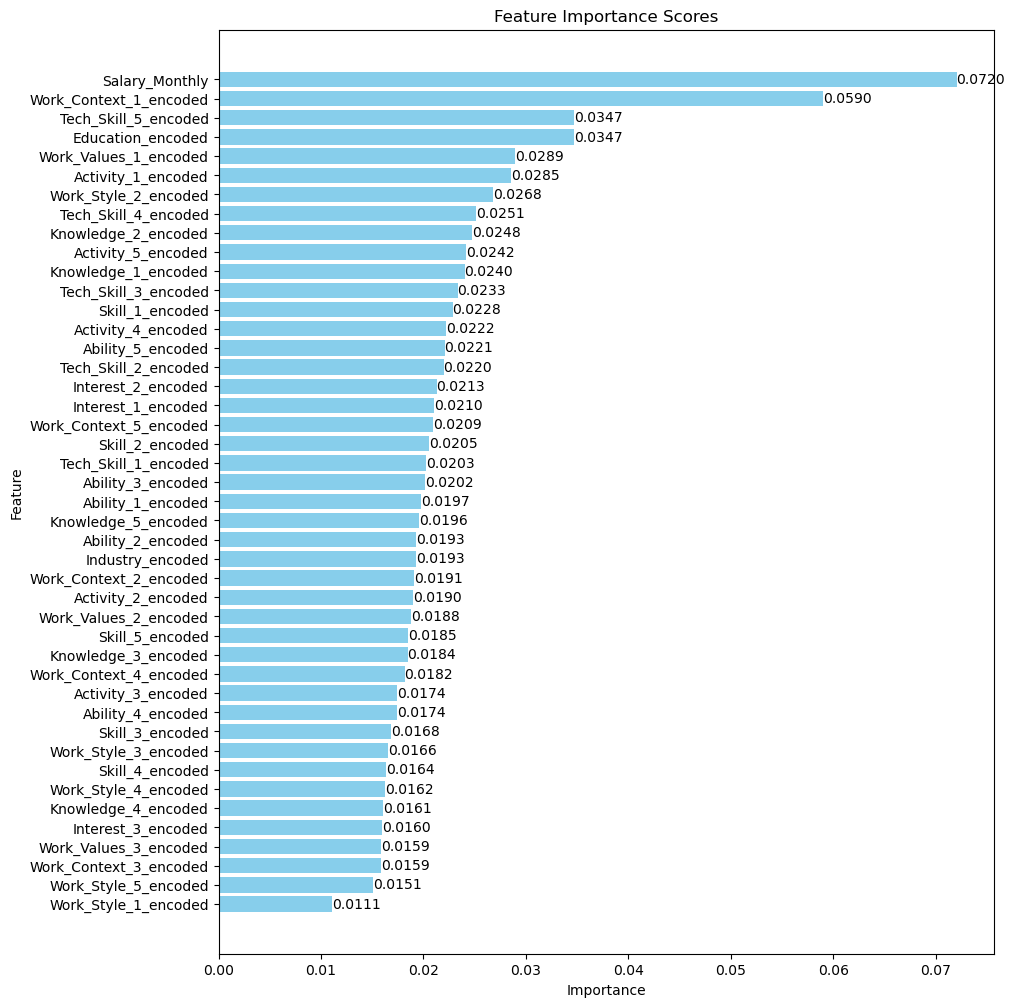

In [213]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Match feature importances to feature names
feature_names = X_train_resampled.columns  

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 12))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # To display in Descending order

# Add labels for readability
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.4f}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()

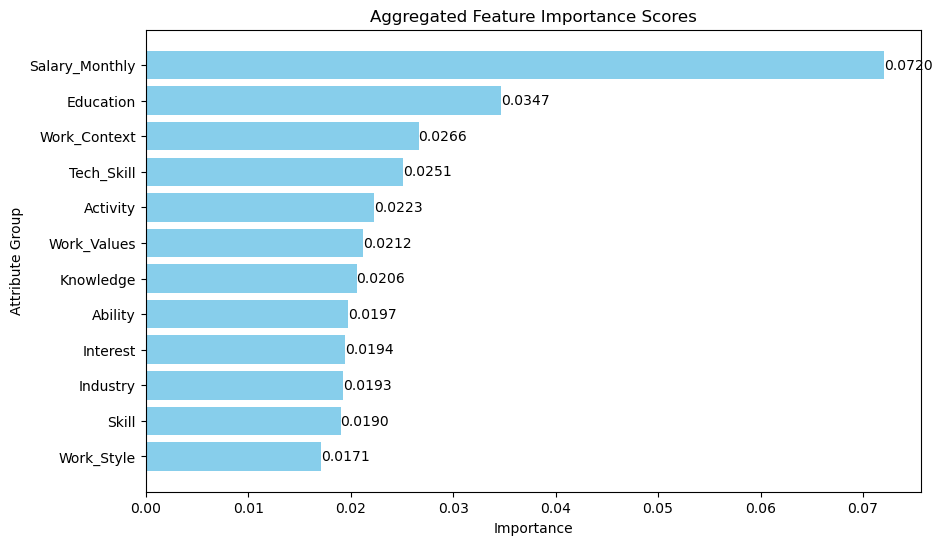

In [226]:

# Define attribute groups for aggregation
attribute_groups = {
    'Tech_Skill': ['Tech_Skill_1_encoded', 'Tech_Skill_2_encoded', 'Tech_Skill_3_encoded', 'Tech_Skill_4_encoded', 'Tech_Skill_5_encoded'],
    'Activity': ['Activity_1_encoded', 'Activity_2_encoded', 'Activity_3_encoded', 'Activity_4_encoded', 'Activity_5_encoded'],
    'Work_Context': ['Work_Context_1_encoded', 'Work_Context_2_encoded', 'Work_Context_3_encoded', 'Work_Context_4_encoded', 'Work_Context_5_encoded'],
    'Skill': ['Skill_1_encoded', 'Skill_2_encoded', 'Skill_3_encoded', 'Skill_4_encoded', 'Skill_5_encoded'],
    'Knowledge': ['Knowledge_1_encoded', 'Knowledge_2_encoded', 'Knowledge_3_encoded', 'Knowledge_4_encoded', 'Knowledge_5_encoded'],
    'Ability': ['Ability_1_encoded', 'Ability_2_encoded', 'Ability_3_encoded', 'Ability_4_encoded', 'Ability_5_encoded'],
    'Interest': ['Interest_1_encoded', 'Interest_2_encoded', 'Interest_3_encoded'],
    'Work_Values': ['Work_Values_1_encoded', 'Work_Values_2_encoded', 'Work_Values_3_encoded'],
    'Work_Style': ['Work_Style_1_encoded', 'Work_Style_2_encoded', 'Work_Style_3_encoded', 'Work_Style_4_encoded', 'Work_Style_5_encoded'],
    'Industry': ['Industry_encoded'],
    'Salary_Monthly': ['Salary_Monthly'],  
    'Education': ['Education_encoded'],  
}


# Initialize a dictionary to store aggregated attribute importances
aggregated_importances = {}

# Aggregate importance scores for each attribute group
for group, attributes in attribute_groups.items():
    group_importance = feature_importance_df[feature_importance_df['Feature'].isin(attributes)]['Importance'].mean()
    aggregated_importances[group] = group_importance

# Sort the aggregated importances by importance score in descending order
sorted_aggregated_importances = dict(sorted(aggregated_importances.items(), key=lambda x: x[1], reverse=True))


# Create a bar plot 
plt.figure(figsize=(10, 6))
groups = list(sorted_aggregated_importances.keys())  
importances = list(sorted_aggregated_importances.values())
bars = plt.barh(groups, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Attribute Group')
plt.title('Aggregated Feature Importance Scores')
plt.gca().invert_yaxis()  # To display in descending order

# Add labels for readability
for bar, importance in zip(bars, importances):
    width = bar.get_width()
    plt.annotate(f'{importance:.4f}', xy=(width, bar.get_y() + bar.get_height() / 2), va='center')

plt.show()


# Testing the prediction

In [393]:
placeholder_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 701
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Occupation      585 non-null    object  
 1   Tech_Skill_1    585 non-null    object  
 2   Tech_Skill_2    585 non-null    object  
 3   Tech_Skill_3    585 non-null    object  
 4   Tech_Skill_4    585 non-null    object  
 5   Tech_Skill_5    585 non-null    object  
 6   Activity_1      585 non-null    object  
 7   Activity_2      585 non-null    object  
 8   Activity_3      585 non-null    object  
 9   Activity_4      585 non-null    object  
 10  Activity_5      585 non-null    object  
 11  Work_Context_1  585 non-null    object  
 12  Work_Context_2  585 non-null    object  
 13  Work_Context_3  585 non-null    object  
 14  Work_Context_4  585 non-null    object  
 15  Work_Context_5  585 non-null    object  
 16  Skill_1         585 non-null    object  
 17  Skill_2         

In [403]:
placeholder_df.drop(['SOC','Task_1', 'Task_2', 'Task_3', 'Task_4', 'Task_5',
                              'Activity_Detailed_1', 'Activity_Detailed_2', 'Activity_Detailed_3', 
                              'Activity_Detailed_4', 'Activity_Detailed_5'], axis=1)
placeholder_df.head(10)

Occupation  \
0                            Chief Executives   
1             General and Operations Managers   
2         Advertising and Promotions Managers   
3                          Marketing Managers   
4                              Sales Managers   
6            Administrative Services Managers   
7   Computer and Information Systems Managers   
8                          Financial Managers   
9              Industrial Production Managers   
10                        Purchasing Managers   

                                        Tech_Skill_1  \
0                                Accounting software   
1                                    Access software   
2                  Analytical or scientific software   
3                                    Access software   
4                                Accounting software   
6                                Accounting software   
7                                    Access software   
8                                Accounting software   
9                                Accounting software   
10  Business intelligence and data analysis software   

                                        Tech_Skill_2  \
0                  Analytical or scientific software   
1                                Accounting software   
2   Business intelligence and data analysis software   
3                                Accounting software   
4                  Analytical or scientific software   
6                  Analytical or scientific software   
7                                Accounting software   
8                  Analytical or scientific software   
9                  Analytical or scientific software   
10                  Calendar and scheduling software   

                                        Tech_Skill_3  \
0       Cloud-based data access and sharing software   
1                  Analytical or scientific software   
2                   Calendar and scheduling software   
3                  Analytical or scientific software   
4   Business intelligence and data analysis software   
6       Cloud-based data access and sharing software   
7                  Analytical or scientific software   
8   Business intelligence and data analysis software   
9   Business intelligence and data analysis software   
10      Cloud-based data access and sharing software   

                                    Tech_Skill_4  \
0                      Content workflow software   
1                    Backup or archival software   
2   Cloud-based data access and sharing software   
3                    Application server software   
4               Calendar and scheduling software   
6             Computer aided design CAD software   
7                    Application server software   
8   Cloud-based data access and sharing software   
9               Calendar and scheduling software   
10                  Data base reporting software   

                                        Tech_Skill_5  \
0      Customer relationship management CRM software   
1   Business intelligence and data analysis software   
2      Customer relationship management CRM software   
3   Business intelligence and data analysis software   
4       Cloud-based data access and sharing software   
6                          Content workflow software   
7                        Backup or archival software   
8                                Compliance software   
9                 Computer aided design CAD software   
10       Data base user interface and query software   

                                           Activity_1  \
0               Making Decisions and Solving Problems   
1                              Working with Computers   
2                              Working with Computers   
3   Communicating with Supervisors, Peers, or Subo...   
4                       Selling or Influencing Others   
6                                 Getting Information   
7                              Working with Computers  

In [404]:
specific_occupation = 'Waiters and Waitresses'

filtered_df = placeholder_df[placeholder_df['Occupation'] == specific_occupation]

print(filtered_df.head(1))

                 Occupation                Tech_Skill_1  \
319  Waiters and Waitresses  Instant messaging software   

                   Tech_Skill_2                            Tech_Skill_3  \
319  Point of sale POS software  Web page creation and editing software   

                                    Tech_Skill_4 Tech_Skill_5  \
319  Data base user interface and query software         None   

              Activity_1                                         Activity_2  \
319  Getting Information  Performing for or Working Directly with the Pu...   

                                            Activity_3  \
319  Communicating with Supervisors, Peers, or Subo...   

                                            Activity_4  ... Work_Values_3  \
319  Establishing and Maintaining Interpersonal Rel...  ...   Achievement   

      Work_Style_1         Work_Style_2  Work_Style_3 Work_Style_4  \
319  Dependability  Attention to Detail  Self-Control  Cooperation   

         Work_Style_5      

In [406]:
row_index = 319  
selected_row = placeholder_df.loc[row_index]
selected_row


Occupation                                   Waiters and Waitresses
Tech_Skill_1                             Instant messaging software
Tech_Skill_2                             Point of sale POS software
Tech_Skill_3                 Web page creation and editing software
Tech_Skill_4            Data base user interface and query software
Tech_Skill_5                                                   None
Activity_1                                      Getting Information
Activity_2        Performing for or Working Directly with the Pu...
Activity_3        Communicating with Supervisors, Peers, or Subo...
Activity_4        Establishing and Maintaining Interpersonal Rel...
Activity_5          Resolving Conflicts and Negotiating with Others
Work_Context_1                                  Contact With Others
Work_Context_2                       Spend Time Walking and Running
Work_Context_3                                  Spend Time Standing
Work_Context_4                  Indoors, Environ

In [200]:

# Waiters and Waitresses = Correct (High)
# General and Operations Managers = Correct (Low)
# Computer Programmers = Correct (Medium)


Salary_Annual = 97800
Salary_Month = Salary_Annual/2

Tech_Skill_1 = 'Access software'
Tech_Skill_2 = 'Accounting software'
Tech_Skill_3 = 'Analytical or scientific software'
Tech_Skill_4 = 'Application server software'
Tech_Skill_5 = 'Backup or archival software'

Activity_1 = 'Working with Computers'
Activity_2 = 'Processing Information'
Activity_3 = 'Analyzing Data or Information'
Activity_4 = 'Getting Information'
Activity_5 = 'Making Decisions and Solving Problems'

Work_Context_1 = 'Electronic Mail'
Work_Context_2 = 'Spend Time Sitting'
Work_Context_3 = 'Face-to-Face Discussions'
Work_Context_4 = 'Indoors, Environmentally Controlled'
Work_Context_5 = 'Importance of Being Exact or Accurate'

Skill_1 = 'Programming'
Skill_2 = 'Active Listening'
Skill_3 = 'Complex Problem Solving'
Skill_4 = 'Critical Thinking'
Skill_5 = 'Quality Control Analysis'

Knowledge_1 = 'Computers and Electronics'
Knowledge_2 = 'Mathematics'
Knowledge_3 = 'Engineering and Technology'
Knowledge_4 = 'English Language'
Knowledge_5 = 'Customer and Personal Service'

Education = 'Bachelor’s degree'

Ability_1 = 'Written Comprehension'
Ability_2 = 'Near Vision'
Ability_3 = 'Oral Comprehension'
Ability_4 = 'Deductive Reasoning'
Ability_5 = 'Inductive Reasoning'

Interest_1 = 'Investigative'
Interest_2 = 'Conventional'
Interest_3 = 'None'

Work_Values_1 = 'Achievement'
Work_Values_2 = 'Working Conditions'
Work_Values_3 = 'Independence'

Work_Style_1 = 'Attention to Detail'
Work_Style_2 = 'Analytical Thinking'
Work_Style_3 = 'Integrity'
Work_Style_4 = 'Cooperation'
Work_Style_5 = 'Independence'

Industry = 'Professional, Scientific, and Technical Services'

In [201]:

input_data = pd.DataFrame({
    'Salary_Monthly': [Salary_Month],  
    'Tech_Skill_1_encoded': [Tech_Skill_1_mapping[Tech_Skill_1]],  
    'Tech_Skill_2_encoded': [Tech_Skill_2_mapping[Tech_Skill_2]],
    'Tech_Skill_3_encoded': [Tech_Skill_3_mapping[Tech_Skill_3]],
    'Tech_Skill_4_encoded': [Tech_Skill_4_mapping[Tech_Skill_4]],
    'Tech_Skill_5_encoded': [Tech_Skill_5_mapping[Tech_Skill_5]],
    'Activity_1_encoded': [Activity_1_mapping[Activity_1]],
    'Activity_2_encoded': [Activity_2_mapping[Activity_2]],
    'Activity_3_encoded': [Activity_3_mapping[Activity_3]],
    'Activity_4_encoded': [Activity_4_mapping[Activity_4]],
    'Activity_5_encoded': [Activity_5_mapping[Activity_5]],
    'Work_Context_1_encoded': [Work_Context_1_mapping[Work_Context_1]],
    'Work_Context_2_encoded': [Work_Context_2_mapping[Work_Context_2]],
    'Work_Context_3_encoded': [Work_Context_3_mapping[Work_Context_3]],
    'Work_Context_4_encoded': [Work_Context_4_mapping[Work_Context_4]],
    'Work_Context_5_encoded': [Work_Context_5_mapping[Work_Context_5]],
    'Skill_1_encoded': [Skill_1_mapping[Skill_1]],
    'Skill_2_encoded': [Skill_2_mapping[Skill_2]],
    'Skill_3_encoded': [Skill_3_mapping[Skill_3]],
    'Skill_4_encoded': [Skill_4_mapping[Skill_4]],
    'Skill_5_encoded': [Skill_5_mapping[Skill_5]],
    'Knowledge_1_encoded': [Knowledge_1_mapping[Knowledge_1]],
    'Knowledge_2_encoded': [Knowledge_2_mapping[Knowledge_2]],
    'Knowledge_3_encoded': [Knowledge_3_mapping[Knowledge_3]],
    'Knowledge_4_encoded': [Knowledge_4_mapping[Knowledge_4]],
    'Knowledge_5_encoded': [Knowledge_5_mapping[Knowledge_5]],
    'Education_encoded': [Education_mapping[Education]],
    'Ability_1_encoded': [Ability_1_mapping[Ability_1]],
    'Ability_2_encoded': [Ability_2_mapping[Ability_2]],
    'Ability_3_encoded': [Ability_3_mapping[Ability_3]],
    'Ability_4_encoded': [Ability_4_mapping[Ability_4]],
    'Ability_5_encoded': [Ability_5_mapping[Ability_5]],
    'Interest_1_encoded': [Interest_1_mapping[Interest_1]],
    'Interest_2_encoded': [Interest_2_mapping[Interest_2]],
    'Interest_3_encoded': [Interest_3_mapping[Interest_3]],
    'Work_Values_1_encoded': [Work_Values_1_mapping[Work_Values_1]],
    'Work_Values_2_encoded': [Work_Values_2_mapping[Work_Values_2]],
    'Work_Values_3_encoded': [Work_Values_3_mapping[Work_Values_3]],
    'Work_Style_1_encoded': [Work_Style_1_mapping[Work_Style_1]],
    'Work_Style_2_encoded': [Work_Style_2_mapping[Work_Style_2]],
    'Work_Style_3_encoded': [Work_Style_3_mapping[Work_Style_3]],
    'Work_Style_4_encoded': [Work_Style_4_mapping[Work_Style_4]],
    'Work_Style_5_encoded': [Work_Style_5_mapping[Work_Style_5]],
    'Industry_encoded': [Industry_mapping[Industry]],
})


predictions = rf_model.predict(input_data)

text_value = ''
if predictions == 0:
        text_value = "High"
elif predictions == 1:
        text_value = "Low"
elif predictions == 2:
        text_value = "Medium"

# Print the predicted values
print("Predicted Probabilities: ", text_value)


Predicted Probabilities:  Medium


In [830]:
Risk_mapping

{'High': 0, 'Low': 1, 'Medium': 2}

In [647]:
import json


all_categorical_mappings = {}

categorical_columns = [
    'Tech_Skill_1',
    'Tech_Skill_2',
    'Tech_Skill_3',
    'Tech_Skill_4',
    'Tech_Skill_5',
    'Activity_1',
    'Activity_2',
    'Activity_3',
    'Activity_4',
    'Activity_5',
    'Work_Context_1',
    'Work_Context_2',
    'Work_Context_3',
    'Work_Context_4',
    'Work_Context_5',
    'Skill_1',
    'Skill_2',
    'Skill_3',
    'Skill_4',
    'Skill_5',
    'Knowledge_1',
    'Knowledge_2',
    'Knowledge_3',
    'Knowledge_4',
    'Knowledge_5',
    'Education',
    'Ability_1',
    'Ability_2',
    'Ability_3',
    'Ability_4',
    'Ability_5',
    'Interest_1',
    'Interest_2',
    'Interest_3',
    'Work_Values_1',
    'Work_Values_2',
    'Work_Values_3',
    'Work_Style_1',
    'Work_Style_2',
    'Work_Style_3',
    'Work_Style_4',
    'Work_Style_5',
    'Industry',
    'Risk',
]


for column in categorical_columns:
    column_mapping_name = column + '_mapping'
    column_mapping = globals().get(column_mapping_name)  
    if column_mapping:
        all_categorical_mappings[column] = column_mapping

with open('categorical_mappings.json', 'w') as json_file:
    json.dump(all_categorical_mappings, json_file)


## Export the Model for deployment

In [75]:
import joblib
joblib.dump(rf_model, 'Model.pkl')


['Model.pkl']